# Car Sale Adverts Dataset

The dataset provided for this assignment contains observations of various anonymous car sales listed by Auto Trader. 

What we are told about the dataset is the end goal for this task, that is understand, explore and prepare the data for features that have significant influence on the selling price of the vehicles.

## 1. Data Understanding and Exploration

Begin by loading the data and exploring the features and data types.

In [1]:
# Import data libraries
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import math

# Display float type to 5 decimal places, no scientific format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting backend
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(
    rc={ "figure.figsize": (10,8) },
    style="ticks", context="notebook", font_scale=1.2
)
sns.color_palette('Blues', as_cmap=True);

print('Libraries Imported!')

Libraries Imported!


In [2]:
# Read the data into dataframe, print first few rows.
cars = pd.read_csv('adverts.csv', index_col=['public_reference'])
cars.head()

mileage reg_code standard_colour standard_make  \
public_reference                                                       
202006039777689       0.00000      NaN            Grey         Volvo   
202007020778260  108230.00000       61            Blue        Jaguar   
202007020778474    7800.00000       17            Grey         SKODA   
202007080986776   45000.00000       16           Brown      Vauxhall   
202007161321269   64000.00000       64            Grey    Land Rover   

                     standard_model vehicle_condition  year_of_registration  \
public_reference                                                              
202006039777689                XC90               NEW                   NaN   
202007020778260                  XF              USED            2011.00000   
202007020778474                Yeti              USED            2017.00000   
202007080986776               Mokka              USED            2016.00000   
202007161321269   Range Rover Sport              USED            2015.00000   

                  price  body_type  crossover_car_and_van  \
public_reference                                            
202006039777689   73970        SUV                  False   
202007020778260    7000     Saloon                  False   
202007020778474   14000        SUV                  False   
202007080986776    7995  Hatchback                  False   
202007161321269   26995        SUV                  False   

                              fuel_type  
public_reference                         
202006039777689   Petrol Plug-in Hybrid  
202007020778260                  Diesel  
202007020778474                  Petrol  
202007080986776                  Diesel  
202007161321269                  Diesel

##### Duplicate Values

The duplicated values in this dataset could be caused by listings being recorded more than once or cars actually being listed more than once with the same values. Either way, this is certain to be the same vehicle listing and would only serve to skew our models.

In [3]:
# Show duplicated values in the dataset.
cars[cars.duplicated(keep=False)].sort_values(by='price').head(6)

mileage reg_code standard_colour standard_make  \
public_reference                                                       
202010295556717  171442.00000       55            Grey       Peugeot   
202010295557142  171442.00000       55            Grey       Peugeot   
202010275485994  106000.00000       51           Green        Toyota   
202010275486136  106000.00000       51           Green        Toyota   
202010285524014   82300.00000       55       Turquoise          Fiat   
202010305630202   82300.00000       55       Turquoise          Fiat   

                 standard_model vehicle_condition  year_of_registration  \
public_reference                                                          
202010295556717             107              USED            2005.00000   
202010295557142             107              USED            2005.00000   
202010275485994           Yaris              USED            2001.00000   
202010275486136           Yaris              USED            2001.00000   
202010285524014           Punto              USED            2005.00000   
202010305630202           Punto              USED            2005.00000   

                  price  body_type  crossover_car_and_van fuel_type  
public_reference                                                     
202010295556717     580  Hatchback                  False    Petrol  
202010295557142     580  Hatchback                  False    Petrol  
202010275485994     600  Hatchback                  False    Petrol  
202010275486136     600  Hatchback                  False    Petrol  
202010285524014     690  Hatchback                  False    Petrol  
202010305630202     690  Hatchback                  False    Petrol

In [4]:
# Drop any duplicate observations from the dataset
cars = cars.drop_duplicates()

### Meaning and Type of Features



**Meaning of the Features**
0. **mileage:** The total mileage of the vehicle, continuous feature.
1. **reg_code:** The registration code, corresponds to the year in which the vehicle was made, categoric feature.
2. **standard_colour:** The colour of the vehicle, 22 unique variations, categoric feature.
3. **standard_make:** The make of the vehicle, categoric feature.
4. **standard_model:** The model of the vehicle, categoric feature.
5. **vehicle_condition:** Is the vehicle new or used, binary categoric feature (2 possibilities).
6. **year_of_registration:** The year of registration (age of vehicle), continuous feature.
7. **price:** The selling price of the vehicle, continuous feature.
8. **body_type:** Vehicle body type, categoric feature with small number of options.
9. **crossover_car_and_van:** True if van type car, False if just a car. Boolean feature.
10. **fuel_type:** Engine fuel type for the vehicle, categoric feature.

In [5]:
# Print the number of rows and columns in the dataset
print('The shape of the dataset is: {}'.format(cars.shape))
print('')

# Get feature information and data types
cars.info();

The shape of the dataset is: (393378, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393378 entries, 202006039777689 to 201512149444029
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                393254 non-null  float64
 1   reg_code               368286 non-null  object 
 2   standard_colour        388242 non-null  object 
 3   standard_make          393378 non-null  object 
 4   standard_model         393378 non-null  object 
 5   vehicle_condition      393378 non-null  object 
 6   year_of_registration   366851 non-null  float64
 7   price                  393378 non-null  int64  
 8   body_type              392560 non-null  object 
 9   crossover_car_and_van  393378 non-null  bool   
 10  fuel_type              392820 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 33.4+ MB


In [6]:
# Change feature names so they are easier to access
cars = cars.rename(columns={
    'reg_code':'reg',
    'standard_colour':'colour',
    'standard_make':'make',
    'standard_model':'model',
    'vehicle_condition':'condition',
    'year_of_registration':'year',
    'body_type':'type',
    'crossover_car_and_van':'car_van',
    'fuel_type':'fuel'})

In [7]:
# Retrieve observations with car_and_van = True to see what this feature represents
cars.loc[cars['car_van'] == True].head()

mileage  reg  colour        make                  model  \
public_reference                                                                
202006300703207    7066.00000   67  Purple  Volkswagen             Caddy Life   
202010275504469    2879.00000   20   Black      Nissan                 Navara   
202010285515479  281500.00000   06  Silver  Volkswagen              Caravelle   
202011015668810  151000.00000   59   Black  Volkswagen  Transporter Sportline   
202005209437331       0.00000  NaN    Blue   SsangYong                  Musso   

                 condition       year  price       type  car_van    fuel  
public_reference                                                          
202006300703207       USED 2017.00000  17975        MPV     True  Petrol  
202010275504469       USED 2020.00000  29990     Pickup     True  Diesel  
202010285515479       USED 2006.00000   7650        MPV     True  Diesel  
202011015668810       USED 2009.00000  13000  Combi Van     True  Diesel  
202005209437331        NEW        NaN  25631     Pickup     True  Diesel

In [8]:
# Show first five rows from the dataset
cars.head()

mileage  reg colour        make              model  \
public_reference                                                           
202006039777689       0.00000  NaN   Grey       Volvo               XC90   
202007020778260  108230.00000   61   Blue      Jaguar                 XF   
202007020778474    7800.00000   17   Grey       SKODA               Yeti   
202007080986776   45000.00000   16  Brown    Vauxhall              Mokka   
202007161321269   64000.00000   64   Grey  Land Rover  Range Rover Sport   

                 condition       year  price       type  car_van  \
public_reference                                                   
202006039777689        NEW        NaN  73970        SUV    False   
202007020778260       USED 2011.00000   7000     Saloon    False   
202007020778474       USED 2017.00000  14000        SUV    False   
202007080986776       USED 2016.00000   7995  Hatchback    False   
202007161321269       USED 2015.00000  26995        SUV    False   

                                   fuel  
public_reference                         
202006039777689   Petrol Plug-in Hybrid  
202007020778260                  Diesel  
202007020778474                  Petrol  
202007080986776                  Diesel  
202007161321269                  Diesel

### Analysis of Quantitative Distributions

Check quantitative features for type of distribution including skewness and kurtosis.

In [9]:
features = ['mileage','year','price']

In [10]:
# Summary statistics for numerical features in the dataset.
cars[features].describe()

mileage         year         price
count 393254.00000 366851.00000  393378.00000
mean   38514.83862   2014.98779   17177.78633
std    34758.48800      7.97477   46827.96995
min        0.00000    999.00000     120.00000
25%    11510.00000   2013.00000    7450.00000
50%    29435.50000   2016.00000   12495.00000
75%    57630.00000   2018.00000   19990.00000
max   999999.00000   2020.00000 9999999.00000

In [11]:
# Define function for calculating skewness and kurtosis
def get_skew(df, col):
    print('{} Skewness {}: '.format(col, df[col].skew()))
    print('{} Kurtosis {}: '.format(col, df[col].kurt()))

#### Mileage Distribution

Viewing the distribution of the data contained in mileage allow us to visualise a range of valuable statistics of the mileage feature.

**Observations from the Distributions**
1. There is a large range in the data, between 0 and 999,999.
2. Some of the outliers in the dataset are very large in relation to the mean and may have a bigger impact than we want on any model we build.
3. The data is quite heavily right skewed, that is, most of our observations have low mileage with fewer car sales as the mileage increases.
4. When including mileage outliers in the visualisations, it backs up the box plot to show that most of our data points have low mileage.
5. Removing the outliers for the purpose of visualisation can help us understand the data even further, for example Plot 3 is a histogram with mileage <= 200,000, split by NEW and USED cars. We can understand from this that NEW cars have near 0 mileage and see the skew of the data in more detail.

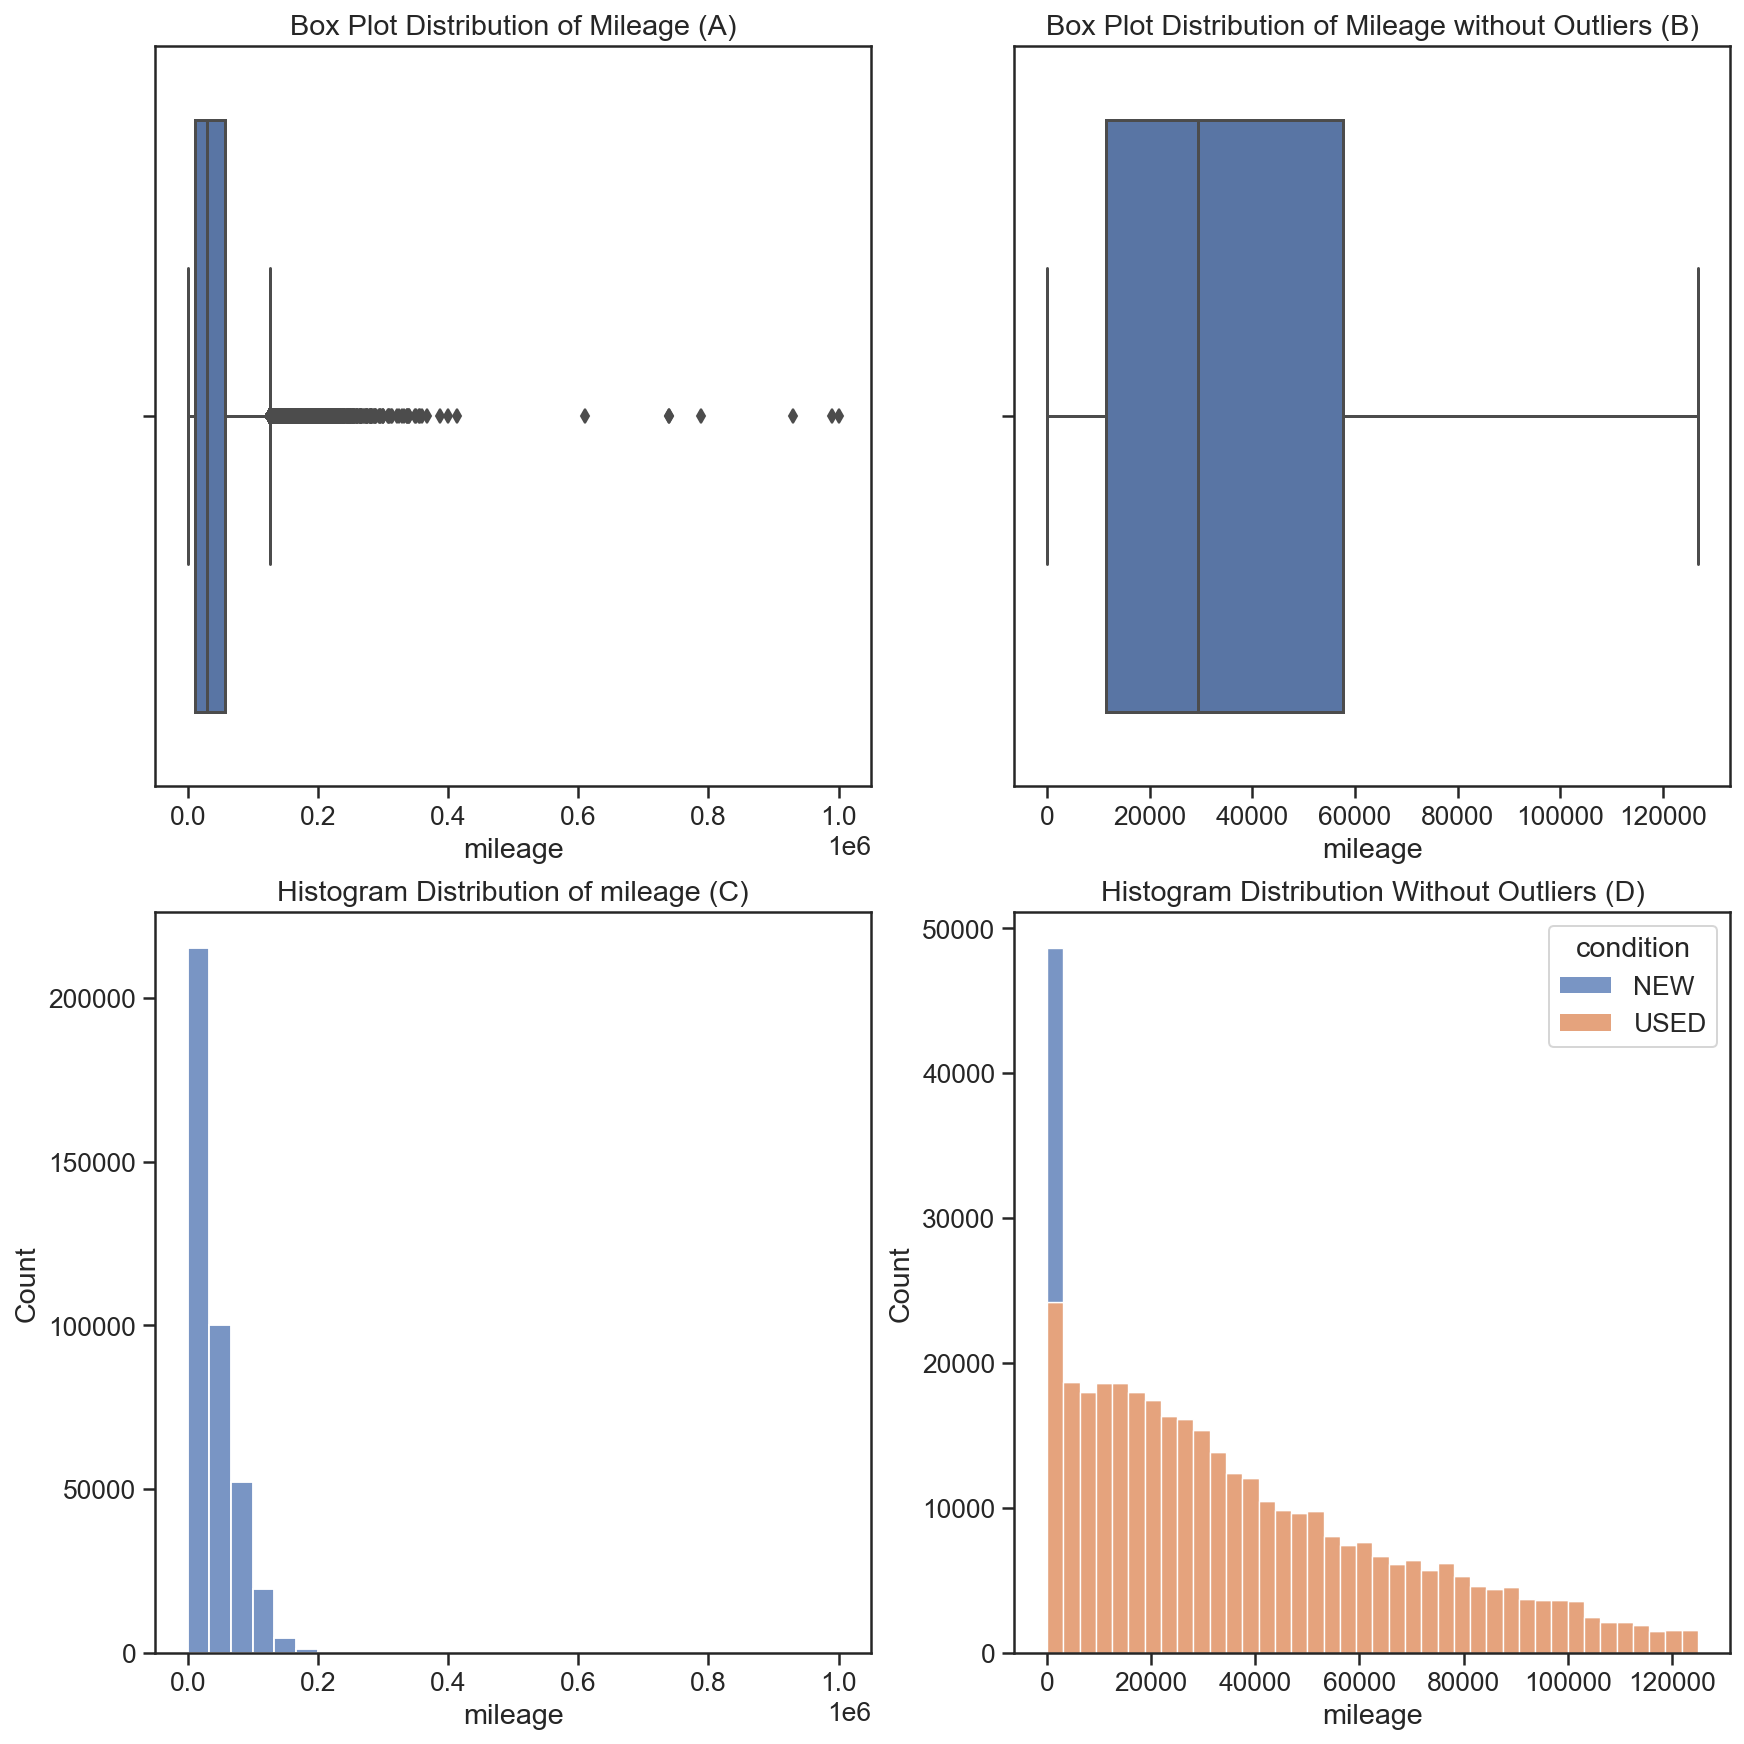

In [12]:
# Create figure for subplots
fig, ax = plt.subplots(2,2, figsize=(12,12), constrained_layout=True)

# View boxplot distribution for mileage
sns.boxplot(x='mileage', data=cars, ax=ax[0,0]);
ax[0,0].set_title('Box Plot Distribution of Mileage (A)');

# View histplot distribution for mileage
sns.boxplot(x='mileage', data=cars, ax=ax[0,1], showfliers=False);
ax[0,1].set_title('Box Plot Distribution of Mileage without Outliers (B)');


# View histogram distribution for mileage
sns.histplot(x='mileage', data=cars, ax=ax[1,0], bins=30);
ax[1,0].set_title('Histogram Distribution of mileage (C)');

# View histplot distribution for subset of cars with mileage less than 200k,
# split by condition
sns.histplot(x='mileage', data=cars.loc[cars['mileage'] <= 125000], bins=40, hue='condition', multiple='stack', ax=ax[1,1]);
ax[1,1].set_title('Histogram Distribution Without Outliers (D)');

##### Skewness and Kurtosis
A skewness > 1 would indicate that the distribution is highly positively skewed, with a kurtosis of > 3 indicating a leptokurtic distribution, indicating the presence of outliers on the long tail.

In [13]:
# Get skewness and kurtosis of mileage feature
get_skew(cars, 'mileage')

mileage Skewness 1.4499462144066446: 
mileage Kurtosis 7.4389873055707625: 


#### Year Distribution

**Observations from the Distributions**
1. The range of data is unrealistic (listings with the year 1000), suggesting there are some incorrect values in the dataset.
2. Most of our observations have year greater than 2000, could make it difficult to model cars older than this.
3. The data is quite heavily left skewed, that is, most of our observations have high year with more car sales as the mileage increases.
5. Removing the outliers that we have visualised (approximately), notice that cars that are a few years old have more sales listings than the new cars.

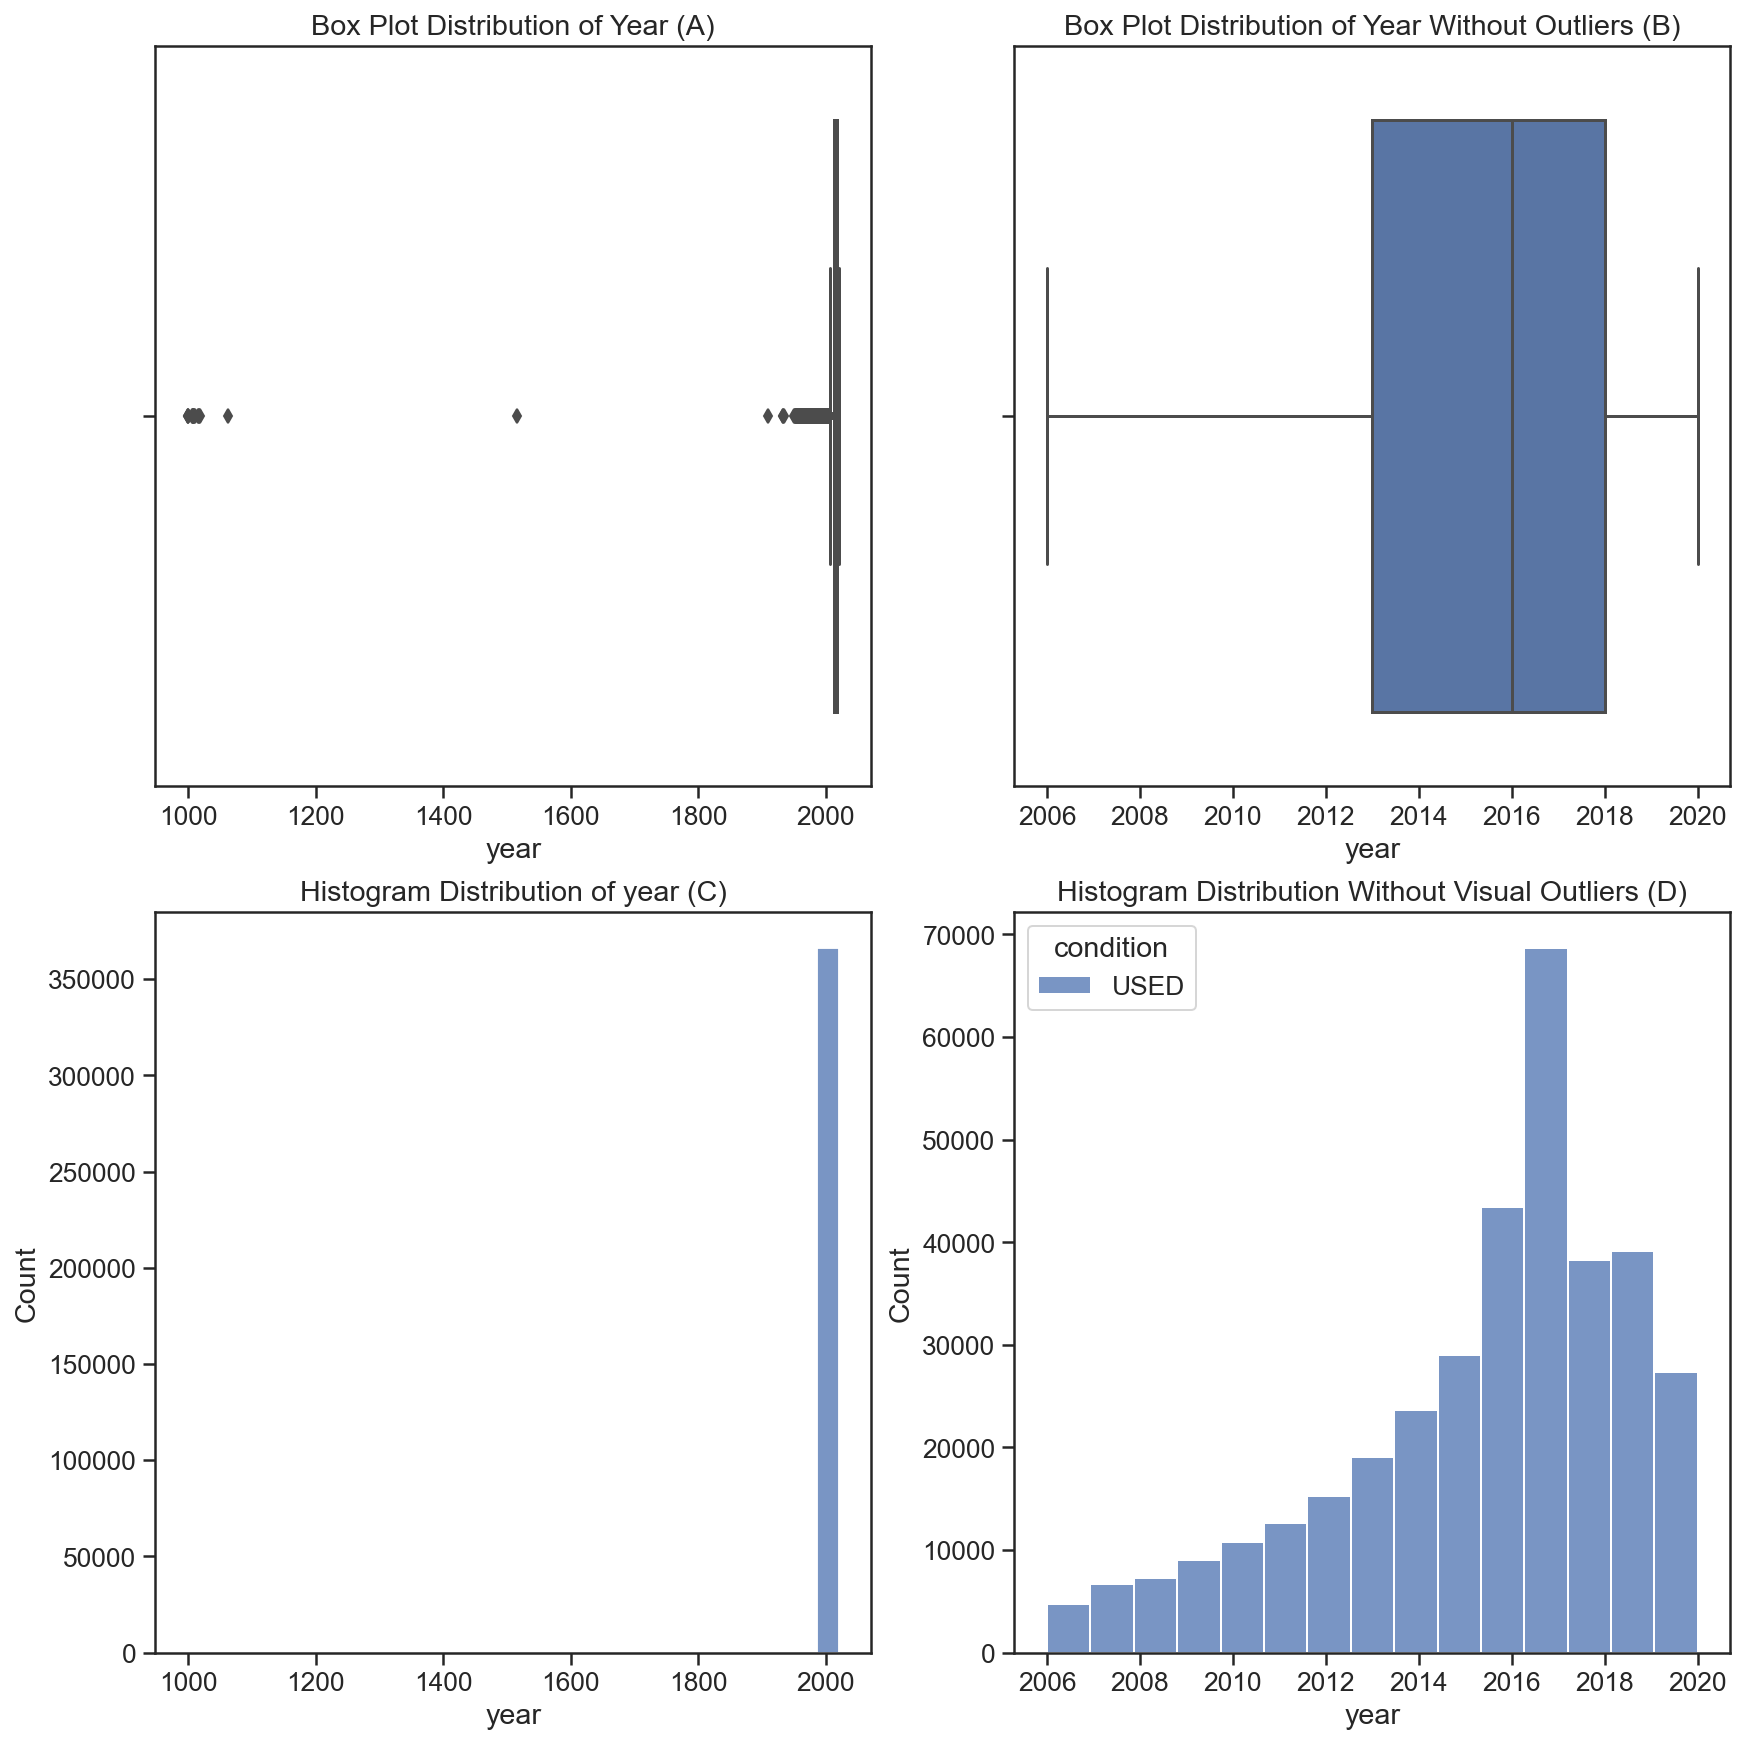

In [14]:
# Create figure for subplots
fig, ax = plt.subplots(2,2, figsize=(12,12), constrained_layout=True)

# View boxplot distribution for year
sns.boxplot(x='year', data=cars, ax=ax[0,0]);
ax[0,0].set_title('Box Plot Distribution of Year (A)');

# View boxplot distribution without outliers
sns.boxplot(x='year', data=cars, showfliers=False, ax=ax[0,1]);
ax[0,1].set_title('Box Plot Distribution of Year Without Outliers (B)');

# View histogram distribution for year
sns.histplot(x='year', data=cars, ax=ax[1,0], bins=30);
ax[1,0].set_title('Histogram Distribution of year (C)');

# View histogram distribution for years above 2000 split by condition
sns.histplot(x='year', data=cars.loc[cars['year'] >= 2006], bins=15, hue='condition', multiple='stack', ax=ax[1,1]);
ax[1,1].set_title('Histogram Distribution Without Visual Outliers (D)');

##### Skewness and Kurtosis
Opposite to mileage, the data is negatively (left) skewed with even higher kurtosis indicating the presence of outliers.

In [15]:
# Get skewness and kurtosis of year feature
get_skew(cars, 'year')

year Skewness -87.94270712440368: 
year Kurtosis 10975.331329677867: 


#### Price Distribution

**Observations from the Distributions**
1. The boxplot shows many outliers, some of which have extremely high prices, which could skew our regression models if not dealt with appropriately.
2. Most of our observations have price under 100,000.
3. The data is quite heavily right skewed, that is, as price increases, the number of observations decrease.

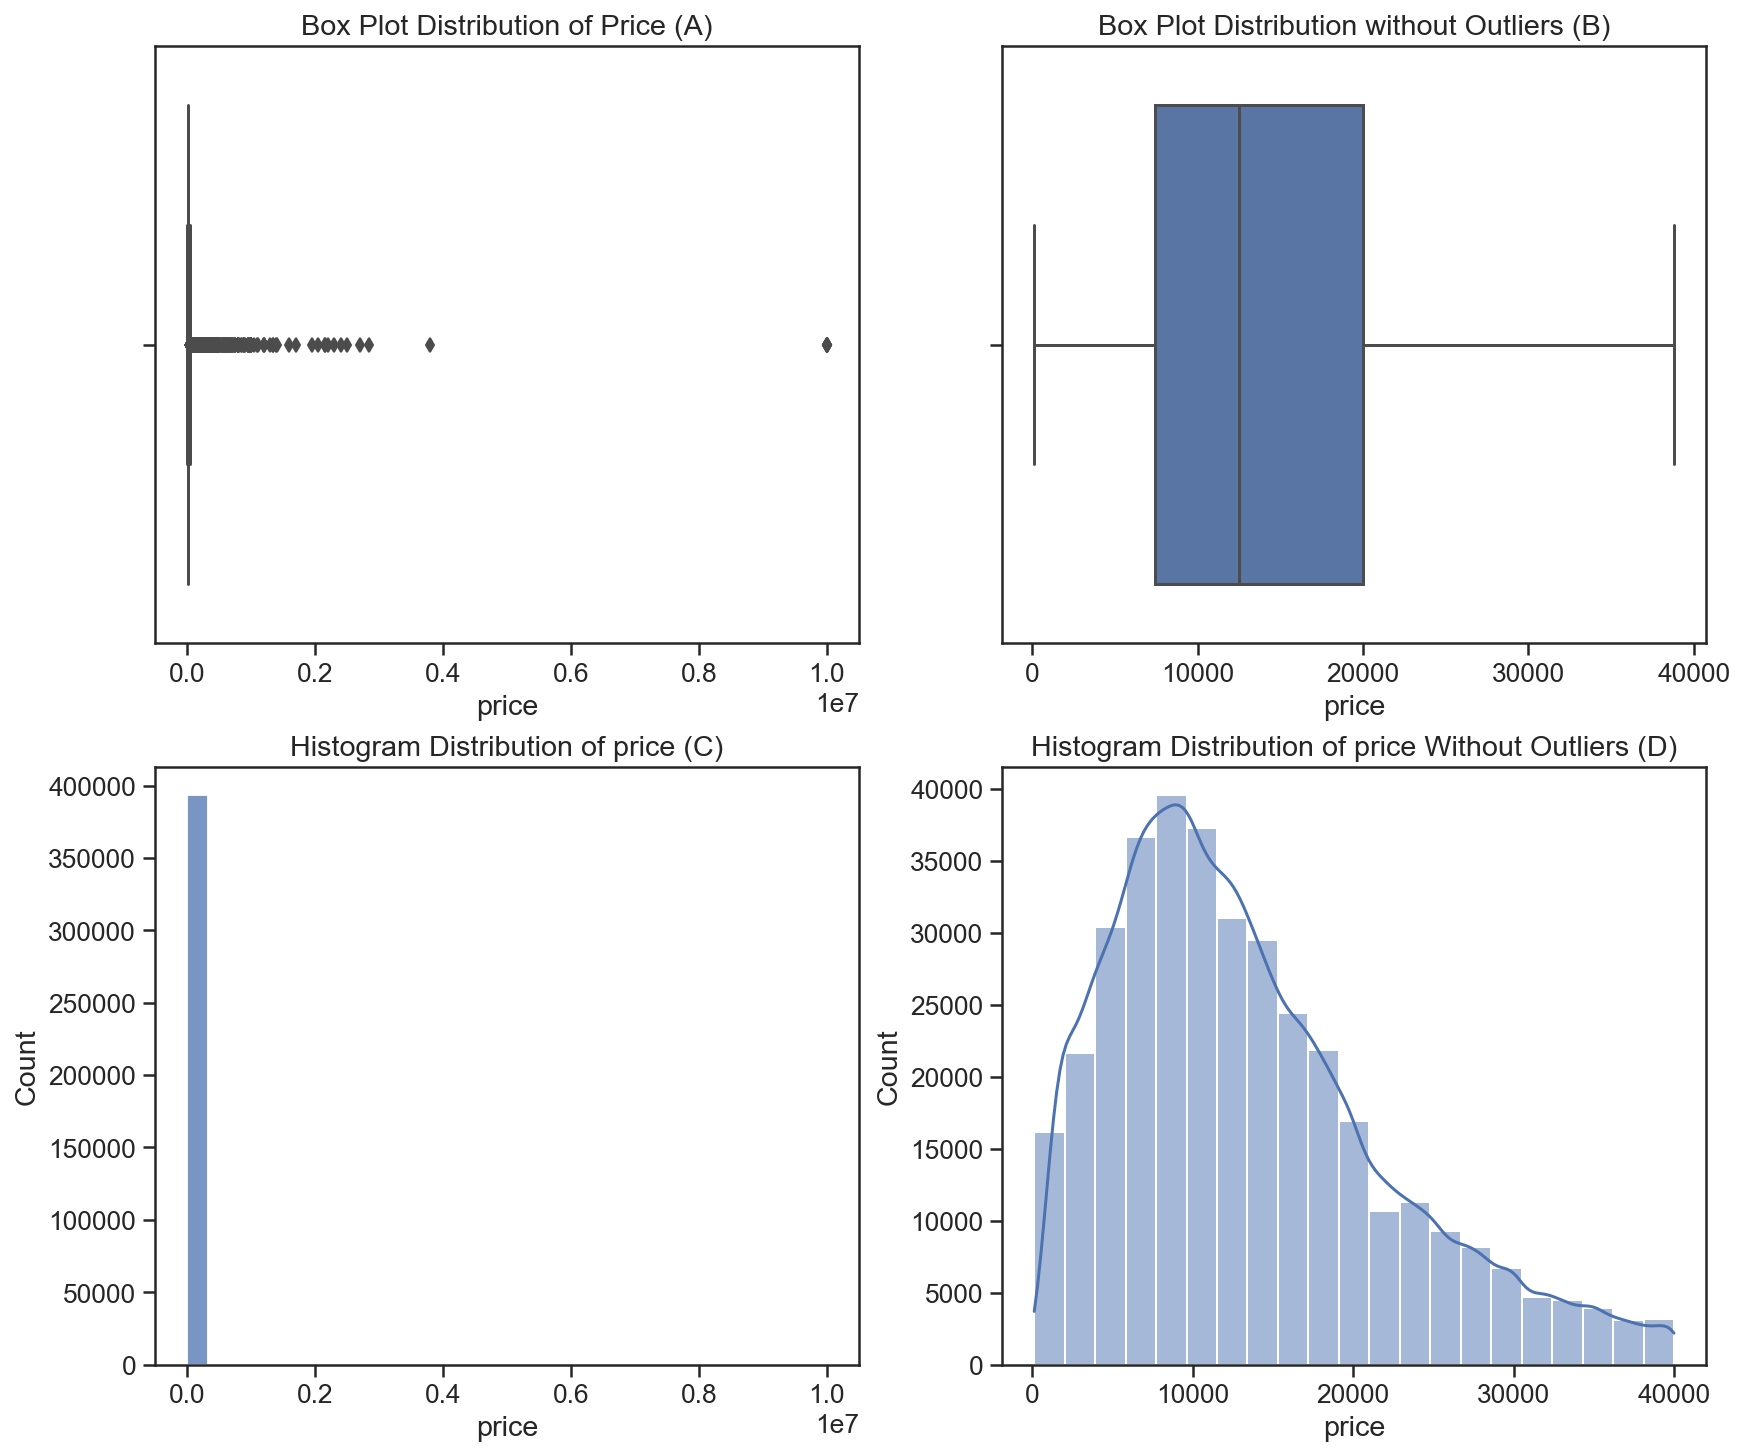

In [16]:
# Create figure for subplots
fig, ax = plt.subplots(2,2, figsize=(12,10), constrained_layout=True)

# View boxplot distribution for price
sns.boxplot(x='price', data=cars, ax=ax[0,0]);
ax[0,0].set_title('Box Plot Distribution of Price (A)');

sns.boxplot(x='price', data=cars, ax=ax[0,1], showfliers=False);
ax[0,1].set_title('Box Plot Distribution without Outliers (B)')


# View histogram distribution for price
sns.histplot(x='price', data=cars, ax=ax[1,0], bins=30);
ax[1,0].set_title('Histogram Distribution of price (C)');

# View histogram distribution for price under 150k split by condition
sns.histplot(x='price', data=cars.loc[cars['price'] <= 40000], bins=21, kde=True, ax=ax[1,1]);
ax[1,1].set_title('Histogram Distribution of price Without Outliers (D)');

##### Skewness and Kurtosis
Similar to mileage, more highly positively skewed with larger probability of outliers.

In [17]:
# Get skewness and kurtosis of price feature
get_skew(cars, 'price')

price Skewness 154.09492719087976: 
price Kurtosis 31805.275390658902: 


### Analysis of Categorical Distributions

Categorical features can have distribution measured by the frequency of unique values. From this we can see if the data is balanced or unbalanced, and if it is uniform.

In [18]:
# List of categorical features in the dataset
features = ['colour', 'make', 'model', 'condition', 'type', 'car_van', 'fuel']

# Descriptive statistics of categorical features
cars[features].describe(include='all')

colour    make   model condition       type car_van    fuel
count   388242  393378  393378    393378     392560  393378  392820
unique      22     110    1168         2         16       2       9
top      Black     BMW    Golf      USED  Hatchback   False  Petrol
freq     84767   37228   11458    368891     163321  391591  210661

In [19]:
# Loop through categorical features and plot frequency distribution of values
for feature in features:
    print(feature)
    print(cars[feature].value_counts(normalize=True))
    print('') 

colour
Black         0.21834
White         0.17786
Grey          0.17064
Blue          0.15055
Silver        0.12577
Red           0.10633
Green         0.01135
Orange        0.00994
Yellow        0.00529
Brown         0.00517
Multicolour   0.00398
Beige         0.00395
Bronze        0.00342
Purple        0.00310
Gold          0.00211
Pink          0.00085
Turquoise     0.00074
Maroon        0.00041
Burgundy      0.00016
Magenta       0.00004
Navy          0.00002
Indigo        0.00000
Name: colour, dtype: float64

make
BMW              0.09464
Audi             0.08834
Volkswagen       0.08543
Vauxhall         0.08410
Mercedes-Benz    0.08031
                   ...  
Bristol          0.00000
Wolseley         0.00000
Pagani           0.00000
International    0.00000
Custom Vehicle   0.00000
Name: make, Length: 110, dtype: float64

model
Golf               0.02913
Corsa              0.02631
C Class            0.02155
3 Series           0.02111
1 Series           0.01893
                 

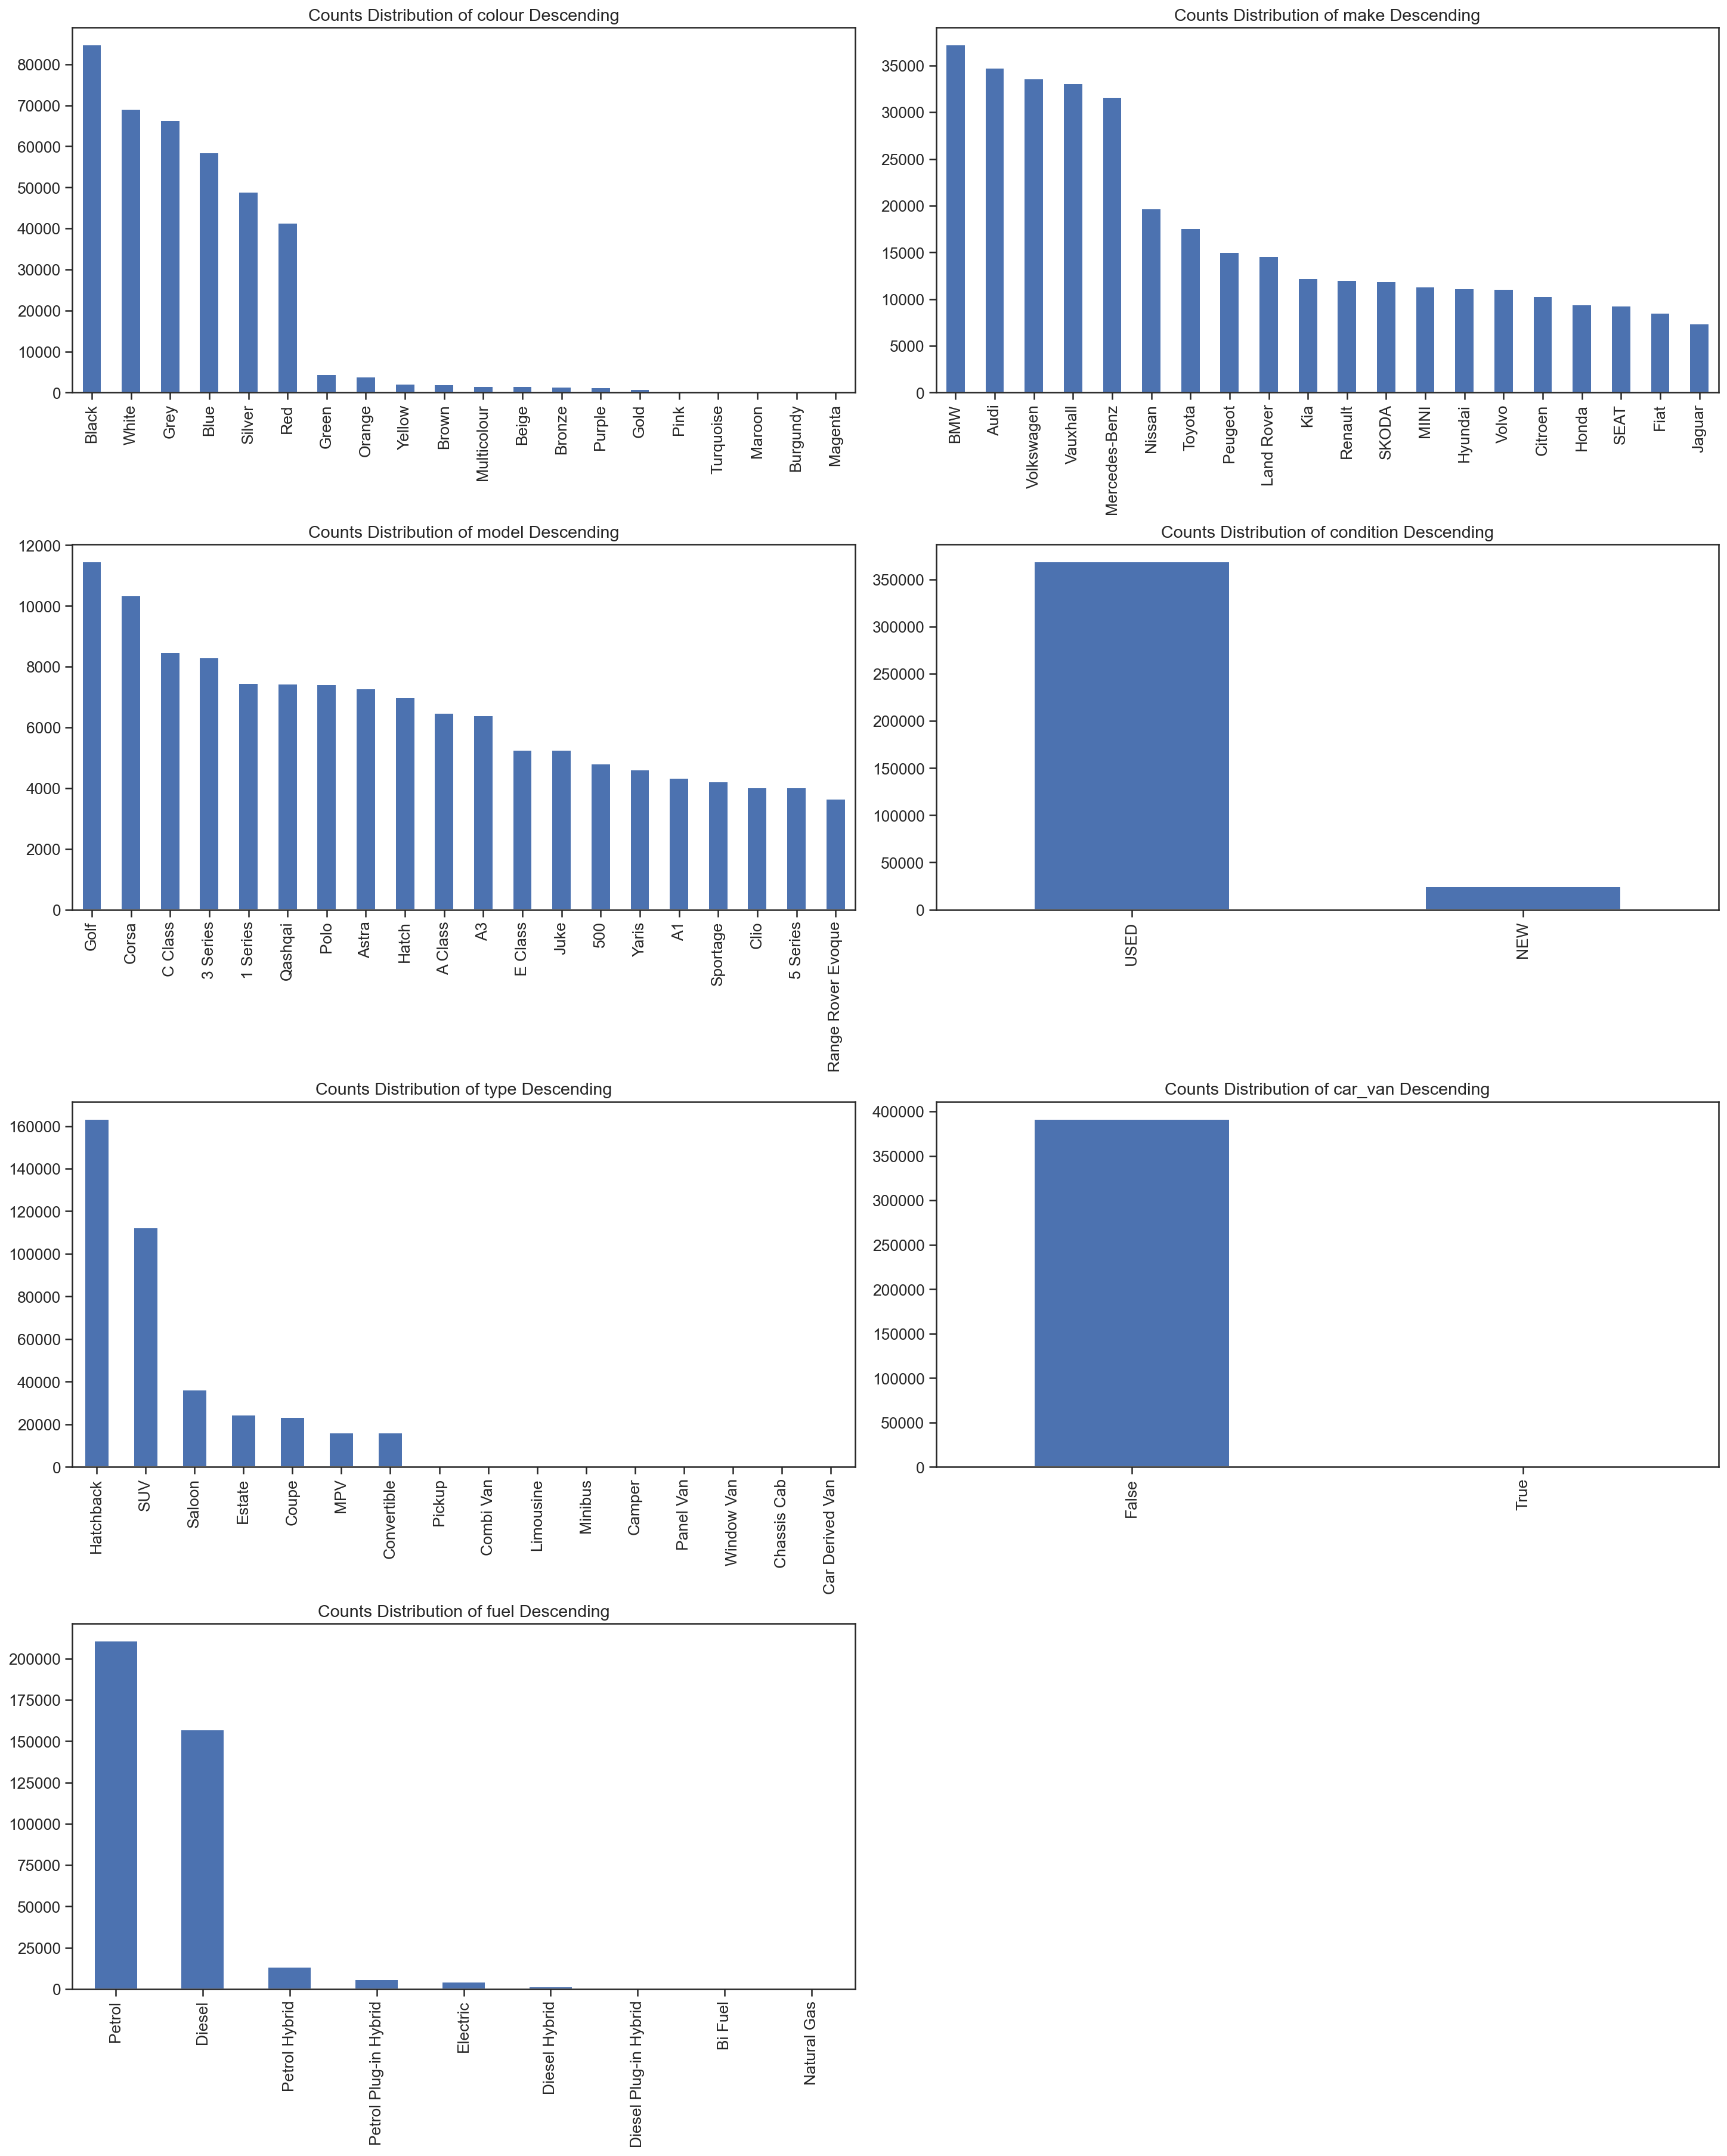

In [20]:
# Create figure for subplots
fig, axs = plt.subplots(4, 2, figsize=(20,25), constrained_layout=True)

# Loop through categorical features and plot frequency distribution of values
for feature, ax in zip(features, axs.ravel()):
    cars[feature].value_counts().head(20).plot(kind='bar', ax=ax);
    ax.set_title('Counts Distribution of {} Descending'.format(feature))
   
# Delete final plot as only 7 necessary.
fig.delaxes(axs[3,1])

## 2. Data Processing

Begin the data processing section by checking the unique values of each category, in case there is anything that jumps out that might need to be amended.

For example, in the reg feature, see that some registrations have been recorded in lower case and might need to be amended, more investigation necessary. There are also many instances of model that only occur a small number of times in the dataset, which is probably not enough data to make an accurate representation of the price based on model.

In [21]:
# Check unique values of fuel
cars['fuel'].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', nan,
       'Bi Fuel', 'Natural Gas'], dtype=object)

In [22]:
# Check unique values of colour
cars['colour'].unique()

array(['Grey', 'Blue', 'Brown', 'Red', 'Bronze', 'Black', 'White',
       'Silver', nan, 'Purple', 'Green', 'Orange', 'Yellow', 'Turquoise',
       'Gold', 'Multicolour', 'Beige', 'Burgundy', 'Pink', 'Maroon',
       'Magenta', 'Navy', 'Indigo'], dtype=object)

In [23]:
# Check unique values of reg
cars['reg'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

In [24]:
# Check unique values of type
cars['type'].unique()

array(['SUV', 'Saloon', 'Hatchback', 'Convertible', 'Limousine', 'Estate',
       'MPV', 'Coupe', nan, 'Pickup', 'Combi Van', 'Panel Van', 'Minibus',
       'Window Van', 'Camper', 'Car Derived Van', 'Chassis Cab'],
      dtype=object)

In [25]:
# Check unique values of car_van
cars['car_van'].unique()

array([False,  True])

In [26]:
# Check unique values of model
model = cars['model'].value_counts()
model.loc[model < 5]

560                 4
Talento             4
Kyron               4
Relay               4
Frontera            4
                   ..
Isetta              1
Starlet Glanza V    1
RX 200t             1
Scuderia Spider     1
480                 1
Name: model, Length: 349, dtype: int64

In [27]:
# Check unique values of condition
cars['condition'].unique()

array(['NEW', 'USED'], dtype=object)

#### Dealing with Noise and Outliers

When dealing with outliers, it is important to also look for any incorrect values that we might be able to deal with first.

**Incorrect Year**

From the distribution graphs above, we can see clearly that some cars go back to the year 999. According to Mercedes-Benz, the first patent for a automobile was succeeded in 1876 ([Mercedes-Benz Patent](https://group.mercedes-benz.com/company/tradition/company-history/1885-1886.html)). 

This means we have a small number of data that is incorrect prior to this date. Since the dates are so drastically incorrect in a continuous field ("Year"), this could have an increased affect on our models than say, incorrect dates only incorrect by +- 1 year.

It is important to notice that some of the vehicles appear to be legitimate entries, for example the Black Austin Seven with year 1933, however all vehicles with year < 1930 are incorrect entries. I will deal with these entries with the null values and therefore have set them to null.

In [28]:
# Create subset of observations with year less than 1935
inc_year = cars.loc[cars['year'] < 1935].copy()

print('Showing {} entries in the incorrect year dataset.'.format(len(inc_year)))
inc_year.head()

Showing 21 entries in the incorrect year dataset.


mileage  reg colour    make     model condition  \
public_reference                                                       
202006140121316  26000.00000  NaN  Black  Austin     Seven      USED   
202006270588110  14000.00000   07   Blue  Toyota     Prius      USED   
202010155035879  96659.00000   65  Black    Audi  A4 Avant      USED   
202009163810376  37771.00000   63  Black   Smart    fortwo      USED   
202008102305925  30000.00000   59    Red  Toyota      AYGO      USED   

                       year  price       type  car_van           fuel  
public_reference                                                       
202006140121316  1933.00000   9995     Saloon    False         Petrol  
202006270588110  1007.00000   7000  Hatchback    False  Petrol Hybrid  
202010155035879  1515.00000  10385     Estate    False         Diesel  
202009163810376  1063.00000   4785      Coupe    False         Petrol  
202008102305925  1009.00000   4695  Hatchback    False         Petrol

In [29]:
# Set observations with year less than 1930 to null so we can deal with them alongside null values.
cars.loc[cars['year'] < 1930, 'year'] = np.nan

##### Noisy Registrations

Looking at the values with lowest number of occurences, we can see that some registration codes have been input in lower case and therefore will correct this before moving on.

In [30]:
# Get count of registrations that appear less than 5 times
reg_count = cars['reg'].value_counts()
print(reg_count.loc[reg_count < 5].index)

Index(['95', '94', '37', 'k', '38', 's', 'CA', '723xuu', 'FW', 'm', '85', 'p'], dtype='object')


In [31]:
# Transform and transpose into dataframe
pd.DataFrame(
    # Get frequency table of registrations that contain alphabetic only.
    cars[cars['reg'].str.isalpha().fillna(False)]['reg'].value_counts()
).transpose()

Y    X    W    R    P    T    V    S    N    M  ...   D   C   B   A  \
reg  348  271  248  241  206  173  154  151  144  125  ...  48  47  43  28   

     CA  m  FW  s  k  p  
reg   1  1   1  1  1  1  

[1 rows x 27 columns]

In [32]:
# Investigate instance of lower case 's' in 'reg'
cars.loc[cars['reg'] == 's']

mileage reg colour   make model condition       year  \
public_reference                                                            
202006290665242  58000.00000   s    NaN  Rover  Mini      USED 2001.00000   

                  price    type  car_van    fuel  
public_reference                                  
202006290665242    7995  Saloon    False  Petrol

In [33]:
# Investigate upper case 'S' to compare
cars.loc[cars['reg'] == 'S'].head()

mileage reg  colour           make    model condition  \
public_reference                                                              
202010275488566   82000.00000   S    Grey        Renault     Clio      USED   
202010215244905   87605.00000   S    Blue        Porsche      911      USED   
202010315639258   35518.00000   S     Red        Ferrari     F355      USED   
202008052140257    9700.00000   S  Silver  Mercedes-Benz  C Class      USED   
202008102319659  108000.00000   S  Silver        Porsche      911      USED   

                       year  price         type  car_van    fuel  
public_reference                                                  
202010275488566  1998.00000    350    Hatchback    False  Petrol  
202010215244905  1998.00000  12999  Convertible    False  Petrol  
202010315639258  1999.00000  84995  Convertible    False  Petrol  
202008052140257  1998.00000   6991       Saloon    False  Petrol  
202008102319659  2001.00000  14995  Convertible    False  Petrol

In [34]:
# Convert registration to upper case
cars['reg'] = cars['reg'].str.upper()

In [35]:
# Get count of registrations that appear less than 5 times
reg_count = cars['reg'].value_counts()
reg_list = reg_count[reg_count < 5].index
print(reg_list)

Index(['94', '95', '85', 'CA', 'FW', '723XUU', '38', '37'], dtype='object')


In [36]:
# View rows that appear in list
cars.loc[cars['reg'].isin(reg_list.tolist())].head()

mileage     reg     colour       make     model  \
public_reference                                                       
202010225293464  32001.00000      94     Orange    Renault    Captur   
202010215252376  58686.00000      85      Black    Hyundai       i30   
202010014455127   2000.00000      CA      Green   Caterham     Seven   
202009264242828  48000.00000      FW      Black     Morris        10   
202010195172029   4050.00000  723XUU  Turquoise  Chevrolet  Corvette   

                 condition       year  price         type  car_van    fuel  
public_reference                                                            
202010225293464       USED        NaN   7400          SUV    False  Petrol  
202010215252376       USED        NaN   6900          NaN    False  Diesel  
202010014455127       USED        NaN  21995  Convertible    False  Petrol  
202009264242828       USED 1934.00000   5995       Saloon    False  Petrol  
202010195172029       USED        NaN  89990          NaN    False  Petrol

We can identify further incorrect values in the year and reg columns by comparing what we know about registration codes with the corresponding years. For example, we can use a group by function to view pairs on reg and year.

Using the group by function below, we find only 137 observations which might have this issue. A small number of these such as the "FW" registration from 1934, could be accurate. This small subset affects less than 0.1% of the total data, and therefore is unlikely to cause upset to models.

In [37]:
# View reg-year pairings with low number of occurences, likely they are incorrect.
inc_reg = cars.loc[cars['year'] > 2001].groupby(['reg','year']).size().sort_values(ascending=True)
inc_reg.loc[inc_reg < 5]

reg  year      
56   2020.00000    1
64   2018.00000    1
63   2019.00000    1
     2016.00000    1
61   2019.00000    1
                  ..
19   2020.00000    3
66   2020.00000    3
14   2019.00000    4
09   2020.00000    4
62   2019.00000    4
Length: 108, dtype: int64

#### Dealing with Missing Values - Fuel Missing Values

We can predict the **type** and **fuel type** of cars by using data already available to us in other columns.

It is important to note that there is no missing data in the **make** features as shown below.

In [38]:
# Get number of missing values for each column
cars.isnull().sum()

mileage        124
reg          25092
colour        5136
make             0
model            0
condition        0
year         26545
price            0
type           818
car_van          0
fuel           558
dtype: int64

In [39]:
# Get first five 'makes'
cars['make'].unique()[0:5]

array(['Volvo', 'Jaguar', 'SKODA', 'Vauxhall', 'Land Rover'], dtype=object)

##### Count of Fuel Type for Makes

Counting the fuel types for a selection or makes shows that the probability of a specific fuel type occuring is higher based on make.

In [40]:
# View the fuel type frequency distribution for these makes.
for make in cars['make'].unique()[0:5]:
    print(make)
    print(cars.loc[cars['make'] == make]['fuel'].value_counts())
    print(' ')

Volvo
Diesel                   6029
Petrol                   2754
Petrol Plug-in Hybrid    1071
Diesel Hybrid             632
Petrol Hybrid             492
Diesel Plug-in Hybrid      22
Bi Fuel                     3
Name: fuel, dtype: int64
 
Jaguar
Diesel                   4809
Petrol                   2240
Electric                  332
Petrol Plug-in Hybrid       1
Name: fuel, dtype: int64
 
SKODA
Petrol                   7522
Diesel                   4292
Petrol Plug-in Hybrid      79
Electric                    9
Name: fuel, dtype: int64
 
Vauxhall
Petrol                   25218
Diesel                    7709
Petrol Plug-in Hybrid       90
Electric                    51
Bi Fuel                      1
Name: fuel, dtype: int64
 
Land Rover
Diesel                   13217
Petrol                    1170
Petrol Plug-in Hybrid      168
Diesel Hybrid               14
Name: fuel, dtype: int64
 


In [41]:
null_index = cars.loc[cars['fuel'].isnull()]
null_index

mileage  reg  colour           make        model  \
public_reference                                                        
202010305621511     10.00000  NaN   Black            BMW     5 Series   
202003128359933      0.00000  NaN     NaN         Jaguar           XF   
202010305598848     10.00000  NaN    Grey          Volvo          V60   
202005129287540  61568.00000   14  Silver         Toyota        Prius   
202010295581781     10.00000  NaN   Black  Mercedes-Benz      A Class   
...                      ...  ...     ...            ...          ...   
202007301903022   3881.00000   20  Orange          Dacia       Duster   
202010315654843      1.00000  NaN   Black        Peugeot          508   
202005289599976     17.00000   19     NaN        McLaren        Senna   
202009033258549     10.00000  NaN   Black       Vauxhall  Grandland X   
202011015662459   1000.00000   70  Silver  Mercedes-Benz      A Class   

                 condition       year   price       type  car_van fuel  
public_reference                                                        
202010305621511        NEW        NaN   51395     Estate    False  NaN  
202003128359933        NEW        NaN   35990     Estate    False  NaN  
202010305598848        NEW        NaN   31414     Estate    False  NaN  
202005129287540       USED 2020.00000    7995  Hatchback    False  NaN  
202010295581781        NEW        NaN   36584  Hatchback    False  NaN  
...                    ...        ...     ...        ...      ...  ...  
202007301903022       USED        NaN   12989        SUV    False  NaN  
202010315654843        NEW        NaN   39135  Hatchback    False  NaN  
202005289599976       USED 2019.00000  799900        NaN    False  NaN  
202009033258549        NEW        NaN   31190        SUV    False  NaN  
202011015662459       USED 2020.00000   32000  Hatchback    False  NaN  

[558 rows x 11 columns]

In [42]:
# Number of null values in the specified columns
cars[['make','model','type','fuel']].isnull().sum()

make       0
model      0
type     818
fuel     558
dtype: int64

In [43]:
# Get frequency of values in fuel feature
cars['fuel'].value_counts()

Petrol                   210661
Diesel                   156936
Petrol Hybrid             13370
Petrol Plug-in Hybrid      5858
Electric                   4317
Diesel Hybrid              1329
Diesel Plug-in Hybrid       184
Bi Fuel                     164
Natural Gas                   1
Name: fuel, dtype: int64

In [44]:
# View the mode of grouped 'make' obervations being used to fill null values
cars.groupby(['make'])['fuel'].transform(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))

public_reference
202006039777689    Petrol Plug-in Hybrid
202007020778260                   Diesel
202007020778474                   Petrol
202007080986776                   Diesel
202007161321269                   Diesel
                           ...          
202010315652942                   Petrol
202010315657341                   Petrol
202010315659271                   Petrol
202011015662436                   Petrol
201512149444029                   Diesel
Name: fuel, Length: 393378, dtype: object

In [45]:
# Use these values to replace the values in the fuel column.
cars['fuel'] = cars.groupby(['make'])['fuel'].transform(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))

In [46]:
# Check 'Toyota' to ensure that 'Petrol' has been input correctly (most commonly occuring value)
cars.loc[cars['make']=='Toyota'].groupby('fuel')['make'].size()

fuel
Bi Fuel                     2
Diesel                   1585
Petrol                   9004
Petrol Hybrid            6844
Petrol Plug-in Hybrid     106
Name: make, dtype: int64

In [47]:
# Repeat for 'BMW' to ensure that 'Diesel' has been input correctly
cars.loc[cars['make']=='BMW'].groupby('fuel')['make'].size()

fuel
Diesel                   22632
Diesel Hybrid              428
Electric                   258
Petrol                   12437
Petrol Hybrid              347
Petrol Plug-in Hybrid     1126
Name: make, dtype: int64

#### Type Missing Values

Similar to fuel, the type of vehicle can be replaced with the mode of make groups, which provides increased probability based on make.

In [48]:
# View type groupby function for replacement
cars.groupby('make')['type'].agg(lambda x: x.mode(dropna=False))

/Users/christian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:969: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  warn(f"Unable to sort modes: {err}")


make
AC            Convertible
AK            Convertible
Abarth          Hatchback
Aixam           Hatchback
Alfa Romeo      Hatchback
                 ...     
Volkswagen      Hatchback
Volvo                 SUV
Westfield     Convertible
Wolseley           Saloon
Zenos         Convertible
Name: type, Length: 110, dtype: object

In [49]:
# Replace null values with the grouped mode of 'make' and 'model'
cars['type'] = cars.groupby('make')['type'].transform(lambda x: x.fillna(x.mode(dropna=False).iloc[0]))

Null values still exist in the type feature following this transformation. The reason for this is that some of the makes in our groupby function have a mode of NaN. We can replace these values with the mode of the full dataset.

In [50]:
# Check that null values have been successfully filled and none remain.
cars[['make','model','type','fuel']].isnull().sum()

make      0
model     0
type     12
fuel      0
dtype: int64

In [51]:
# Check remaining missing values for type
cars.loc[cars['type'].isnull()]

mileage reg  colour     make     model condition  \
public_reference                                                        
202010114868713   6000.00000  08  Maroon      Dax   Tojeiro      USED   
202009203970256    120.00000  53     NaN    Tiger   Era HSS      USED   
202009304376272   3634.00000  18     Red      BAC      Mono      USED   
201801212954995   4000.00000  08    Grey  Replica     Cobra      USED   
201907019579002   7000.00000  11    Blue  Replica     Cobra      USED   
202010124905068  75000.00000  12     Red      Mev    Exocet      USED   
202002187439713   5000.00000  57     NaN  Replica     Cobra      USED   
202008262945935   2500.00000  54   Green    Tiger      Avon      USED   
201711161312649   5000.00000  02     Red    Tiger      Avon      USED   
201908121048302    162.00000  68    Blue  Replica     Cobra      USED   
201910083092619  75000.00000  52     NaN  Pontiac  Firebird      USED   
201804245869141   8000.00000  08     NaN  Replica     Cobra      USED   

                       year   price type  car_van    fuel  
public_reference                                           
202010114868713  2008.00000   35980  NaN    False  Petrol  
202009203970256  2004.00000   17995  NaN    False  Petrol  
202009304376272  2018.00000  104950  NaN    False  Petrol  
201801212954995  2008.00000   49995  NaN    False  Petrol  
201907019579002  2011.00000   34950  NaN    False  Petrol  
202010124905068  2012.00000    8495  NaN    False  Petrol  
202002187439713  2007.00000   39995  NaN    False  Petrol  
202008262945935  2005.00000    8500  NaN    False  Petrol  
201711161312649  2002.00000    9000  NaN    False  Petrol  
201908121048302  2018.00000   39990  NaN    False  Petrol  
201910083092619  2002.00000    6990  NaN    False  Petrol  
201804245869141  2008.00000   39995  NaN    False  Petrol

In [52]:
# Replace with mode of full dataset
cars['type'] = cars['type'].fillna(cars['type'].mode()[0])

# Check for missing values in type
cars['type'].isnull().sum()

0

#### Year Missing Values

As noted in the distribution plots of year, vehicles with condition = "NEW" do not have year input, and similarly do not have a registration input. Assuming that "NEW" vehicles are the next sequence of year, we can replace these values with 2021 and 21 respectively.

In [53]:
# View the first 5 rows of data in selected columns.
cars[['reg','year','condition']].head()

reg       year condition
public_reference                          
202006039777689   NaN        NaN       NEW
202007020778260    61 2011.00000      USED
202007020778474    17 2017.00000      USED
202007080986776    16 2016.00000      USED
202007161321269    64 2015.00000      USED

In [54]:
# Subset observations where condition is NEW
cars.loc[cars['condition'] == 'NEW'].head()

mileage  reg colour        make    model condition  year  \
public_reference                                                             
202006039777689   0.00000  NaN   Grey       Volvo     XC90       NEW   NaN   
201911043995897   5.00000  NaN    NaN      Nissan  X-Trail       NEW   NaN   
202008272998331   0.00000  NaN  White  Volkswagen  T-Cross       NEW   NaN   
202001306737473   0.00000  NaN  White        Fiat    Panda       NEW   NaN   
202003178531910   0.00000  NaN    NaN       Honda    Civic       NEW   NaN   

                  price       type  car_van                   fuel  
public_reference                                                    
202006039777689   73970        SUV    False  Petrol Plug-in Hybrid  
201911043995897   27595        SUV    False                 Diesel  
202008272998331   25000        SUV    False                 Petrol  
202001306737473   13999  Hatchback    False                 Petrol  
202003178531910   19495  Hatchback    False                 Petrol

In [55]:
# See how many mising values are in the reg and year columns
cars[['reg','year','condition']].isnull().sum()

reg          25092
year         26545
condition        0
dtype: int64

In [56]:
# Descriptive statistics for 'NEW' cars show corresponding null vaues in reg and year
cars[cars['condition'] == 'NEW'][['mileage','reg','year','type']].describe(include='all')

mileage  reg    year   type
count  24487.00000    0 0.00000  24487
unique         NaN    0     NaN     10
top            NaN  NaN     NaN    SUV
freq           NaN  NaN     NaN  12078
mean       6.04562  NaN     NaN    NaN
std        9.24618  NaN     NaN    NaN
min        0.00000  NaN     NaN    NaN
25%        0.00000  NaN     NaN    NaN
50%        5.00000  NaN     NaN    NaN
75%       10.00000  NaN     NaN    NaN
max      100.00000  NaN     NaN    NaN

In [57]:
# Set 'year' and 'reg' to 2021 for 'NEW' cars
cars.loc[cars['condition'] == 'NEW', 'year'] = 2021
cars.loc[cars['condition'] == 'NEW', 'reg'] = 21

# Check missing values
cars[['year','reg']].isnull().sum()

year    2058
reg      605
dtype: int64

**Skewed Data**

Looking at the new distribution for year still shows some major outliers which will affect the mean of the data, therefore a more accurate representation of missing data would be to replace with the median.

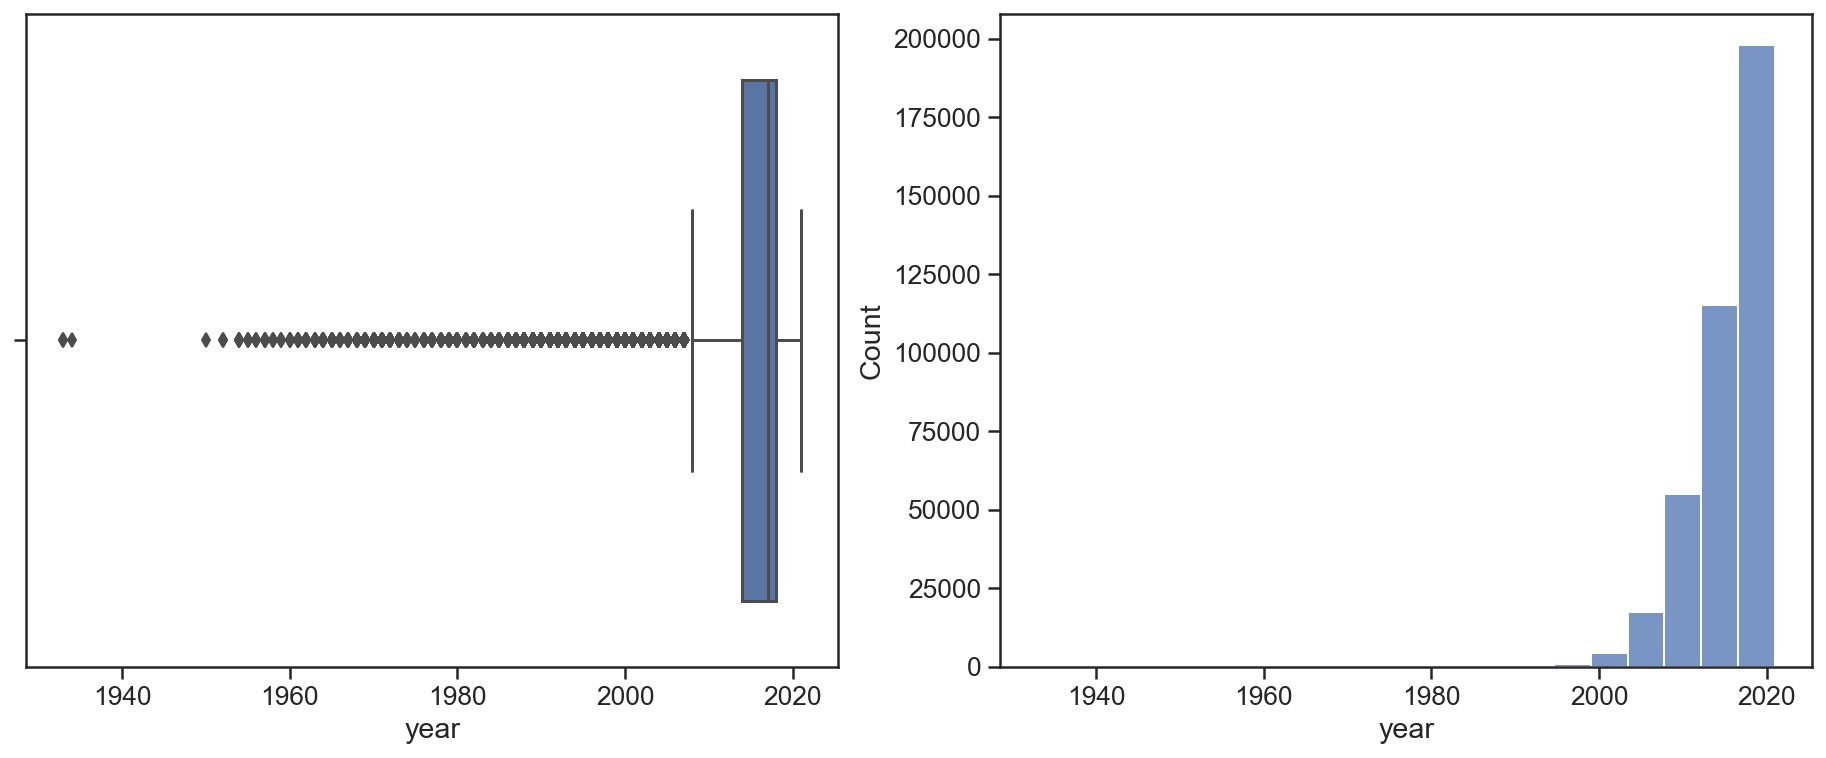

In [58]:
# Set figure and axes for subplots
fig, axs = plt.subplots(1,2, figsize=(16,6))

# Plot box-plot distribution for year
sns.boxplot(x='year', data=cars, ax=axs[0]);

# Plot histogram distribution for year
sns.histplot(x='year',data=cars, ax=axs[1], bins=20);

In [59]:
print('The mean value of year is: {:2f}'.format(cars['year'].mean()))
print('The median value of year is: {:2f}'.format(cars['year'].median()))

The mean value of year is: 2015.406575
The median value of year is: 2017.000000


In [60]:
# Fill the missing values with the median of the feature
cars['year'] = cars['year'].fillna(cars['year'].median())

In [61]:
# Check all missing values corrected
cars[['year']].isnull().sum()

year    0
dtype: int64

#### Mileage Missing Values

Mileage has a high correlation of -0.711 with year, and therefore grouping the data by newly formed, equally split year bins can have a more accurate representation of mileage for the missing values.

Checking the skewness and kurtosis of the bins shows us the data for each bin is still highly skewed with long tails, showing the median still to be a better measure for central tendency.

In [62]:
# Look at missing values
mileage_null = cars.loc[cars['mileage'].isnull()]
mileage_null.head()

mileage  reg  colour     make         model condition  \
public_reference                                                          
202003238706011       NaN  NaN    Grey   Subaru       Outback      USED   
202010084771255       NaN   20    Blue      BMW      3 Series      USED   
202009284304657       NaN   09     Red  Citroen            C1      USED   
202009264233189       NaN   15  Silver     Audi  A5 Cabriolet      USED   
202008192672386       NaN  NaN    Grey    SKODA       Octavia      USED   

                       year  price         type  car_van           fuel  
public_reference                                                         
202003238706011  2017.00000  35995       Estate    False         Petrol  
202010084771255  2020.00000  36990       Saloon    False  Diesel Hybrid  
202009284304657  2009.00000   2699    Hatchback    False         Petrol  
202009264233189  2015.00000  13495  Convertible    False         Petrol  
202008192672386  2017.00000  25085       Estate    False         Petrol

In [63]:
# Check correlation of 'mileage' with 'year' and 'price'
cars[['mileage','year','price']].corr()['mileage']

mileage    1.00000
year      -0.71126
price     -0.15854
Name: mileage, dtype: float64

In [64]:
# Group years into bins
year_labels = ['Very Old', 'Old', 'Neutral Age', 'New', 'Very New']
cars['year_bins'] = pd.qcut(cars['year'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=year_labels)

In [65]:
# Check skewness of mileage distribution of each year bin.
for bins in year_labels:
    print('Year bin = {}'.format(bins))
    get_skew(cars.loc[cars['year_bins'] == bins], 'mileage')
    print('')

Year bin = Very Old
mileage Skewness 1.4634147716290304: 
mileage Kurtosis 19.116647231751784: 

Year bin = Old
mileage Skewness 1.5103710743078635: 
mileage Kurtosis 10.329411430978636: 

Year bin = Neutral Age
mileage Skewness 1.8251306397981288: 
mileage Kurtosis 6.464925484498652: 

Year bin = New
mileage Skewness 6.452709344569019: 
mileage Kurtosis 331.2571457033702: 

Year bin = Very New
mileage Skewness 17.351818101908517: 
mileage Kurtosis 600.5272859399499: 



In [66]:
# Check mean and median values of mileage for each year_bin.
cars.groupby('year_bins')['mileage'].agg(['mean', 'median'])

mean      median
year_bins                          
Very Old    77486.86781 74659.00000
Old         45422.33098 41000.00000
Neutral Age 28836.28333 25153.00000
New         14487.38203 12162.50000
Very New     1571.48584    10.00000

In [67]:
# Replace null values with the grouped mileage median of 'year_bins'
cars['mileage'] = cars.groupby('year_bins')['mileage'].transform(lambda x: x.fillna(x.median()))

In [68]:
# Check mileage missing values have been filled
cars['mileage'].isnull().sum()

0

In [69]:
# Check first index of null mileage dataframe
cars.loc[202003238706011]

mileage      25153.00000
reg                  NaN
colour              Grey
make              Subaru
model            Outback
condition           USED
year          2017.00000
price              35995
type              Estate
car_van            False
fuel              Petrol
year_bins    Neutral Age
Name: 202003238706011, dtype: object

#### Colour Missing Values

Before filling missing values for colour, it is important to investigate if the missing information carries any value for our analysis. This can be achieved by completing statistical tests for difference in grouped means.

In [70]:
# Check for missing values
cars['colour'].isnull().sum()

5136

In [71]:
# Get frequency of unique colours
cars['colour'].value_counts()

Black          84767
White          69052
Grey           66249
Blue           58451
Silver         48830
Red            41281
Green           4405
Orange          3858
Yellow          2053
Brown           2007
Multicolour     1545
Beige           1532
Bronze          1328
Purple          1205
Gold             818
Pink             330
Turquoise        286
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: colour, dtype: int64

In [72]:
# Create new dataframe with colour and price features
cars_col = cars[['colour', 'price']].copy()
cars_col

colour  price
public_reference               
202006039777689     Grey  73970
202007020778260     Blue   7000
202007020778474     Grey  14000
202007080986776    Brown   7995
202007161321269     Grey  26995
...                  ...    ...
202010315652942     Grey  10595
202010315657341      Red   2000
202010315659271    White   7250
202011015662436      Red  11490
201512149444029   Silver  20520

[393378 rows x 2 columns]

In [73]:
# Map new values for visualisation
cars_col['has_colour'] = cars['colour'].isnull().map({True:'No Colour',False:'Colour'})
cars_col['has_colour'].value_counts()

Colour       388242
No Colour      5136
Name: has_colour, dtype: int64

In [74]:
# Group by to see differences in mean and median
cars_col.groupby('has_colour').agg(['size','mean','median'])

price                        
              size        mean      median
has_colour                                
Colour      388242 17033.96855 12490.00000
No Colour     5136 28049.30179 14891.50000

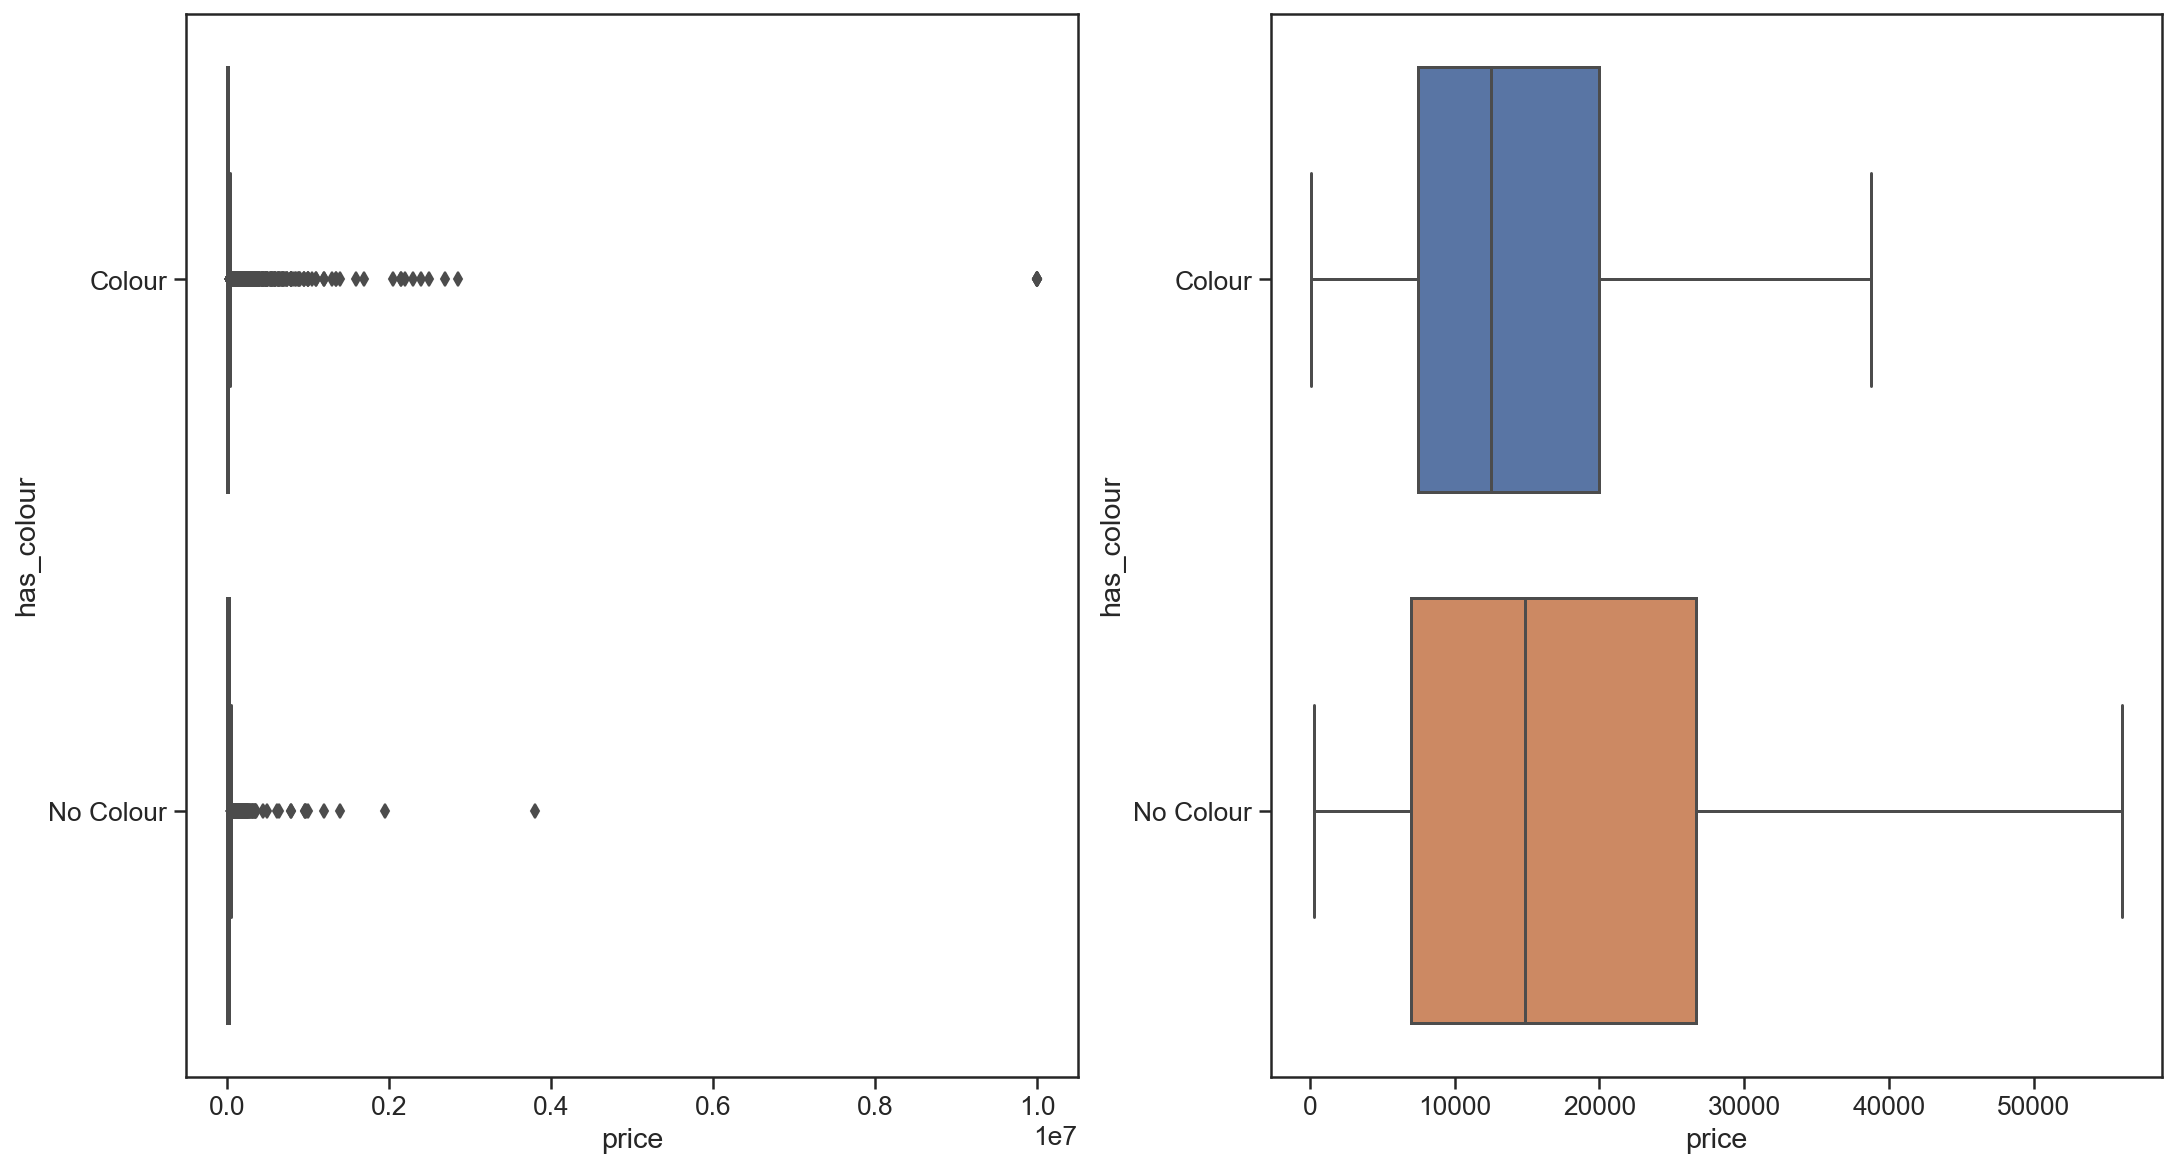

In [75]:
# Creeate figure for subplots
fig, axs = plt.subplots(1,2, figsize=(15,8), constrained_layout=True)

# Create boxplots for has_colour and price
sns.boxplot(x='price', y='has_colour', data=cars_col, ax=axs[0]);
sns.boxplot(x='price', y='has_colour', data=cars_col, ax=axs[1], showfliers=False);

**ANOVA Difference in Means**

Use ANOVA (analysis of variance) to check if there is a statistical difference in the means of the two groups, cars that have a colour and cars that do not have colour specified. Since the ANOVA test assumes normally distributed data, the data has been transformed using log 10 to achieve this.

Null Hypothesis: There is no difference in the means of the groups.  
Alternate Hypothesis: There is a difference in the means of the groups.

Since the P-Value calculated by the one way ANOVA test is smaller than 0.05 (the statistical significance level of 95%), reject the null hypothesis. This means there is evidence to suggest that having no colour defined could have an impact on the price of a car.

In [76]:
# Transform data using the logarithm base 10
cars_col['price_'] = np.log10(cars_col['price'])

In [77]:
# View transformed statistics
cars_col.groupby('has_colour')['price_'].agg(['size','mean','median'])

size    mean  median
has_colour                        
Colour      388242 4.07091 4.09656
No Colour     5136 4.14270 4.17294

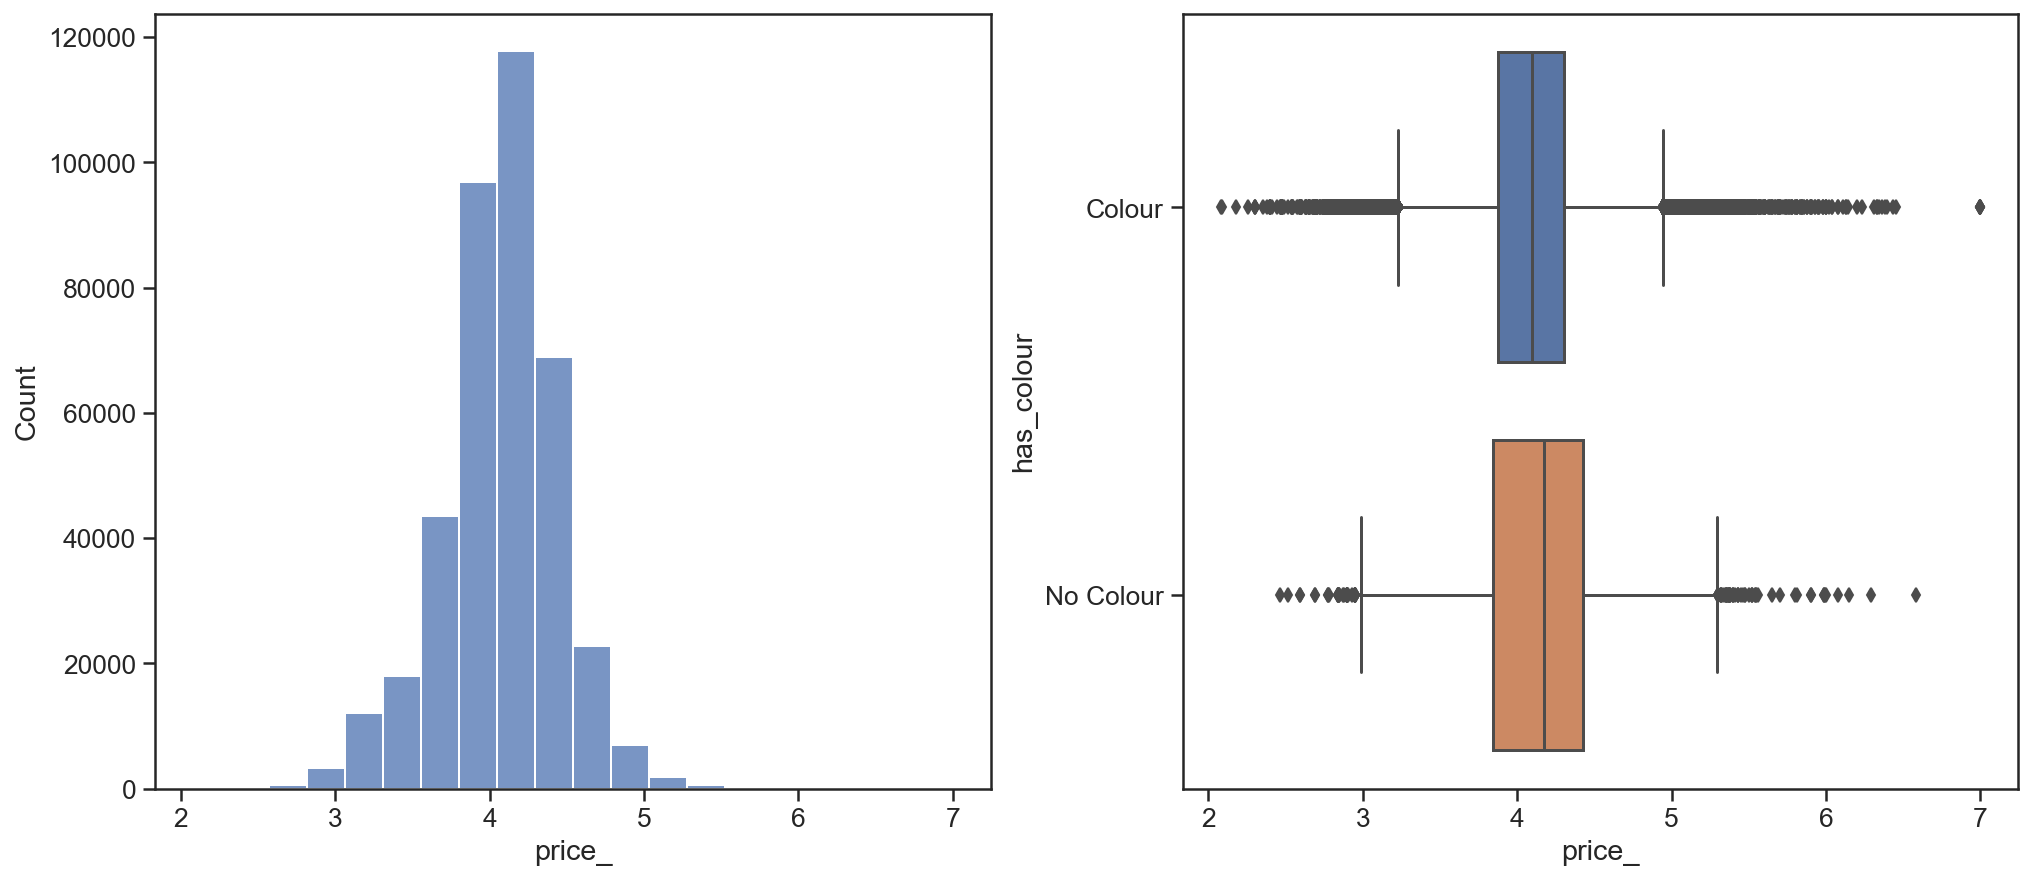

In [78]:
# Create subplots and plot data
fig, axs = plt.subplots(1,2, figsize=(14,6), constrained_layout=True)

# Plot distribution of transformed data
sns.histplot(x='price_', data=cars_col, bins=20, ax=axs[0]);
sns.boxplot(x='price_', y='has_colour', data=cars_col, ax=axs[1]);

In [79]:
# Run oneway ANOVA test on colour data
stats.f_oneway(cars_col[cars_col['has_colour'] == 'Colour']['price_'], cars_col[cars_col['has_colour'] != 'Colour']['price_'])

F_onewayResult(statistic=188.24114591303345, pvalue=7.873008428802948e-43)

In [80]:
# Fill missing values with 'Undefined' and re-evaluate statistics
cars_col.fillna('Undefined').groupby('colour')['price'].agg(['size','mean','median']).sort_values(by='mean', ascending=False)

size        mean      median
colour                                    
Undefined     5136 28049.30179 14891.50000
Indigo           1 27000.00000 27000.00000
Yellow        2053 24897.53629 10750.00000
Grey         66249 19856.93695 14800.00000
Black        84767 18517.86068 13300.00000
Green         4405 18510.71464  9990.00000
Multicolour   1545 17996.16246 13900.00000
Orange        3858 17599.47926 12000.00000
Navy             7 17434.85714 13149.00000
Blue         58451 16717.40495 12441.00000
White        69052 16677.45280 12995.00000
Gold           818 16512.96210 11962.50000
Red          41281 15052.04915 10295.00000
Magenta         15 14010.93333  9495.00000
Bronze        1328 13731.80648 12984.50000
Turquoise      286 13376.39510 11995.00000
Silver       48830 13314.39011  9570.00000
Brown         2007 13262.31689  9999.00000
Burgundy        63 13220.04762 11999.00000
Purple        1205 13129.36515  7995.00000
Maroon         159 12036.28302  5790.00000
Beige         1532 10279.21475  8030.00000
Pink           330  7915.88485  6999.50000

In [81]:
# Keep missing values in colour as 'Undefined'
cars['colour'] = cars['colour'].fillna('Undefined')

In [82]:
# Check missing values input
cars.isnull().sum()

mileage        0
reg          605
colour         0
make           0
model          0
condition      0
year           0
price          0
type           0
car_van        0
fuel           0
year_bins      0
dtype: int64

## Dealing with Outliers

It is important to distinguish whether outliers are outliers due to error, for example earlier we seen outliers in the year column which had year 1000 or prior, which can be corrected or dropped. Alternatively, outliers that have been identified in the boxplots could be true representations of the vehicles they represent. In such cases, it would be incorrect to drop them from our dataset.

The problems with keeping outliers in the dataset can be shown in the graphs below, a linear regression model could be heavily influenced by such outliers and therefore we might look at using different machine learning models to better suit our data. 

### Removing Outliers

The function remove_outliers below is derived from code in this [Link](https://builtin.com/data-science/how-to-find-outliers-with-iqr).

In [83]:
def remove_outliers(df,columns, IQR_mult):
    # Loop through specified columns
    for col in columns:
        print('Working on column: {}'.format(col))
        
        # Get lower quartile, upper quartile and inter-quartile range
        q1, q3 = np.percentile(df[col], [25, 75])
        IQR = q3 - q1
        
        # Set upper and lower bounds
        upper = q3 + (IQR * IQR_mult)
        lower = q1 - (IQR * IQR_mult)
        print('Upper bound: {}, Lower Bound: {}'.format(upper, lower))
        
        #
        df = df[(df[col] < upper) & (df[col] > lower)]
    return df

In [84]:
data = remove_outliers(cars, ['year','mileage','price'], 1.5)

Working on column: year
Upper bound: 2024.0, Lower Bound: 2008.0
Working on column: mileage
Upper bound: 109876.375, Lower Bound: -49572.625
Working on column: price
Upper bound: 39726.5, Lower Bound: -10237.5


In [85]:
# Get proportion of removed data
print('Proportion of removed data: ', len(data)/len(cars))

Proportion of removed data:  0.8412137943657245


In [86]:
def label_outliers(df,columns):
    # Create outlier column and set values to False
    df['outlier'] = False
    
    # Loop through specified columns
    for col in columns:
        print('Working on column: {}'.format(col))
        
        # Set bounds of lower and upper 0.2%
        lower, upper = np.percentile(df[col], [0.5, 99.5])

        print('Upper bound: {}, Lower Bound: {}'.format(upper, lower))
        
        # Print the number of outliers
        print('Number of values labelled: ', len(df.loc[(df[col] > upper) | (df[col] < lower)]))
        
        # Set outlier column to true if outlier
        df.loc[(df[col] > upper) | (df[col] < lower), 'outlier'] = True
        
    return df

In [87]:
# Run function to label outliers and assign to cars dataframe
cars = label_outliers(cars, ['year','mileage', 'price'])

# Get proportion of outliers
cars['outlier'].value_counts(normalize=True)

Working on column: year
Upper bound: 2021.0, Lower Bound: 1999.0
Number of values labelled:  1772
Working on column: mileage
Upper bound: 158000.0, Lower Bound: 0.0
Number of values labelled:  1953
Working on column: price
Upper bound: 122990.0, Lower Bound: 899.0
Number of values labelled:  3923


False   0.98167
True    0.01833
Name: outlier, dtype: float64

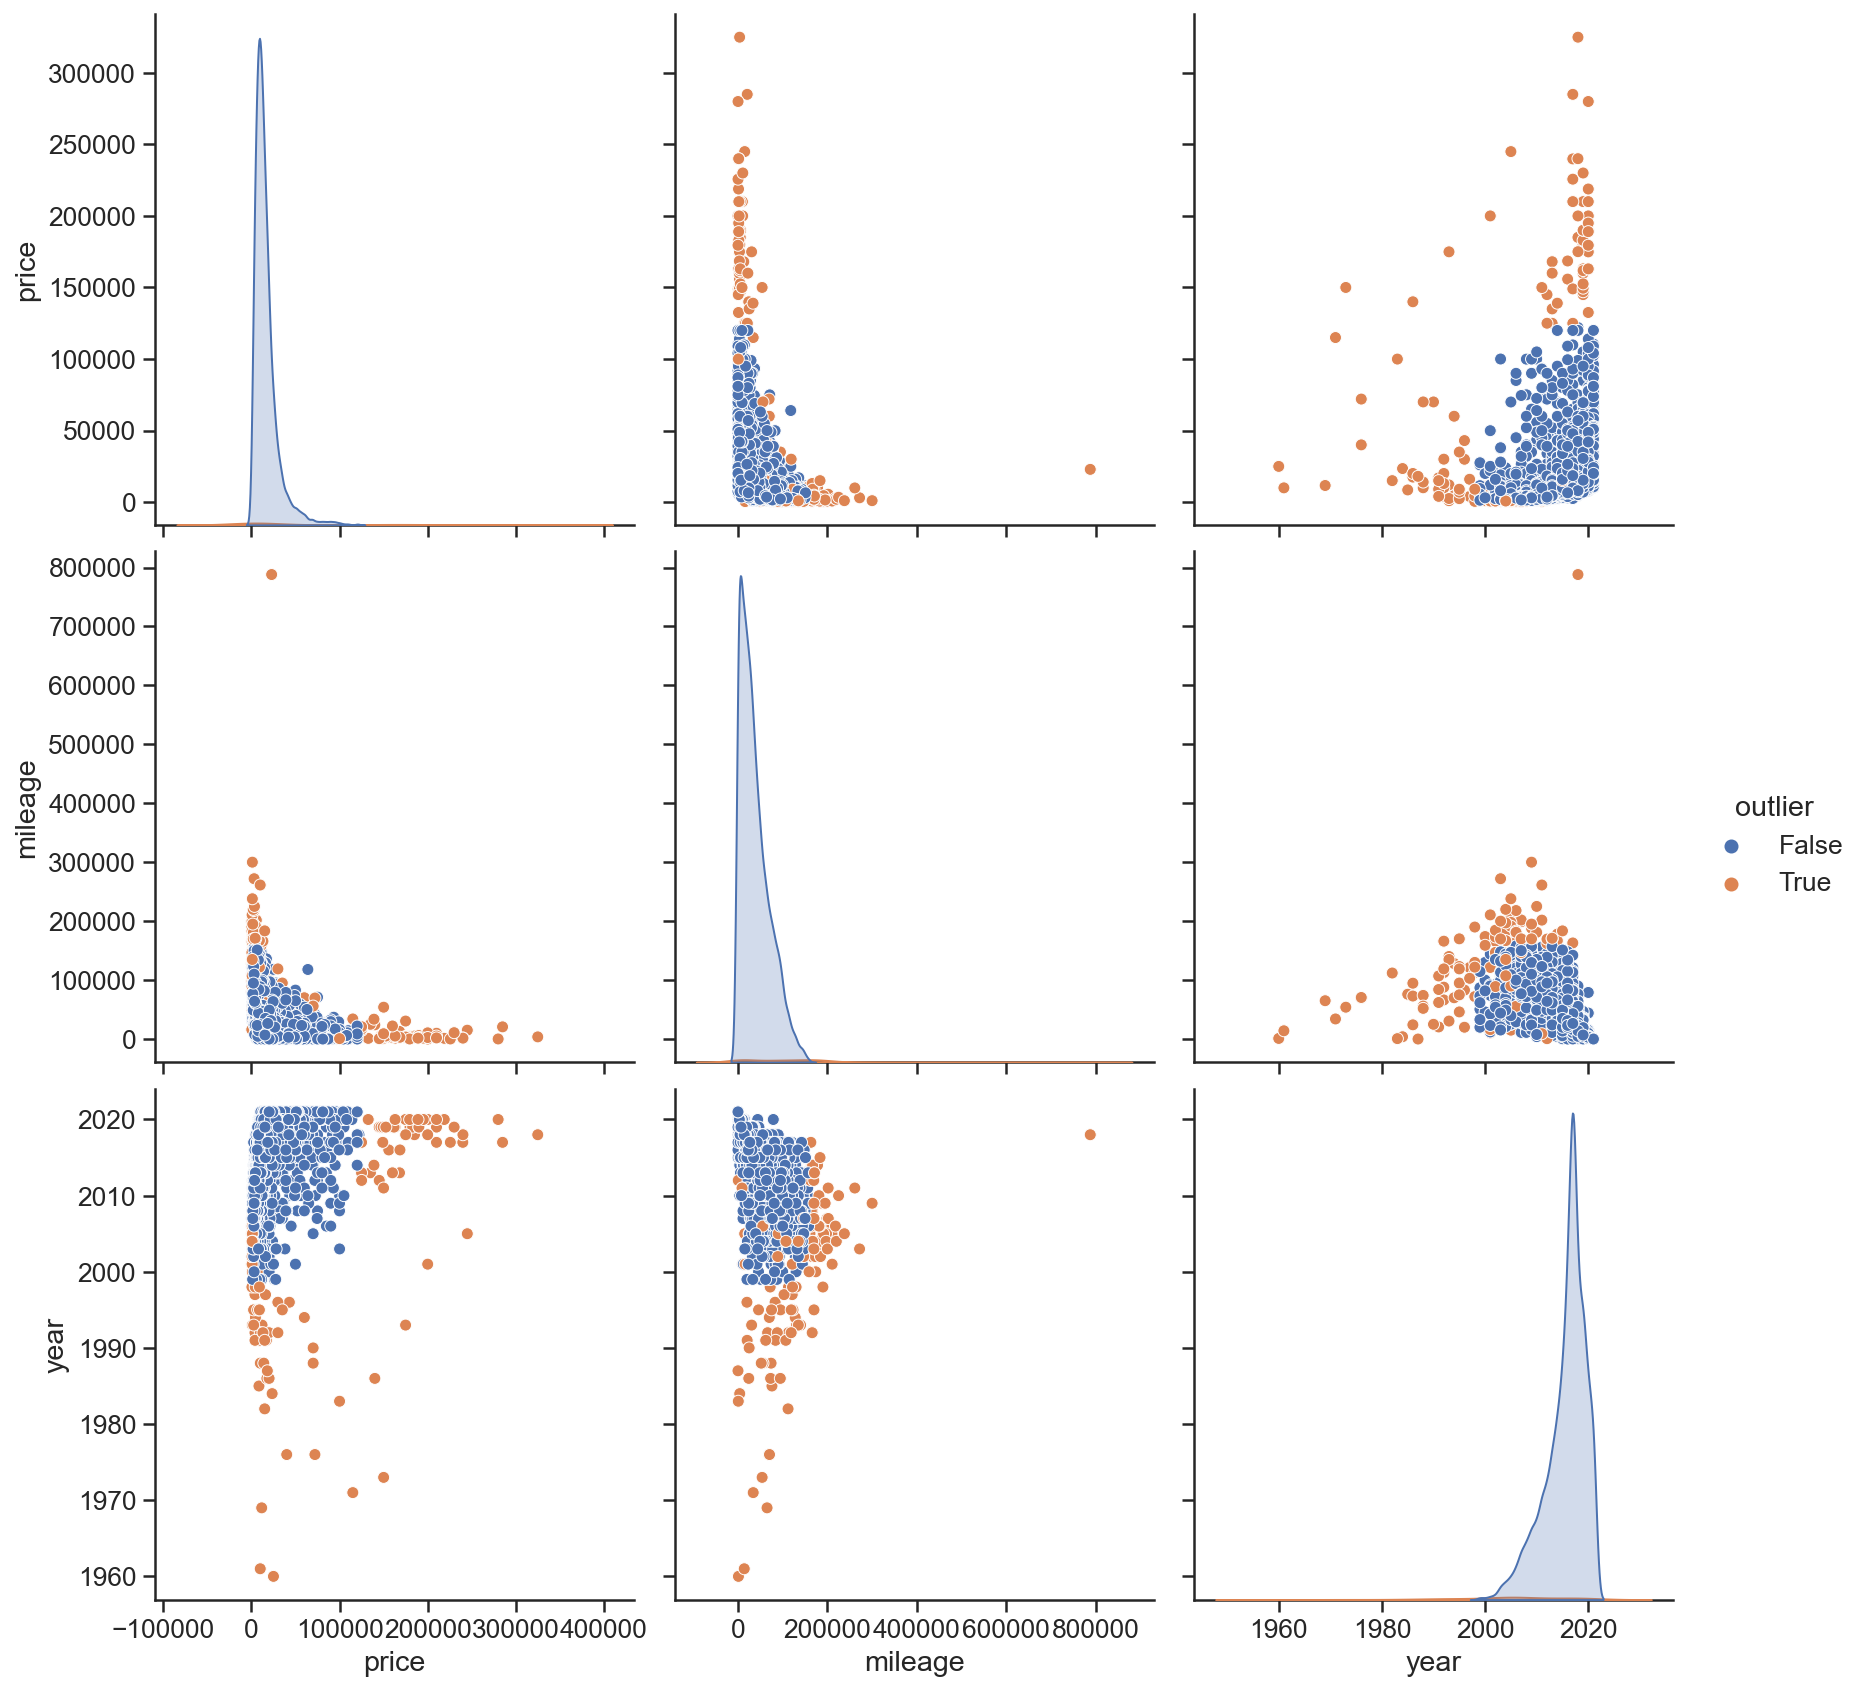

In [88]:
# Visualise numeric data split by outlier
sns.pairplot(data=cars[['price', 'mileage', 'year','outlier']].sample(10000,random_state=0), 
             hue='outlier', height=4);

### Natural Gas Outlier in Fuel Type

Checking Fuel Types for outliers give a single result for natural gas. This does not provide information to the dataset and can be removed.

In [89]:
# Check fuel price statistics per group
cars.groupby('fuel')['price'].agg(['size','mean','median']).sort_values(by='median', ascending=False)

size        mean      median
fuel                                                 
Diesel Hybrid            1329 39601.98345 39500.00000
Diesel Plug-in Hybrid     184 35464.17391 35985.50000
Petrol Plug-in Hybrid    5858 35517.33015 29995.00000
Electric                 4317 32671.74172 27277.00000
Petrol Hybrid           13404 20146.84684 17592.50000
Bi Fuel                   164 14820.73171 13997.00000
Diesel                 157165 16392.13537 13470.00000
Petrol                 210956 16592.79505 10990.00000
Natural Gas                 1  3795.00000  3795.00000

In [90]:
# Drop natural gas observation
cars = cars.drop(cars.loc[cars['fuel'] == 'Natural Gas'].index)

### Feature Engineering

#### Mileage Bins

Splitting the mileage feature into equally spaced bins can aid in visualising relationships in future analysis.

In [91]:
# Split mileage data into 5 equally spaced bins.
mileage_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
cars['mileage_bins'] = pd.qcut(cars['mileage'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=mileage_labels)

In [92]:
# View mean of new mileage groups
cars.groupby('mileage_bins')['price'].mean()

mileage_bins
Very Low    32817.91022
Low         18916.17850
Medium      15248.79759
High        11809.44792
Very High    7073.37509
Name: price, dtype: float64

In [93]:
# Get size, min and max of the bin groupings
cars.groupby('mileage_bins')['mileage'].agg(['size','min','max'])

size         min          max
mileage_bins                                
Very Low      78680     0.00000   8207.00000
Low           78699  8208.00000  21700.00000
Medium        78647 21701.00000  38485.00000
High          79029 38486.00000  66000.00000
Very High     78322 66002.00000 999999.00000

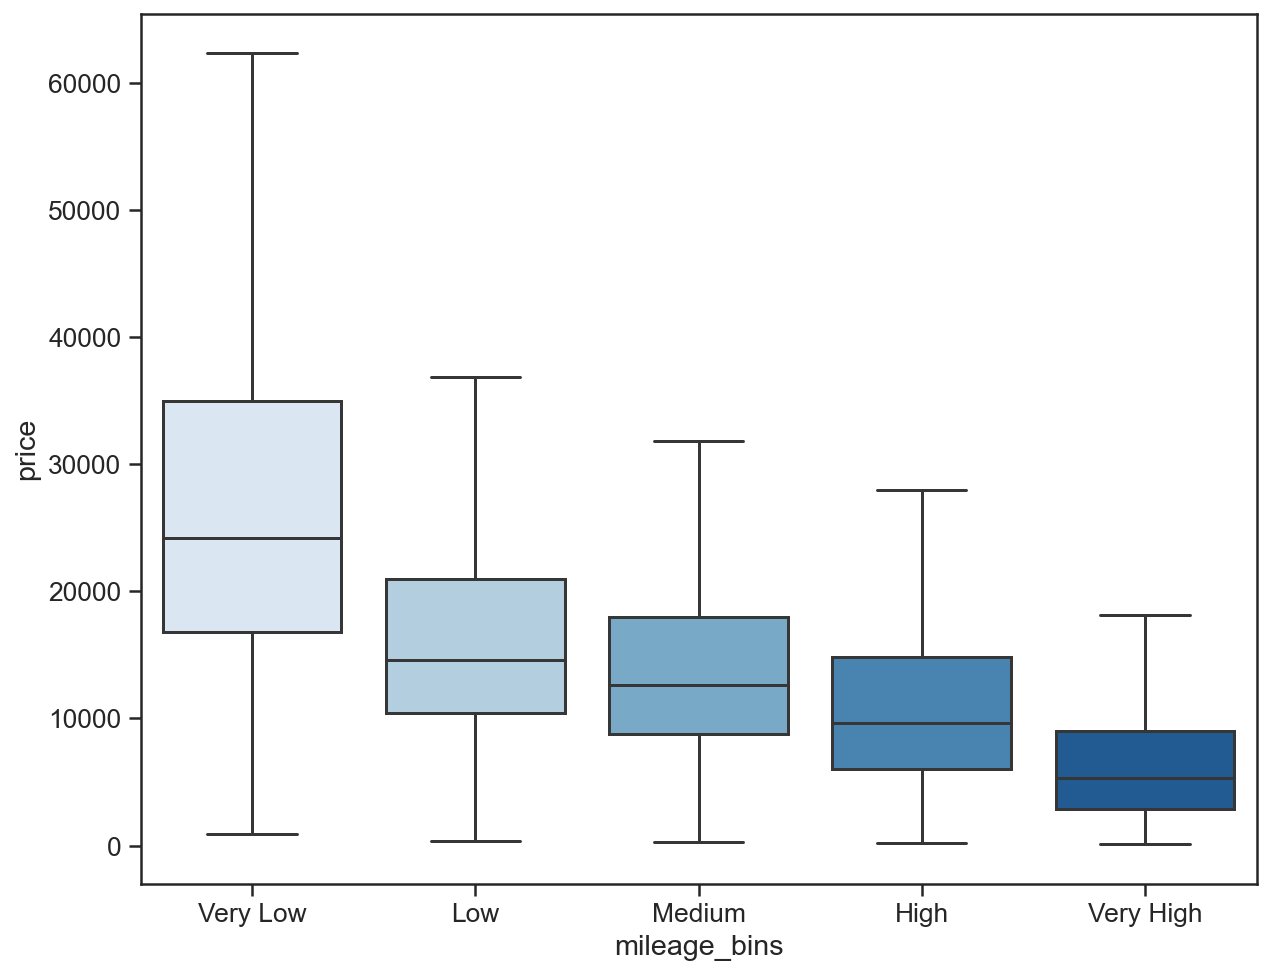

In [94]:
# Visual to represent new feature power
sns.boxplot(x='mileage_bins', y='price', data=cars, palette='Blues', showfliers=False);

#### Price Bins

Similarly, the same can be completeed for price.

In [95]:
# Create price bins
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
cars['price_bins'] = pd.qcut(cars['price'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=price_labels)

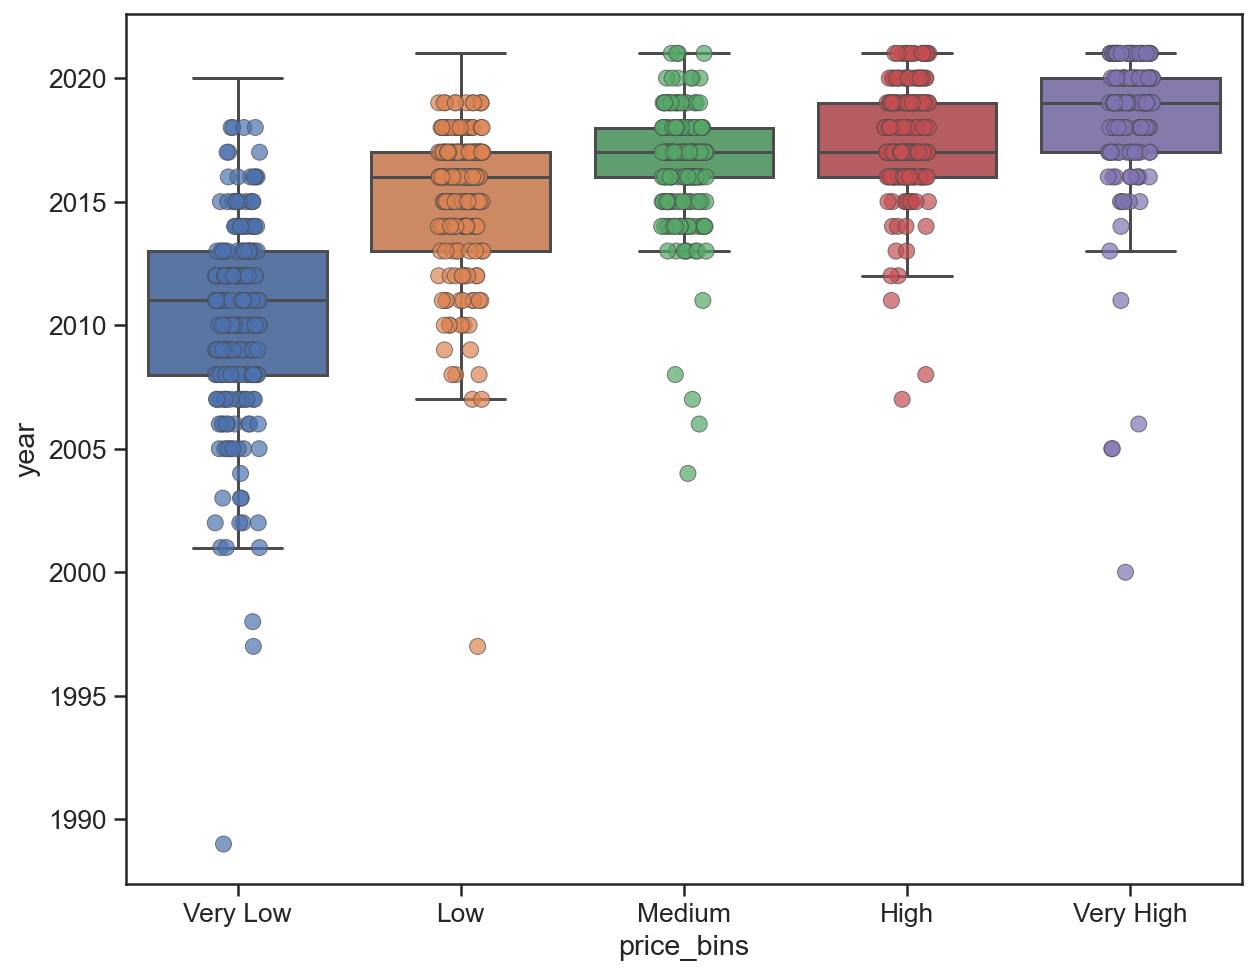

In [96]:
# Plotting power of new feature
sns.boxplot(x='price_bins', y='year', data=cars, showfliers=False);
sns.stripplot(x='price_bins', y='year', data=cars.sample(1000, random_state=0),  linewidth=0.5, jitter=0.1, size=8, alpha=0.7);

#### Age

Year has a negatively skewed distribution and can therefore not be log transformed, which carries more power than its counterart of square root transformation. To combat this we can change year into Age and analyse results later in the notebook.

In [97]:
# Convert year to age
cars['age'] = 2022 - cars['year']

In [98]:
# Get summary of age
cars['age'].describe()

count   393377.00000
mean         6.58506
std          4.44885
min          1.00000
25%          4.00000
50%          5.00000
75%          8.00000
max         89.00000
Name: age, dtype: float64

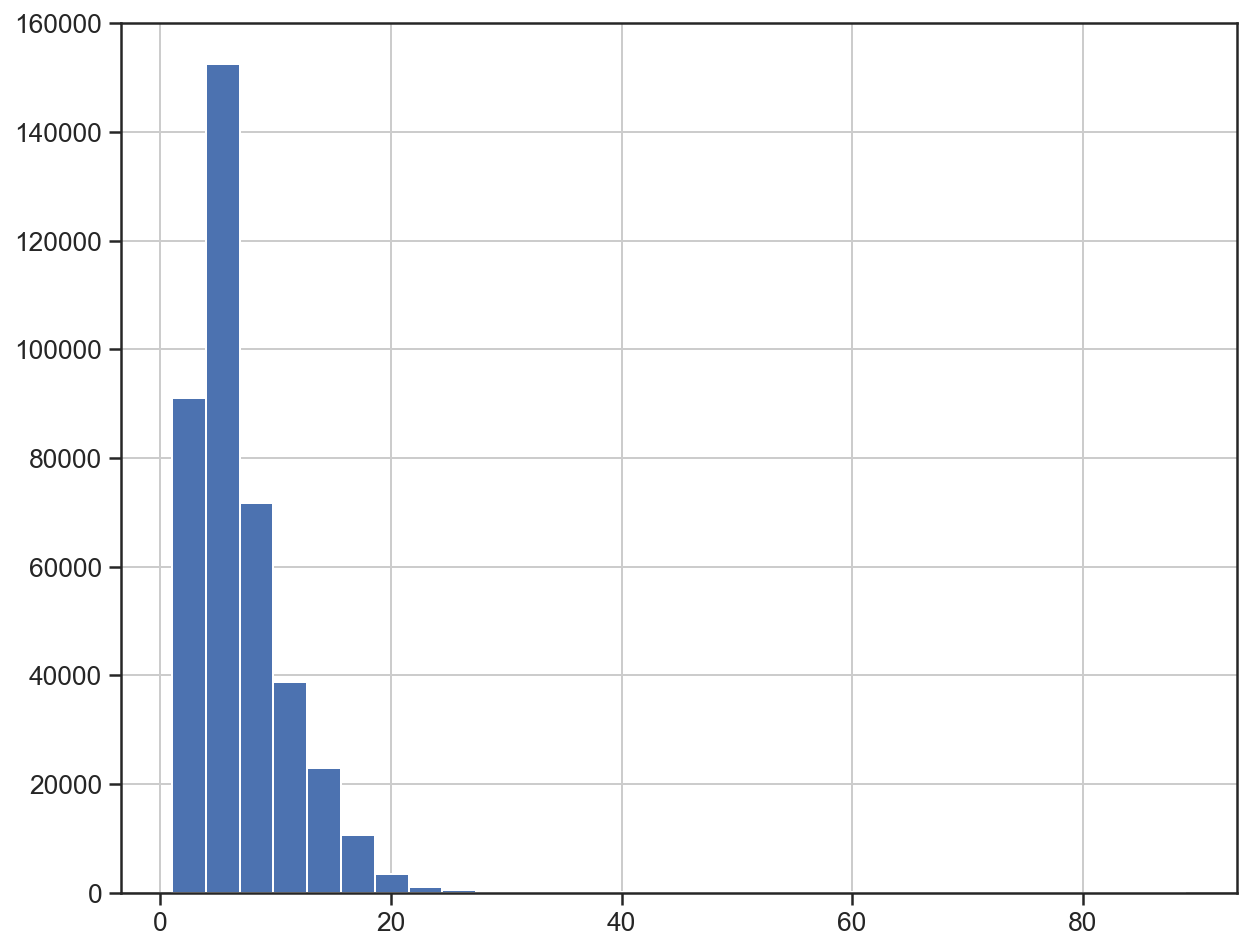

In [99]:
# Plot new distribution of feature
cars['age'].hist(bins=30);

#### Condition to Numeric
To include in correlation tables we can convert the binary feature to True or False.

In [100]:
# Create 'new' column to consist of True and False (1 and 0)
cars['new'] = cars['condition'] == 'NEW'

# Get counts of new and used
cars['new'].value_counts()

False    368890
True      24487
Name: new, dtype: int64

#### Year Bins
Recommit year bins to account for any changes in the data.

In [101]:
# Create categoric variable from year
year_labels = ['Very Old', 'Old', 'Neutral Age', 'New', 'Very New']
cars['year_bins'] = pd.qcut(cars['year'], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=year_labels)

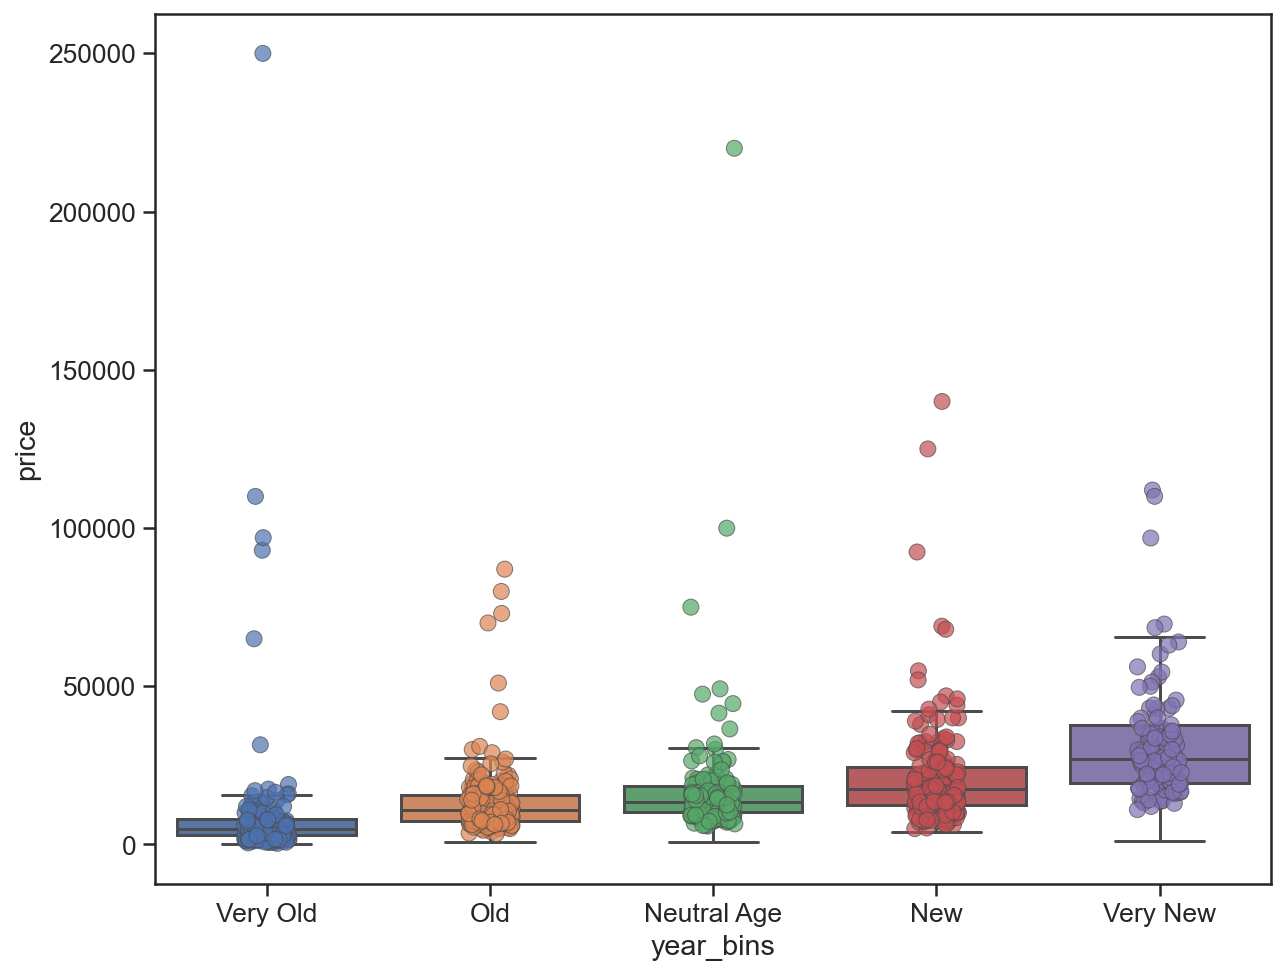

In [102]:
# Plot new feature bins
sns.boxplot(x='year_bins', y='price', data=cars, showfliers=False);
sns.stripplot(x='year_bins', y='price', data=cars.sample(1000, random_state=0),  linewidth=0.5, jitter=0.1, size=8, alpha=0.7);

#### Colour Distribution

Below are graphs to show how different colours are affected by age and mileage.

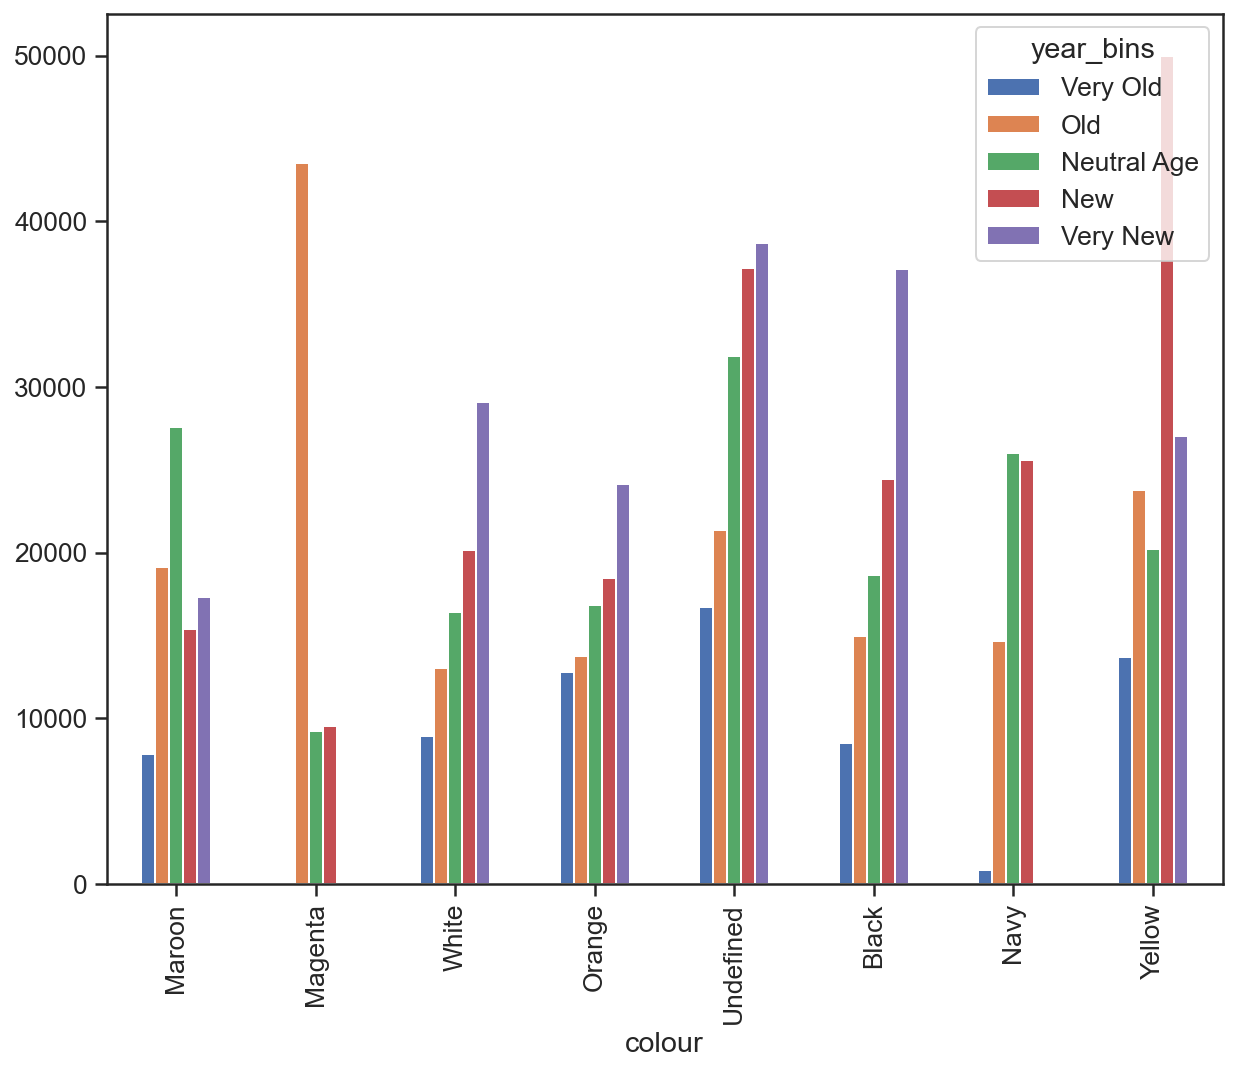

In [103]:
# A view of how price of different colours change as vehicles age.
cars.groupby(['year_bins','colour'])['price'].mean().unstack('year_bins').sample(8, random_state=0).plot(kind='bar');

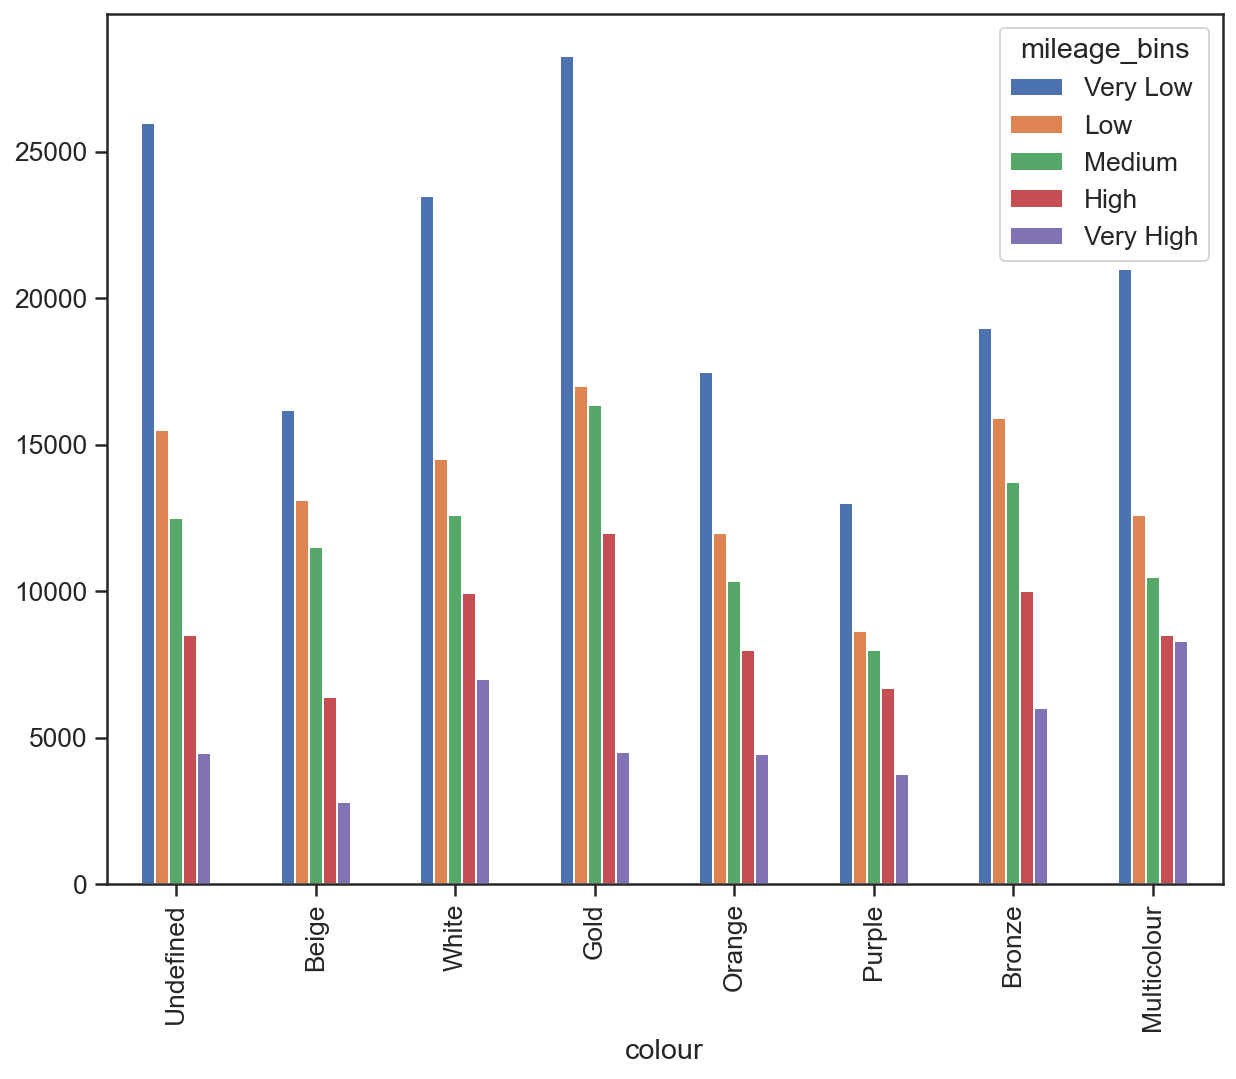

In [104]:
# A view of how different coloured vehicles affect price at different mileage categories
cars.groupby(['mileage_bins', 'colour'])['price'].median().unstack('mileage_bins').sample(8, random_state=2).plot(kind='bar');

#### Log Transformations

Log transformations can be powerful tools to transform positively skewed data to be more normally distributed. This shrinks large values more than smaller ones and can help with a variety of statistical tests and improve correlation between features.

In [105]:
# Log transformation of age.
cars['age_'] = np.log10(cars['age'])

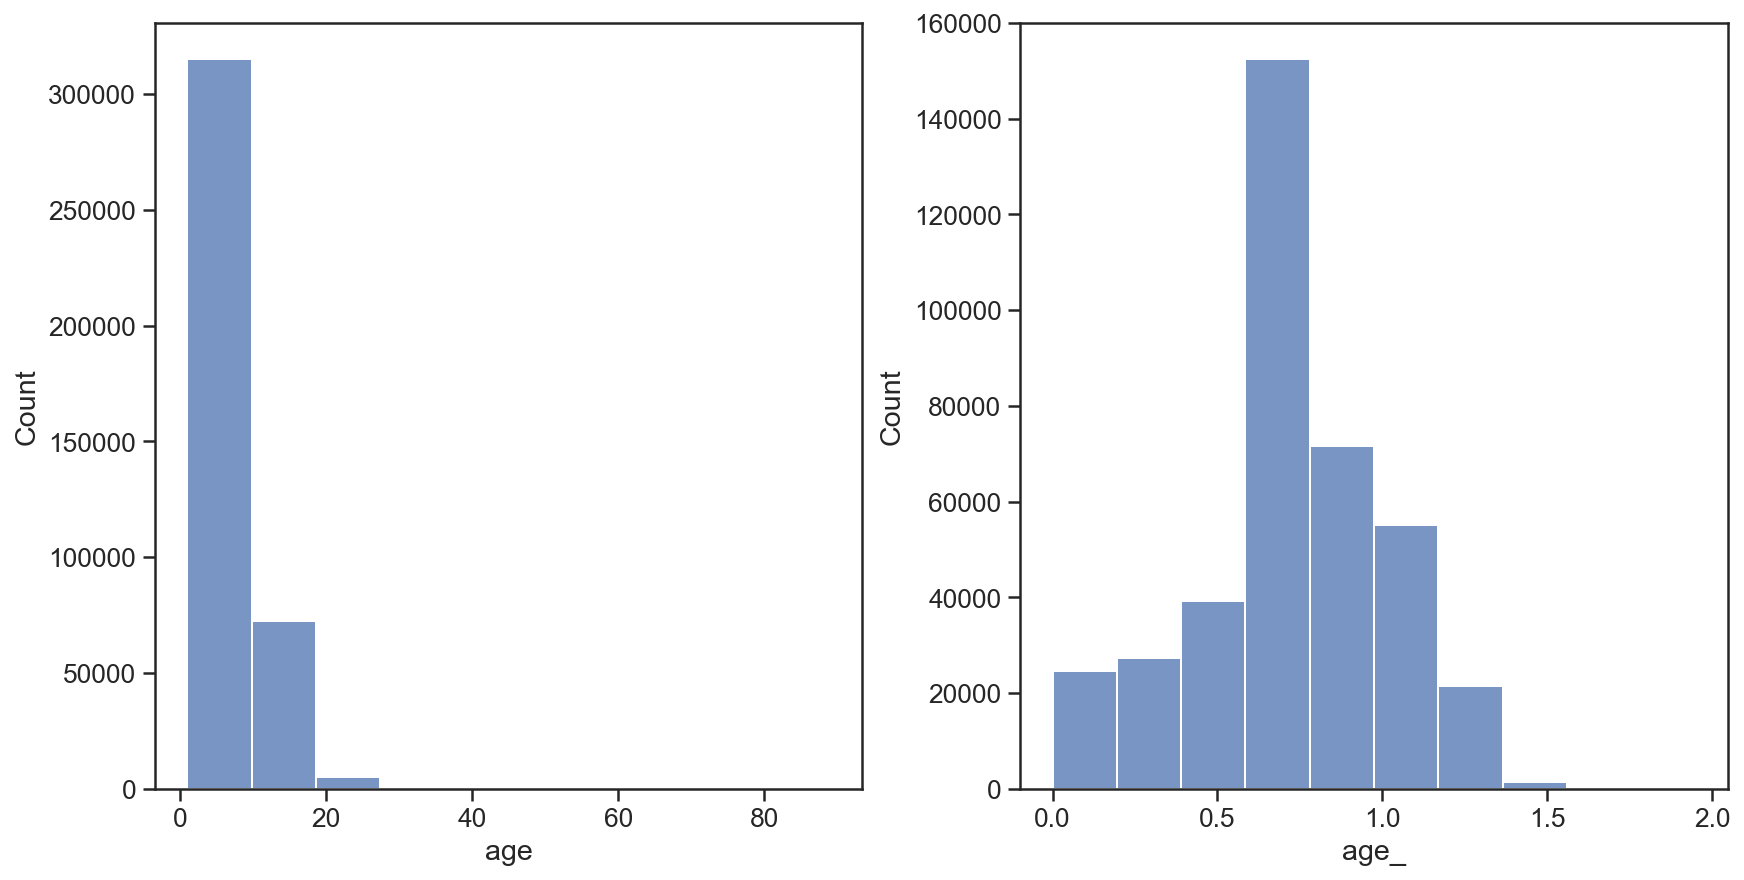

In [106]:
# Create figure for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Visualise new distribution of age
sns.histplot(x='age', data=cars, bins=10, ax=axs[0]);
sns.histplot(x='age_', data=cars, bins=10, ax=axs[1]);

In [107]:
# Transform price using log base 10
cars['price_'] = np.log10(cars['price'])

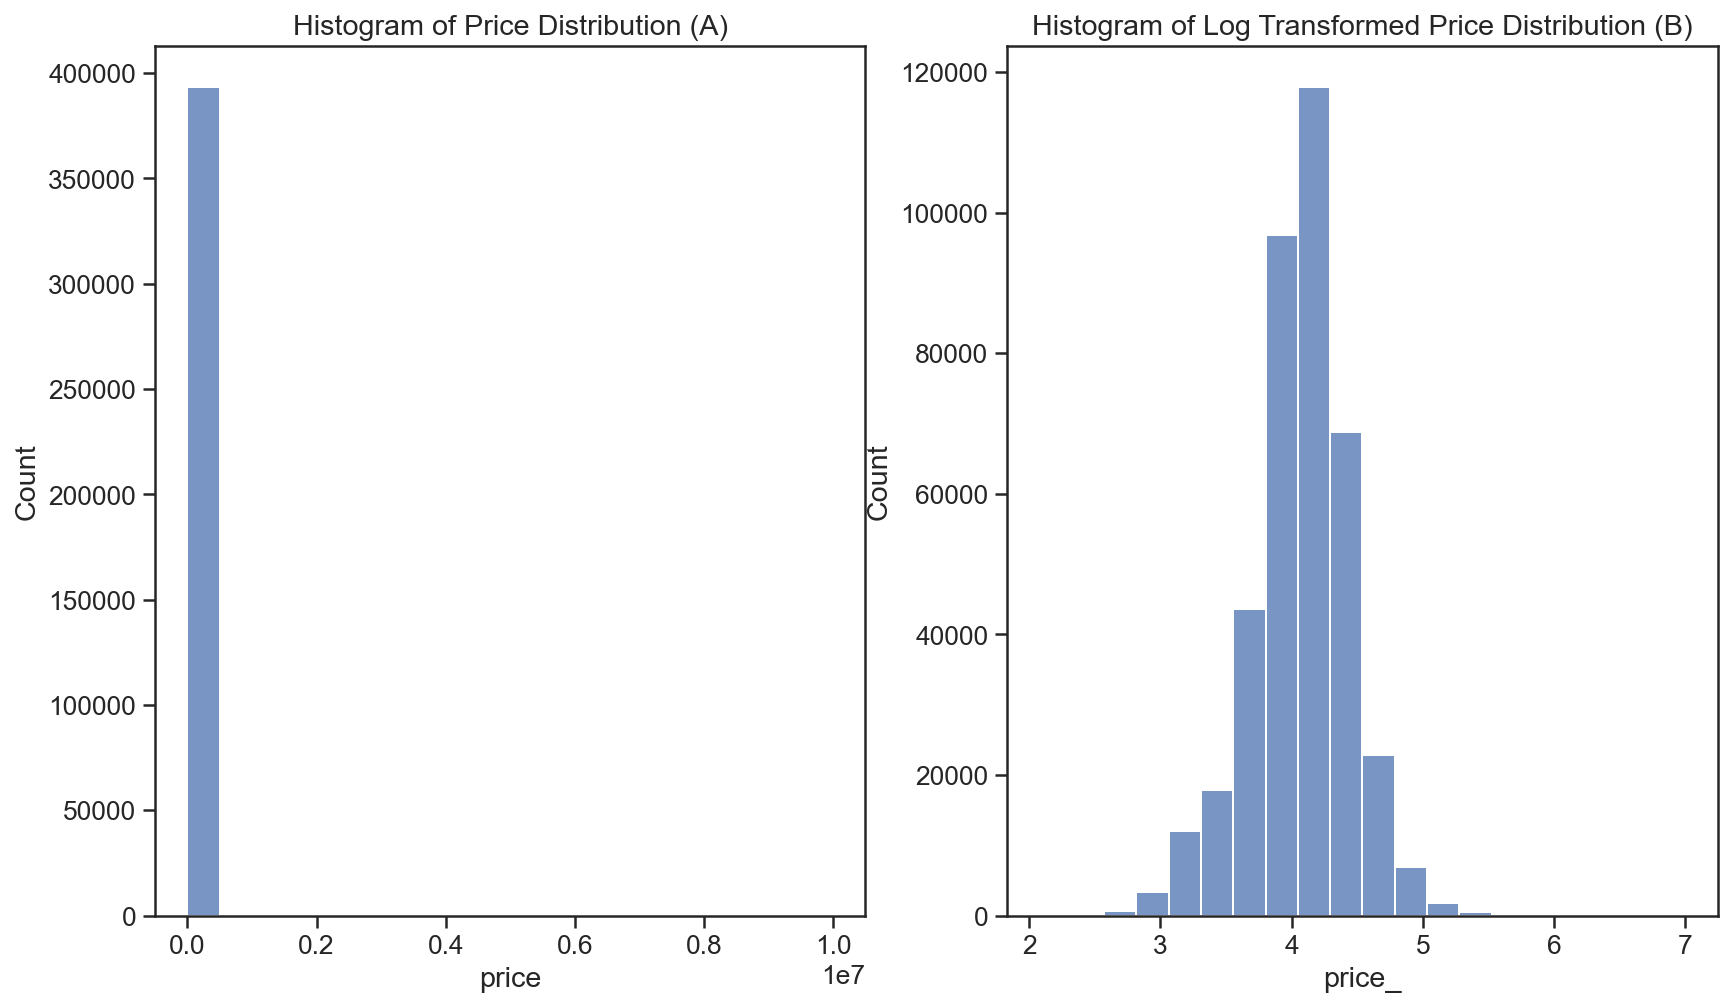

In [108]:
# Configure subplots
fig, axs = plt.subplots(1,2, figsize=(14, 8))

# Create histogram of price distribution
sns.histplot(x='price', data=cars, bins=20, ax=axs[0]);
axs[0].set_title('Histogram of Price Distribution (A)');

# Create histogram of transformed price distribution
sns.histplot(x='price_', data=cars, bins=20, ax=axs[1]);
axs[1].set_title('Histogram of Log Transformed Price Distribution (B)');

#### Square Root Transformation

Similar to log transformations, square root transformations can help negatively skewed features take a more normal distribution by shrinking larger values.

In [109]:
# Transform mileage using square root
cars['mileage_'] = np.sqrt(cars['mileage'])

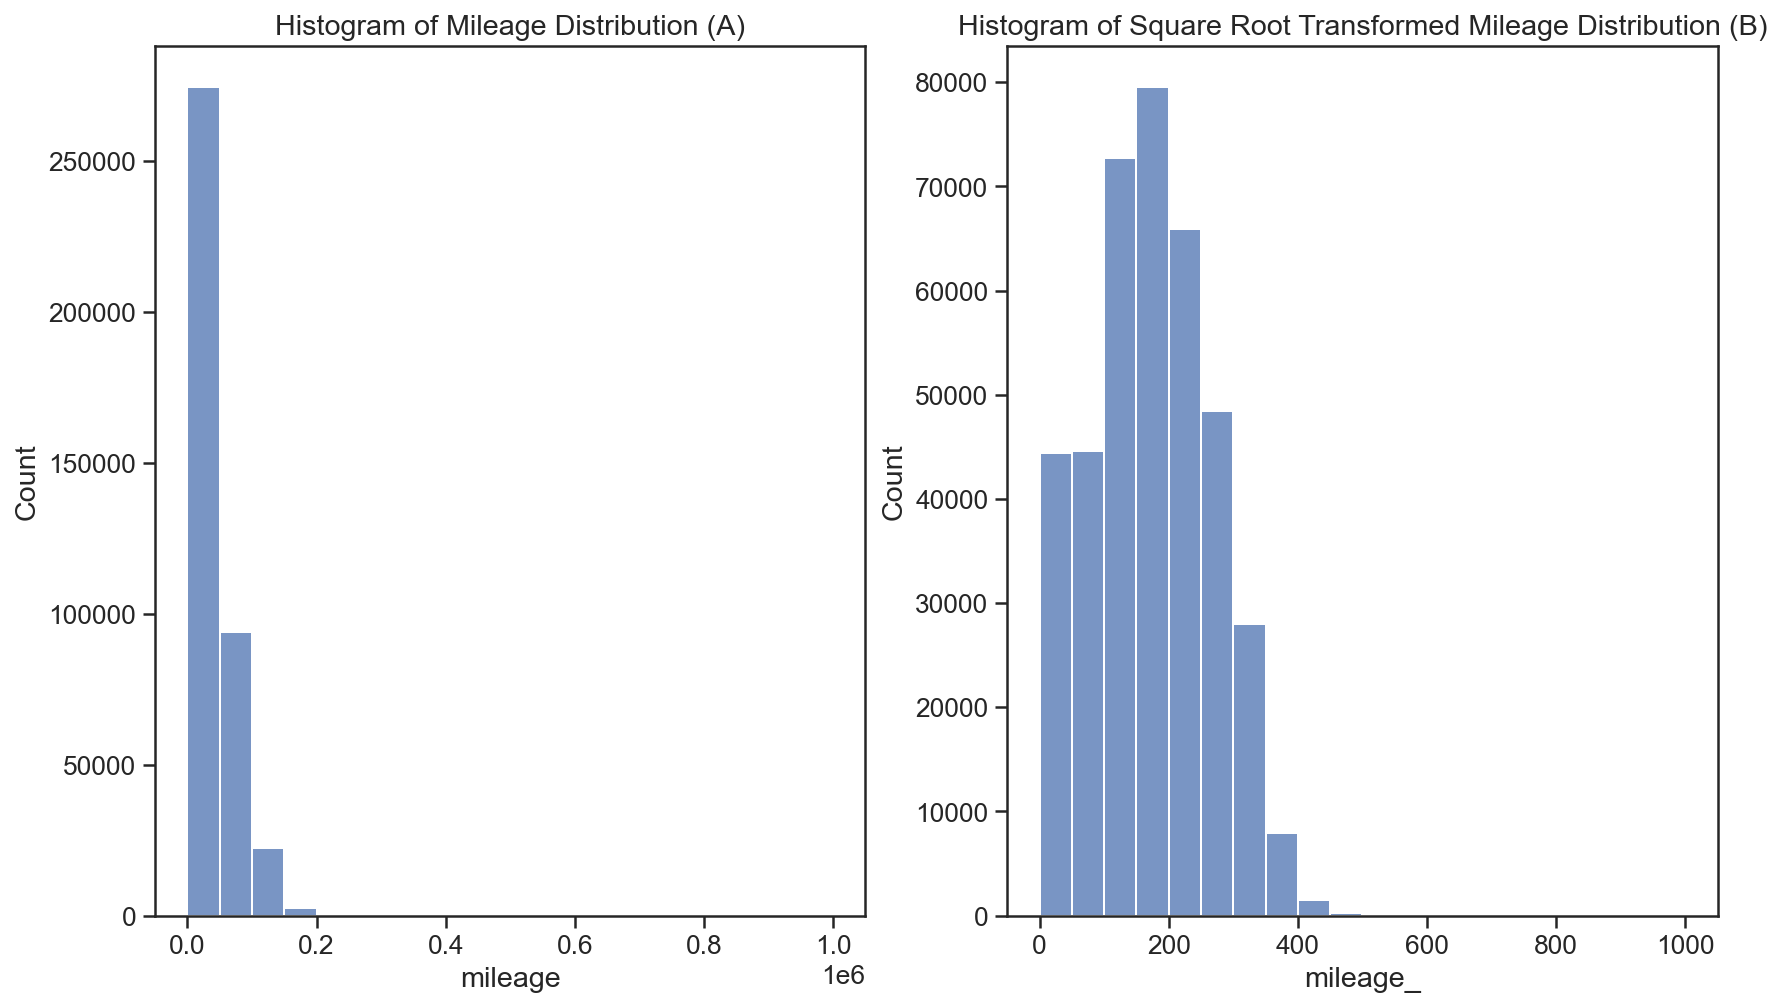

In [110]:
# Configure subplots
fig, axs = plt.subplots(1,2, figsize=(14, 8))

# Create histogram of mileage distribution
sns.histplot(x='mileage', data=cars, bins=20, ax=axs[0]);
axs[0].set_title('Histogram of Mileage Distribution (A)');

# Create histogram of transformed mileage distribution
sns.histplot(x='mileage_', data=cars, bins=20, ax=axs[1]);
axs[1].set_title('Histogram of Square Root Transformed Mileage Distribution (B)');

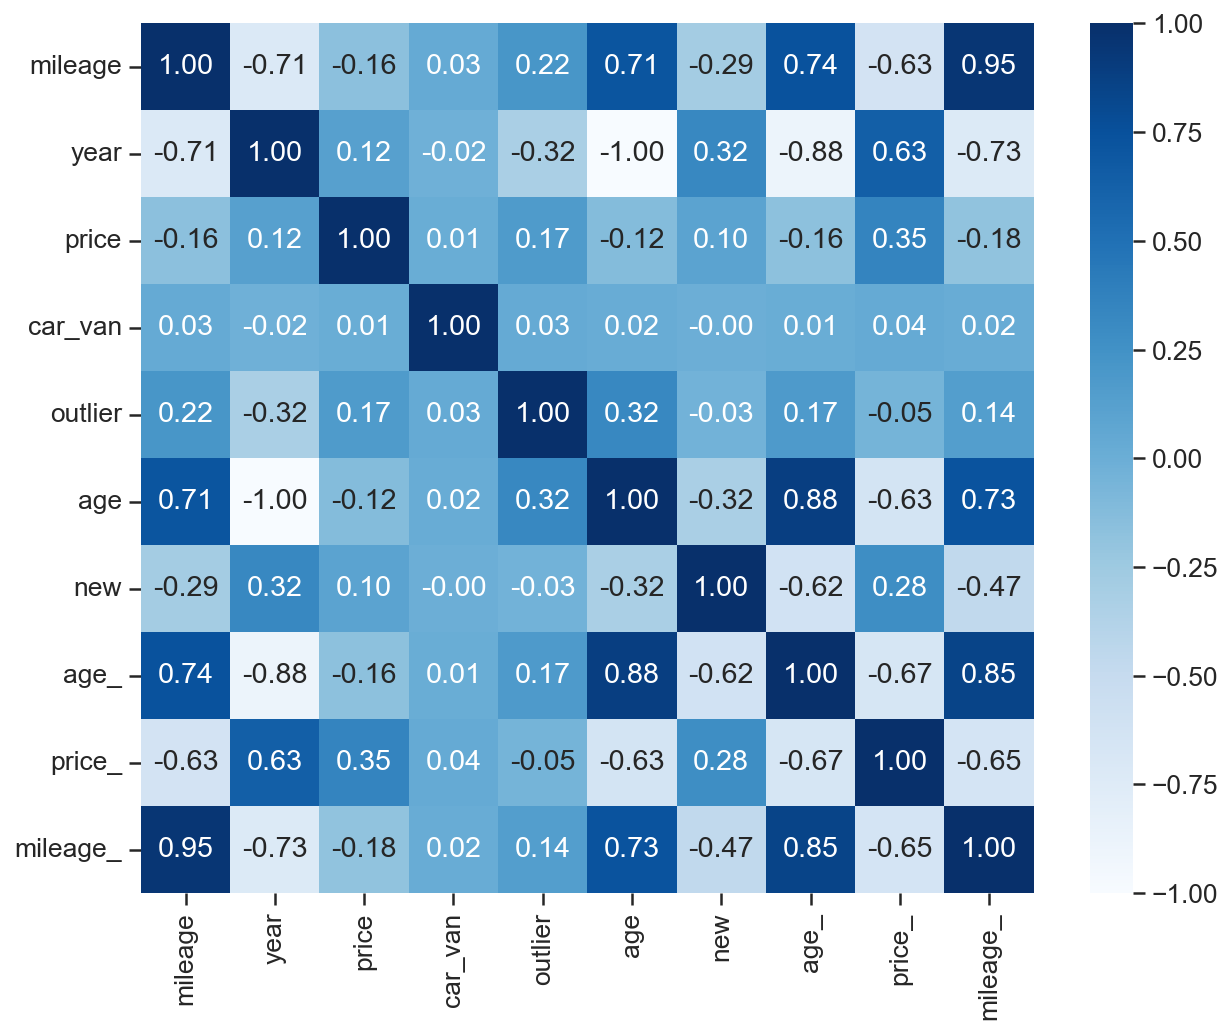

In [111]:
# Create annotated correlation heatmap
sns.heatmap(cars.corr(), annot=True, cmap="Blues", fmt='.2f');

In [112]:
# Look at correlation for price and newly log transformed price.
print(np.abs(cars.corr()['price']).sort_values(ascending=False))
print('')
print(np.abs(cars.corr()['price_']).sort_values(ascending=False))

price      1.00000
price_     0.35213
mileage_   0.18353
outlier    0.16964
age_       0.16488
mileage    0.15856
year       0.12362
age        0.12362
new        0.09577
car_van    0.01067
Name: price, dtype: float64

price_     1.00000
age_       0.66654
mileage_   0.64695
age        0.63463
year       0.63463
mileage    0.63009
price      0.35213
new        0.28007
outlier    0.05410
car_van    0.03832
Name: price_, dtype: float64


### New and Used Vehicles
Is correlation improved by subsetting new and used vehicles?

In [113]:
# Create subset of new vehicles
new = cars.loc[cars['condition'] == 'NEW']

# Create subset of used vehicles
used = cars.loc[cars['condition'] == 'USED']

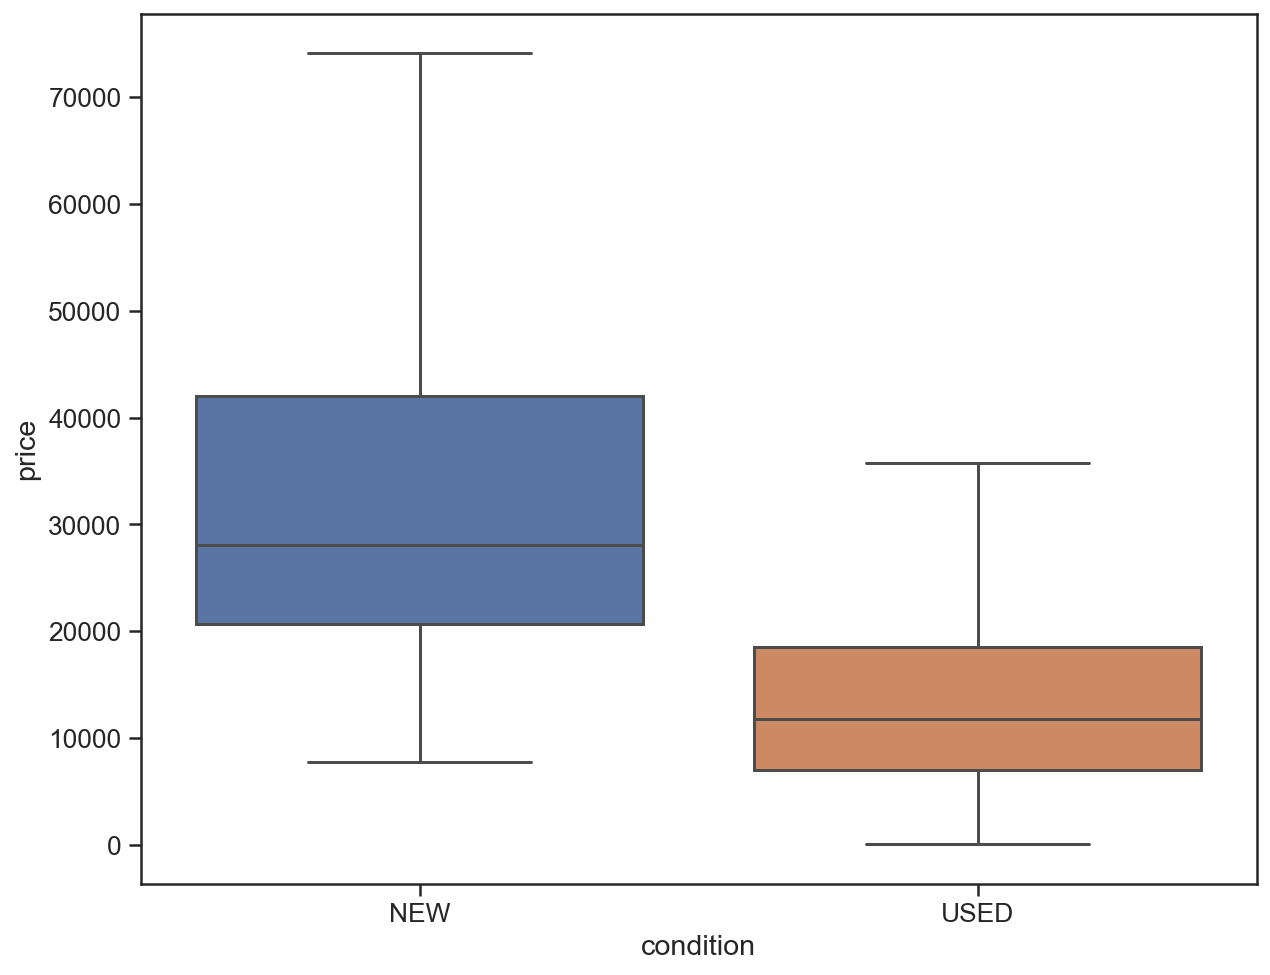

In [114]:
# Box-plot differnce between "new" and "used" vehicles
sns.boxplot(x='condition', y='price', data=cars, showfliers=False);

### Reducing Cardinality in Makes

Cardinality becomes a larger problem when modelling data in machine learning, however it can also be useful in analysis as variables with only few observations might not carry enough information for us to analyse.

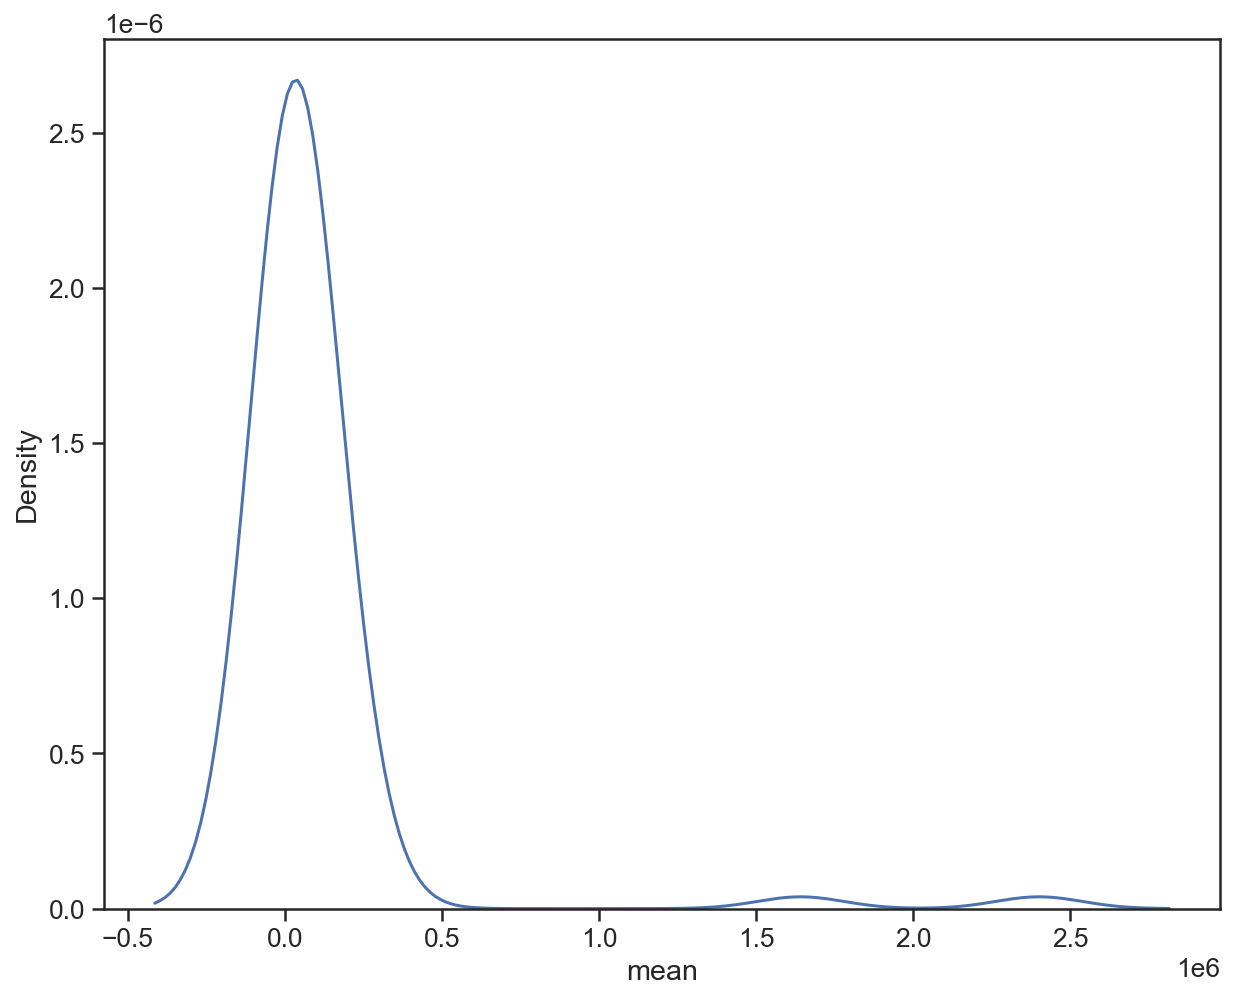

In [115]:
# View distribution of the grouped mean price of makes.
makes = cars.groupby('make')['price'].agg(['size','mean','median'])
sns.kdeplot(x='mean', data=makes.loc[makes['size'] < 1000]);

In [116]:
# Check groups with less than 5000 observations
makes.loc[makes['size'] < 5000]

size         mean      median
make                                     
AC             3 106466.66667 94950.00000
AK             1  44995.00000 44995.00000
Abarth      1004  14488.33267 13462.50000
Aixam          2   4147.50000  4147.50000
Alfa Romeo  1553  19681.91951 11495.00000
...          ...          ...         ...
Triumph       26  16156.80769 12486.50000
Ultima         1  44995.00000 44995.00000
Westfield      6  12189.16667 11122.50000
Wolseley       1   9000.00000  9000.00000
Zenos          2  27997.00000 27997.00000

[89 rows x 3 columns]

#### Creating groups for makes with less than 5000 observations.
Setting a goal of reducing unique values in make to approximately 25, create new groups for makes that have less than 5000 observations based on the group mean. More analysis to follow. 

In [117]:
# View group ranges of bins
pd.qcut(makes.loc[makes['size'] < 5000]['mean'], q=[0, 0.2, 0.4, 0.6, 0.8, 1])

make
AC                 (53562.228, 2400000.0]
AK                  (30370.76, 53562.228]
Abarth                (8798.0, 16635.469]
Aixam         (772.6990000000001, 8798.0]
Alfa Romeo          (16635.469, 30370.76]
                         ...             
Triumph               (8798.0, 16635.469]
Ultima              (30370.76, 53562.228]
Westfield             (8798.0, 16635.469]
Wolseley              (8798.0, 16635.469]
Zenos               (16635.469, 30370.76]
Name: mean, Length: 89, dtype: category
Categories (5, interval[float64, right]): [(772.6990000000001, 8798.0] < (8798.0, 16635.469] < (16635.469, 30370.76] < (30370.76, 53562.228] < (53562.228, 2400000.0]]

In [118]:
# Transform makes with less than 5000 observations to groups
makes_transform = pd.qcut(makes.loc[makes['size'] < 5000]['mean'], 
                          q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=['Very Low Range', 'Low Range', 'Mid Range', 'High End', 'Very High End'])
makes_transform

make
AC             Very High End
AK                  High End
Abarth             Low Range
Aixam         Very Low Range
Alfa Romeo         Mid Range
                   ...      
Triumph            Low Range
Ultima              High End
Westfield          Low Range
Wolseley           Low Range
Zenos              Mid Range
Name: mean, Length: 89, dtype: category
Categories (5, object): ['Very Low Range' < 'Low Range' < 'Mid Range' < 'High End' < 'Very High End']

In [119]:
# Transform new column to new groups
cars['make_new'] = cars['make'].map(makes_transform.astype('str'))

# Copy make to the new column for makes > 5000 observations
cars['make_new'] = cars['make_new'].fillna(cars['make'])

In [120]:
# View summary of newly defined feature
cars['make_new'].describe()

count     393377
unique        26
top          BMW
freq       37228
Name: make_new, dtype: object

In [121]:
# Check group means again
cars.groupby('make_new')['price'].agg(['size','mean','median']).sort_values(by='median', ascending=False)

size        mean      median
make_new                                     
Very High End    8293 96878.05836 59950.00000
High End          731 46643.60876 46995.00000
Land Rover      14595 35312.22275 29970.00000
Jaguar           7393 26031.53997 21950.00000
Volvo           11067 24138.40643 20000.00000
Mid Range        7254 20905.62696 18762.50000
Mercedes-Benz   31591 21415.24903 18138.00000
BMW             37228 19825.16751 16600.00000
Audi            34752 20193.59361 16450.00000
Volkswagen      33606 13853.26968 12499.00000
SEAT             9251 12616.10756 11999.00000
SKODA           11902 13428.01647 11990.00000
Mazda            6791 12956.51362 11980.00000
Kia             12195 12514.51857 11700.00000
MINI            11321 12308.48238 11495.00000
Low Range       15965 12524.27961 10990.00000
Nissan          19688 11326.38668 10495.00000
Hyundai         11128 11595.49676 10299.00000
Honda            9381 11002.24027  9999.00000
Toyota          17541 11344.51314  9618.00000
Renault         12043 10022.93158  9195.00000
Peugeot         15026  9859.08645  8000.00000
Vauxhall        33084  8032.80758  7500.00000
Citroen         10309  8177.14803  7450.00000
Fiat             8535  7829.40187  6975.00000
Very Low Range   2707  5518.33986  4295.00000

### Reducing Cardinality in Colour

To reduce cardinality in colour, notice that 94% of data is contained by the first 6 colours, set the remainder to 'Other'

In [122]:
# Proportion of data made up by first six colours
print(cars['colour'].value_counts(normalize=True)[0:6])
print('Total proportion: {}'.format(cars['colour'].value_counts(normalize=True)[0:6].sum()))

Black    0.21549
White    0.17553
Grey     0.16841
Blue     0.14859
Silver   0.12413
Red      0.10494
Name: colour, dtype: float64
Total proportion: 0.9370883401927413


In [123]:
# Get colour grouped by frequency
colour = cars.groupby('colour')['price'].size().sort_values(ascending=False)
colours = colour.index[0:6]

# Set remaining colours to 'Other'
cars.loc[~cars['colour'].isin(colours), 'colour'] = 'Other'

# Out put new means of groups
cars.groupby('colour')['price'].mean()

colour
Black    18517.86068
Blue     16717.40495
Grey     19856.93695
Other    19067.87219
Red      15052.04915
Silver   13314.39011
White    16677.63937
Name: price, dtype: float64

#### ANOVA
Check for differences in the means of the groups by using the analysis of variance test.

In [124]:
# Check mean and variance of groups
cars.groupby('colour')['price_'].agg(['mean','var'])

mean     var
colour                
Black  4.10698 0.13846
Blue   4.05586 0.15113
Grey   4.15318 0.12477
Other  4.04466 0.17450
Red    4.00686 0.12290
Silver 3.93100 0.17612
White  4.11240 0.08646

In [125]:
# Create empty list
colours_data = []

# Loop through unique colour variables and append individual dataframes containing price_ dataframe
for i in cars['colour'].unique():
     colours_data.append(cars.loc[cars['colour'] == i][['price_']])
        
f_value, p_value = stats.f_oneway(colours_data[0], colours_data[1], colours_data[2], 
                                  colours_data[3], colours_data[4], colours_data[5], 
                                  colours_data[6])

print('F-value: {}, P-Value: {:2f}'.format(f_value[0], p_value[0]))

F-value: 2275.655216257559, P-Value: 0.000000


#### Pairwise Tukey Test
Similar to ANOVA, compare individual groups with each pair to establish group differences. See that all have significant difference except the Black-White pair.

In [126]:
# Import Tukey Algorithm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(endog=cars['price_'], groups=cars['colour'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Black   Blue  -0.0511  0.001 -0.0569 -0.0453   True
 Black   Grey   0.0462  0.001  0.0406  0.0518   True
 Black  Other  -0.0623  0.001 -0.0701 -0.0545   True
 Black    Red  -0.1001  0.001 -0.1066 -0.0936   True
 Black Silver   -0.176  0.001 -0.1821 -0.1698   True
 Black  White   0.0054 0.0593 -0.0001   0.011  False
  Blue   Grey   0.0973  0.001  0.0912  0.1034   True
  Blue  Other  -0.0112 0.0011 -0.0194  -0.003   True
  Blue    Red   -0.049  0.001 -0.0559 -0.0421   True
  Blue Silver  -0.1249  0.001 -0.1315 -0.1182   True
  Blue  White   0.0565  0.001  0.0505  0.0626   True
  Grey  Other  -0.1085  0.001 -0.1166 -0.1005   True
  Grey    Red  -0.1463  0.001 -0.1531 -0.1395   True
  Grey Silver  -0.2222  0.001 -0.2286 -0.2157   True
  Grey  White  -0.0408  0.001 -0.0466 -0.0349   True
 Other    Red  -0.0378  0.001 -0.0465 -0.0291 

### Check correlation with Log Transformed Price

In [127]:
# Check correlation with log price
np.abs(cars.corr()['price_']).sort_values(ascending=False)

price_     1.00000
age_       0.66654
mileage_   0.64695
age        0.63463
year       0.63463
mileage    0.63009
price      0.35213
new        0.28007
outlier    0.05410
car_van    0.03832
Name: price_, dtype: float64

### Bootstrap Sampling

Use resampling technique to justify confidence of mean values in the price of new vehicles.

In [128]:
# Set random seed for sampling
rng = np.random.default_rng(seed=0)

# Subset data for new cars
new_price = np.array(cars.loc[cars['condition'] == 'NEW','price'])

# View original mean of data
new_price.mean()

34584.730836770534

In [129]:
# Copy of new_price
original_data = new_price

# Define number of samples, define numpy array for samples
num_samples = 10000
bootstrap_samples = np.empty((num_samples, len(original_data)))

# Loop through samples array and choose random samples
for i in range(0, num_samples):
    bootstrap_samples[i] = rng.choice(original_data, len(original_data))

bootstrap_means = bootstrap_samples.mean(axis=1)
# just a quick look to see if it makes sense
bootstrap_means

array([34464.90076367, 34668.05047576, 34600.37697554, ...,
       34635.24167926, 34373.53048556, 34514.34418263])

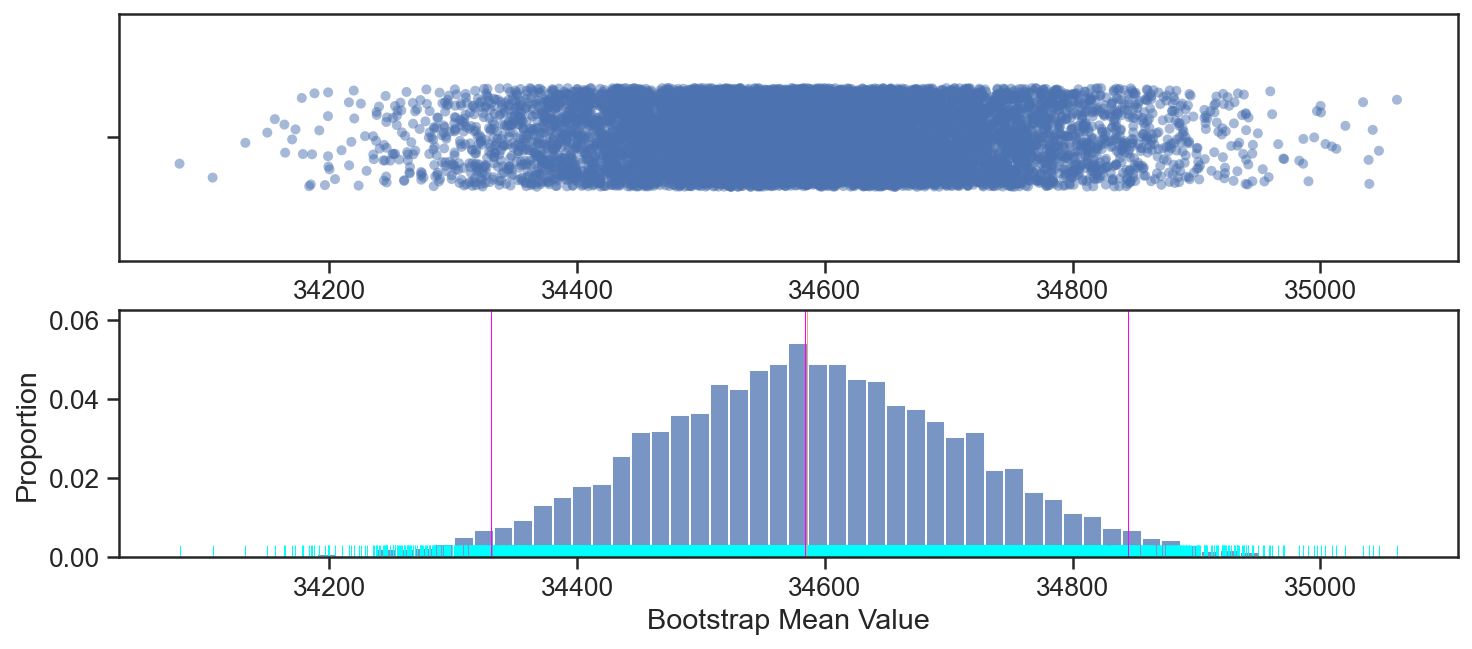

In [130]:
# Plot means of the bootstrap samples
fig, ax = plt.subplots(2,1, figsize=(12,5))
sns.stripplot(x=bootstrap_means, jitter=0.2, alpha=0.5, ax=ax[0]);

# Plot confidence intervals on top of histogram
sns.histplot(x=bootstrap_means, stat="proportion", ax=ax[1])
sns.rugplot(x=bootstrap_means, ax=ax[1], height=0.05, color="aqua", linewidth=0.5);

ax[1].axvline(bootstrap_means.mean(), color="lightsalmon", linewidth=0.5)
ax[1].axvline(np.percentile(bootstrap_means, 2.5), color="fuchsia", linewidth=0.5)
ax[1].axvline(np.percentile(bootstrap_means, 50), color="fuchsia", linewidth=0.5)
ax[1].axvline(np.percentile(bootstrap_means, 97.5), color="fuchsia", linewidth=0.5);
ax[1].set_xlabel('Bootstrap Mean Value');

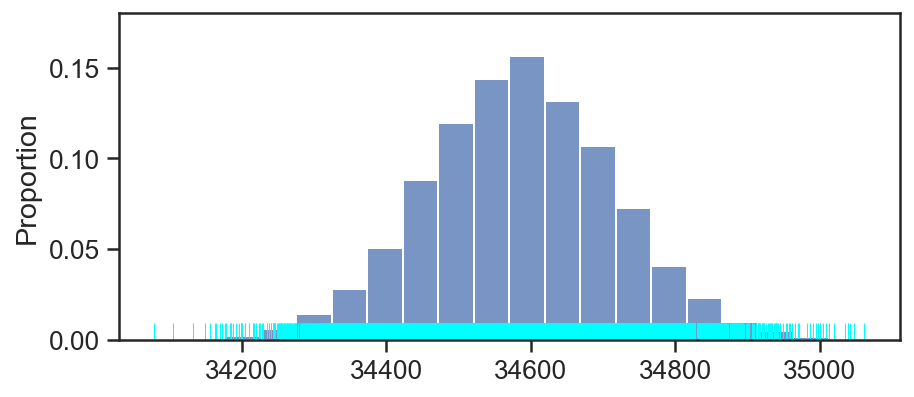

In [131]:
# Plot histogram of the bootstrap means
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.histplot(x=bootstrap_means, stat='proportion', bins=20)
sns.rugplot(x=bootstrap_means, ax=ax, color="aqua", height=0.05, linewidth=0.5);

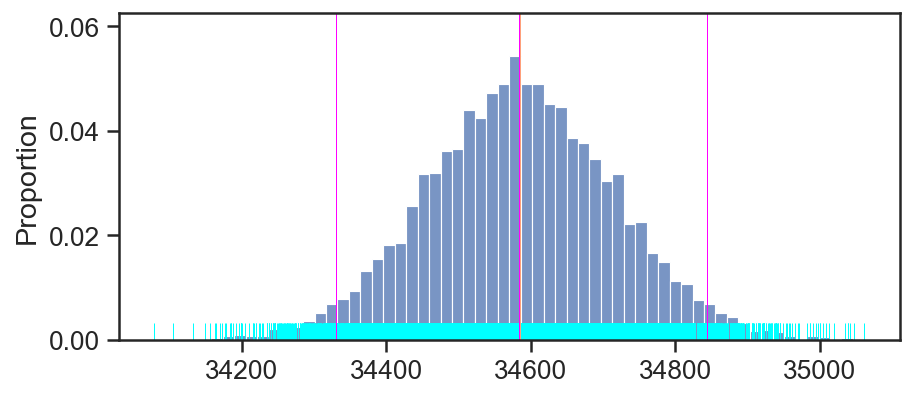

In [132]:
# Plot confidence intervals on top of histogram
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.histplot(x=bootstrap_means, stat="proportion")
sns.rugplot(x=bootstrap_means, ax=ax, height=0.05, color="aqua", linewidth=0.5);

ax.axvline(bootstrap_means.mean(), color="lightsalmon", linewidth=0.5)
ax.axvline(np.percentile(bootstrap_means, 2.5), color="fuchsia", linewidth=0.5)
ax.axvline(np.percentile(bootstrap_means, 50), color="fuchsia", linewidth=0.5)
ax.axvline(np.percentile(bootstrap_means, 97.5), color="fuchsia", linewidth=0.5);

In [133]:
# Print results
print('Mean of original data: {}'.format(np.mean(original_data)))
print('Results at 95% confidence interval')
print('[Lower Bound, Upper Bound]: {}'.format(np.percentile(bootstrap_means, [2.5, 97.5])))

Mean of original data: 34584.730836770534
Results at 95% confidence interval
[Lower Bound, Upper Bound]: [34330.2974803  34844.64818475]


### Subsetting Colours

In [134]:
black = cars.loc[(cars['colour'] == 'Black') & (cars['car_van'] == False) & (cars['condition'] == 'USED')]

In [135]:
black.corr()[['price','price_']]

price   price_
mileage  -0.17142 -0.61612
year      0.14521  0.64156
price     1.00000  0.37069
car_van       NaN      NaN
outlier   0.19039 -0.03411
age      -0.14521 -0.64156
new           NaN      NaN
age_     -0.17044 -0.65733
price_    0.37069  1.00000
mileage_ -0.19445 -0.62297

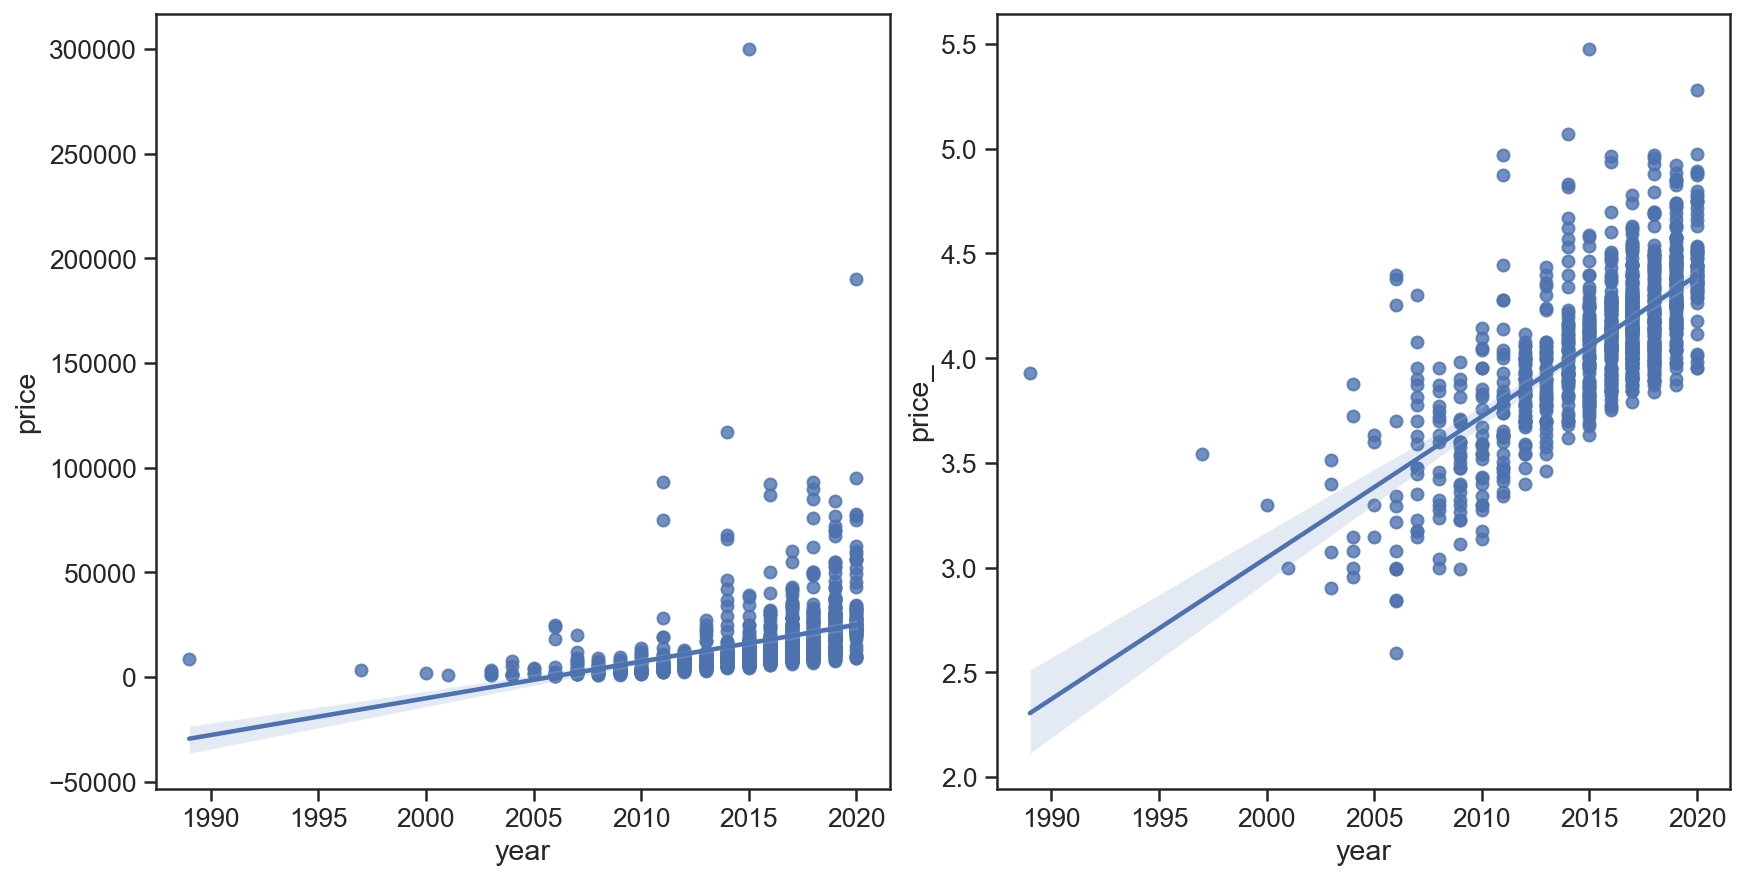

In [136]:
fig, axs = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

sns.regplot(x='year', y='price', data=black.sample(1000, random_state=0), ax=axs[0]);
sns.regplot(x='year', y='price_', data=black.sample(1000, random_state=0), ax=axs[1]);

In [137]:
cars.groupby(['colour'])['price_'].agg(['size','mean','median']).sort_values(by='mean', ascending=False)

size    mean  median
colour                       
Grey    66249 4.15318 4.17026
White   69051 4.11240 4.11378
Black   84767 4.10698 4.12385
Blue    58451 4.05586 4.09486
Other   24748 4.04466 4.05269
Red     41281 4.00686 4.01263
Silver  48830 3.93100 3.98091

In [138]:
cars.groupby(['colour'])['price_'].agg(['size','mean','median']).sort_values(by='mean', ascending=False)

size    mean  median
colour                       
Grey    66249 4.15318 4.17026
White   69051 4.11240 4.11378
Black   84767 4.10698 4.12385
Blue    58451 4.05586 4.09486
Other   24748 4.04466 4.05269
Red     41281 4.00686 4.01263
Silver  48830 3.93100 3.98091

In [139]:
cars[['colour','price_']]

colour  price_
public_reference                
202006039777689     Grey 4.86906
202007020778260     Blue 3.84510
202007020778474     Grey 4.14613
202007080986776    Other 3.90282
202007161321269     Grey 4.43128
...                  ...     ...
202010315652942     Grey 4.02510
202010315657341      Red 3.30103
202010315659271    White 3.86034
202011015662436      Red 4.06032
201512149444029   Silver 4.31218

[393377 rows x 2 columns]

In [140]:
cars.corr()['price_'].sort_values(ascending=False)

price_      1.00000
year        0.63463
price       0.35213
new         0.28007
car_van     0.03832
outlier    -0.05410
mileage    -0.63009
age        -0.63463
mileage_   -0.64695
age_       -0.66654
Name: price_, dtype: float64

### Quantitative-Quantitative

In [141]:
cars_vis = cars.loc[cars['outlier'] == False].drop(columns=['outlier']).copy()

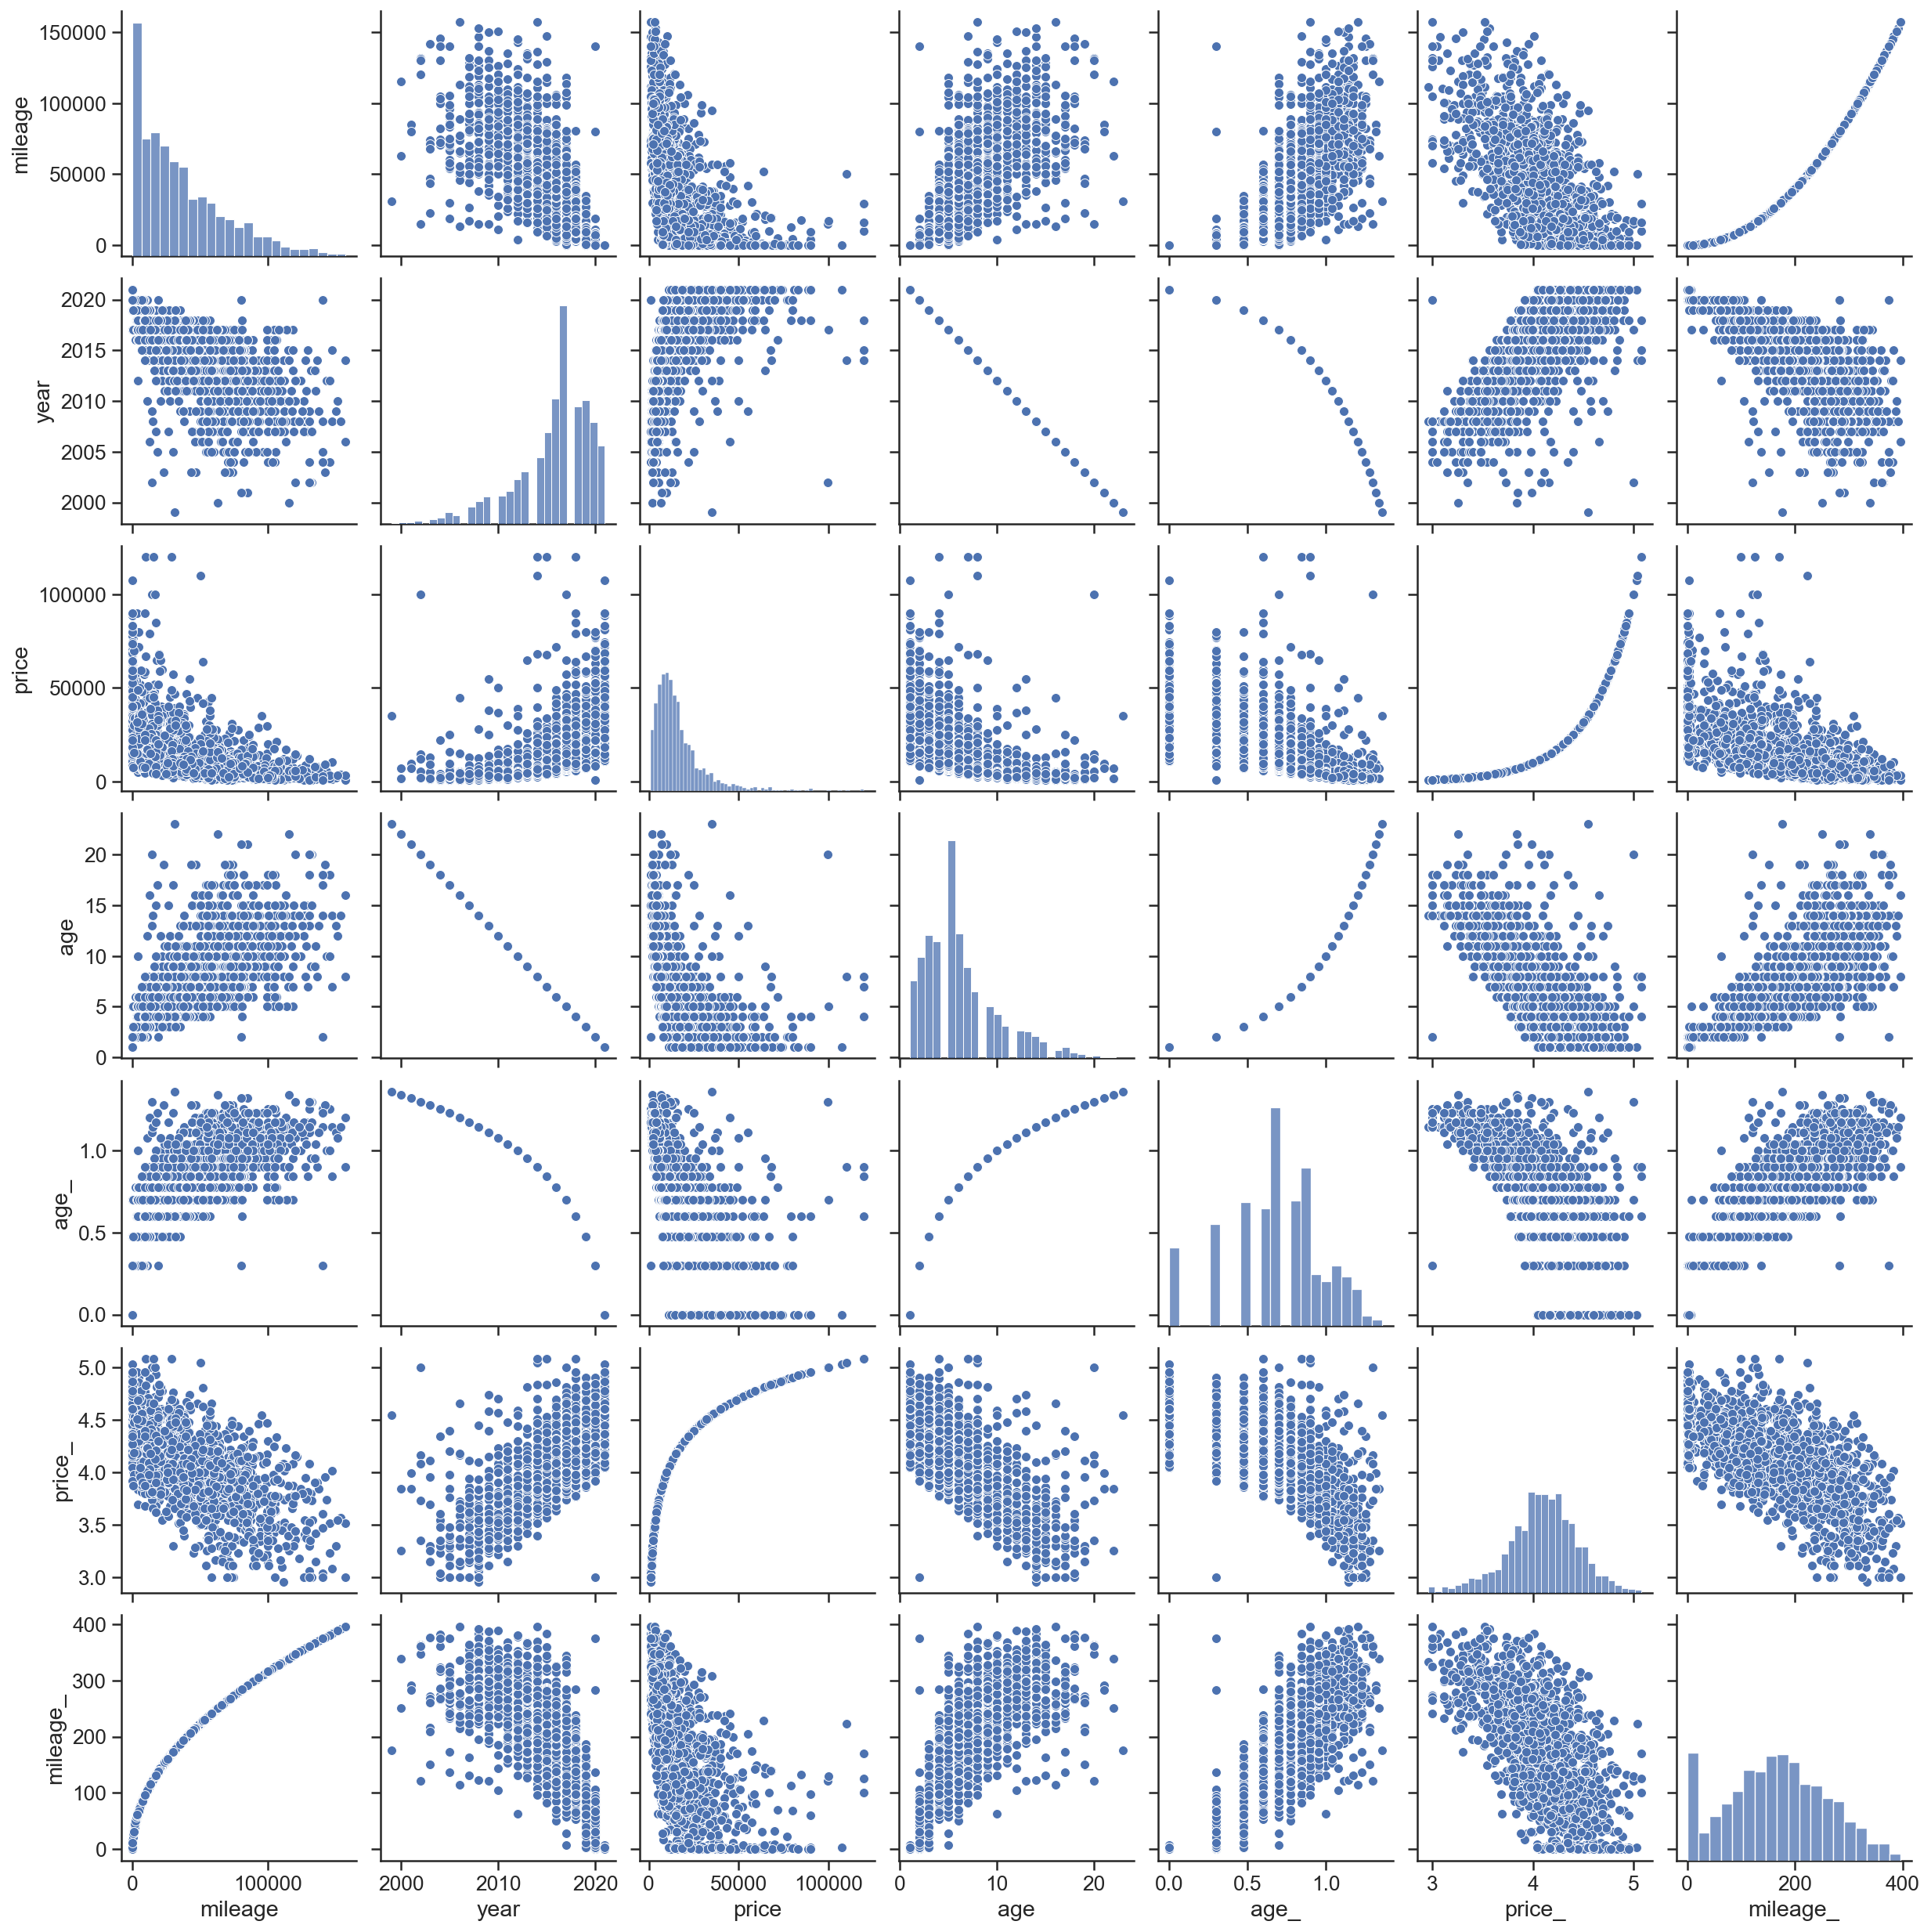

In [142]:
# Check pairwise scatterplot for interesting relationships between quantitative features
sns.pairplot(cars_vis.drop(columns=['new','car_van']).sample(2000));

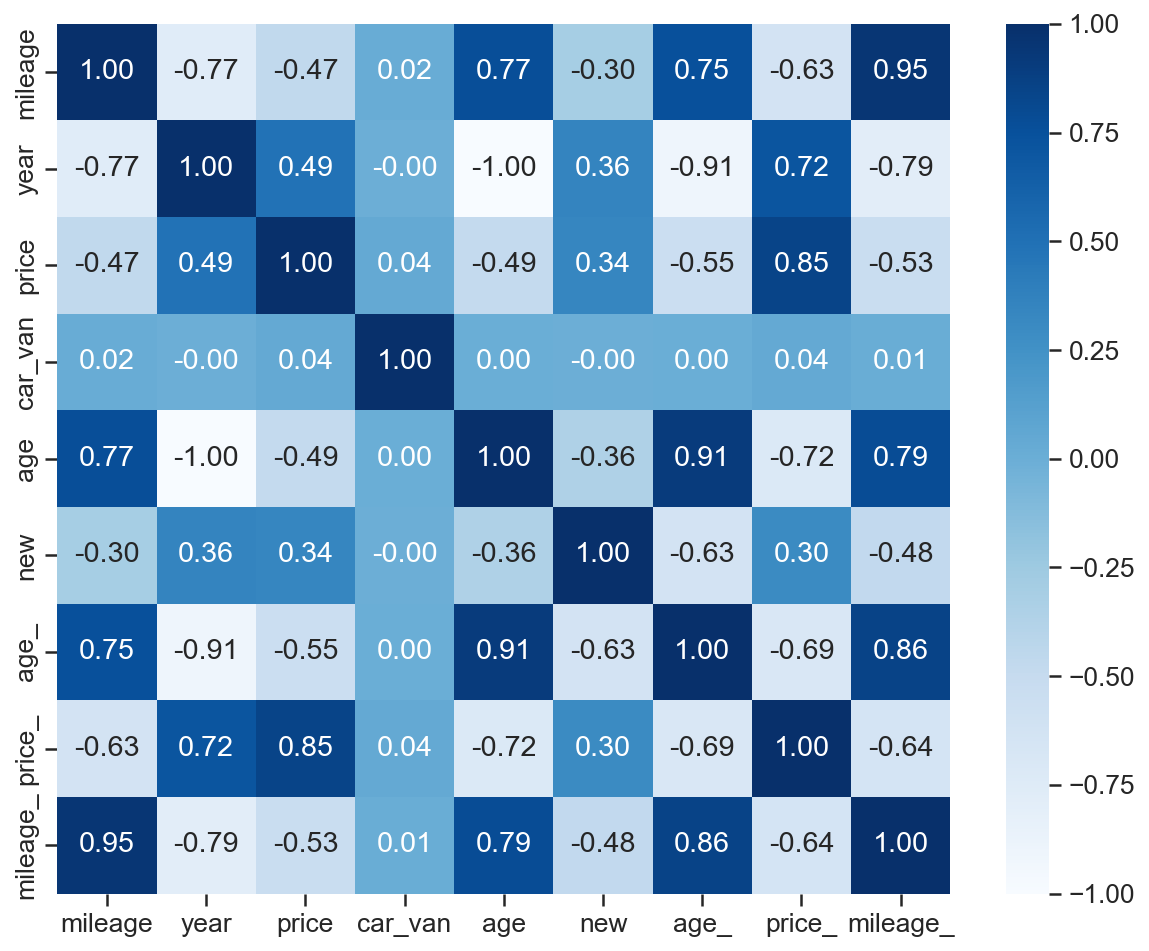

In [143]:
# Create heatmap of selected features
sns.heatmap(cars_vis.corr(), annot=True, cmap='Blues', fmt='.2f');

#### Price and Mileage Group Differences for Car_Van and Condition

In [144]:
cars_vis.groupby(['car_van', 'condition'])[['price','mileage']].mean().unstack('condition')

price              mileage            
condition         NEW        USED      NEW        USED
car_van                                               
False     34368.19351 14817.88808  6.01646 39975.33308
True      33045.27500 24151.35287 11.20000 48947.53896

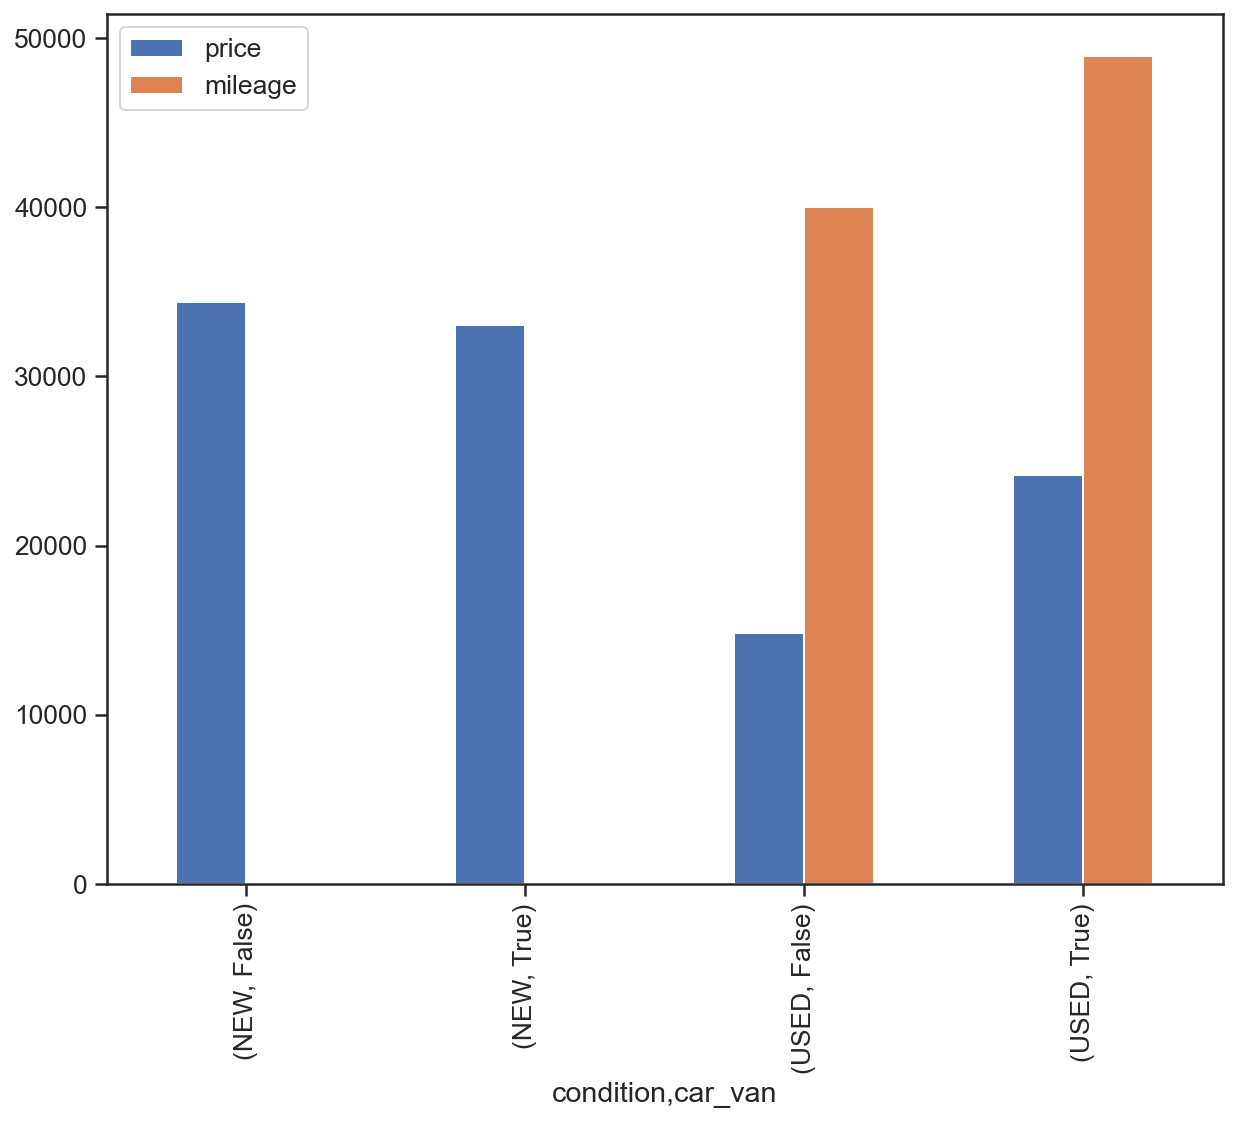

In [145]:
cars_vis.groupby(['condition', 'car_van'])[['price','mileage']].mean().plot(kind='bar');

In [146]:
make_col = cars_vis.loc[cars_vis['condition'] == 'USED'].groupby(['colour','make'])['price'].agg(['size', 'mean']).unstack('colour').dropna()
sample = make_col.sample(6)
sample

size                                                         \
colour          Black       Blue       Grey      Other        Red     Silver   
make                                                                           
Mazda       735.00000 1182.00000 1089.00000  197.00000 1288.00000  711.00000   
Maserati    118.00000   83.00000  137.00000   24.00000   12.00000    3.00000   
Mitsubishi  575.00000  294.00000  489.00000  297.00000  379.00000  301.00000   
Volkswagen 6943.00000 4500.00000 5110.00000 1201.00000 2747.00000 4401.00000   
Hyundai    1572.00000 1785.00000 1627.00000  552.00000  955.00000 1510.00000   
MG          137.00000  178.00000   21.00000  112.00000  174.00000   87.00000   

                             mean                                      \
colour          White       Black        Blue        Grey       Other   
make                                                                    
Mazda       855.00000 11331.40544 10388.14129 13667.06152  9371.88325   
Maserati     55.00000 37576.83898 38052.97590 37036.24088 42939.33333   
Mitsubishi  595.00000 14863.45913 11945.28912 15869.12679 15454.72727   
Volkswagen 5957.00000 13024.67060 13065.15867 14739.72231 14156.44713   
Hyundai    2321.00000 10674.97519 10652.76863 12230.96374 13336.91667   
MG          209.00000 13301.65693 13057.35393  6355.52381 11411.35714   

                                                
colour             Red      Silver       White  
make                                            
Mazda      13176.25233  9021.35443 12198.13333  
Maserati   32408.66667 15661.00000 39377.43636  
Mitsubishi 16941.46702 12327.34219 16623.66218  
Volkswagen 10806.50346 10616.88684 14793.68373  
Hyundai     9938.45445  9322.26821 10855.47092  
MG         11661.90230  8013.77011 12801.31579

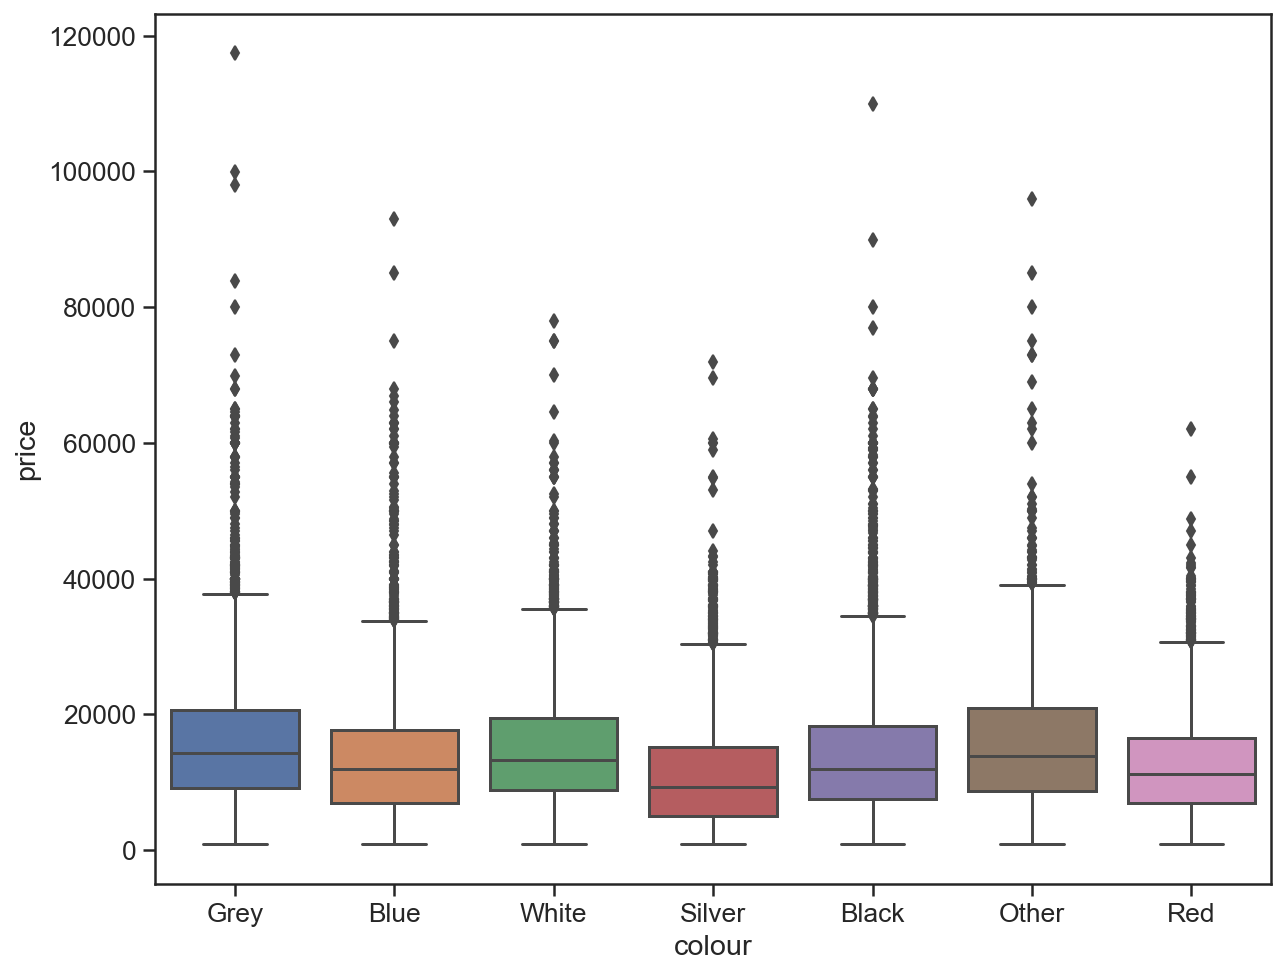

In [147]:
sns.boxplot(x='colour', y='price', data=cars_vis.loc[cars_vis['make'].isin(sample.index)]);

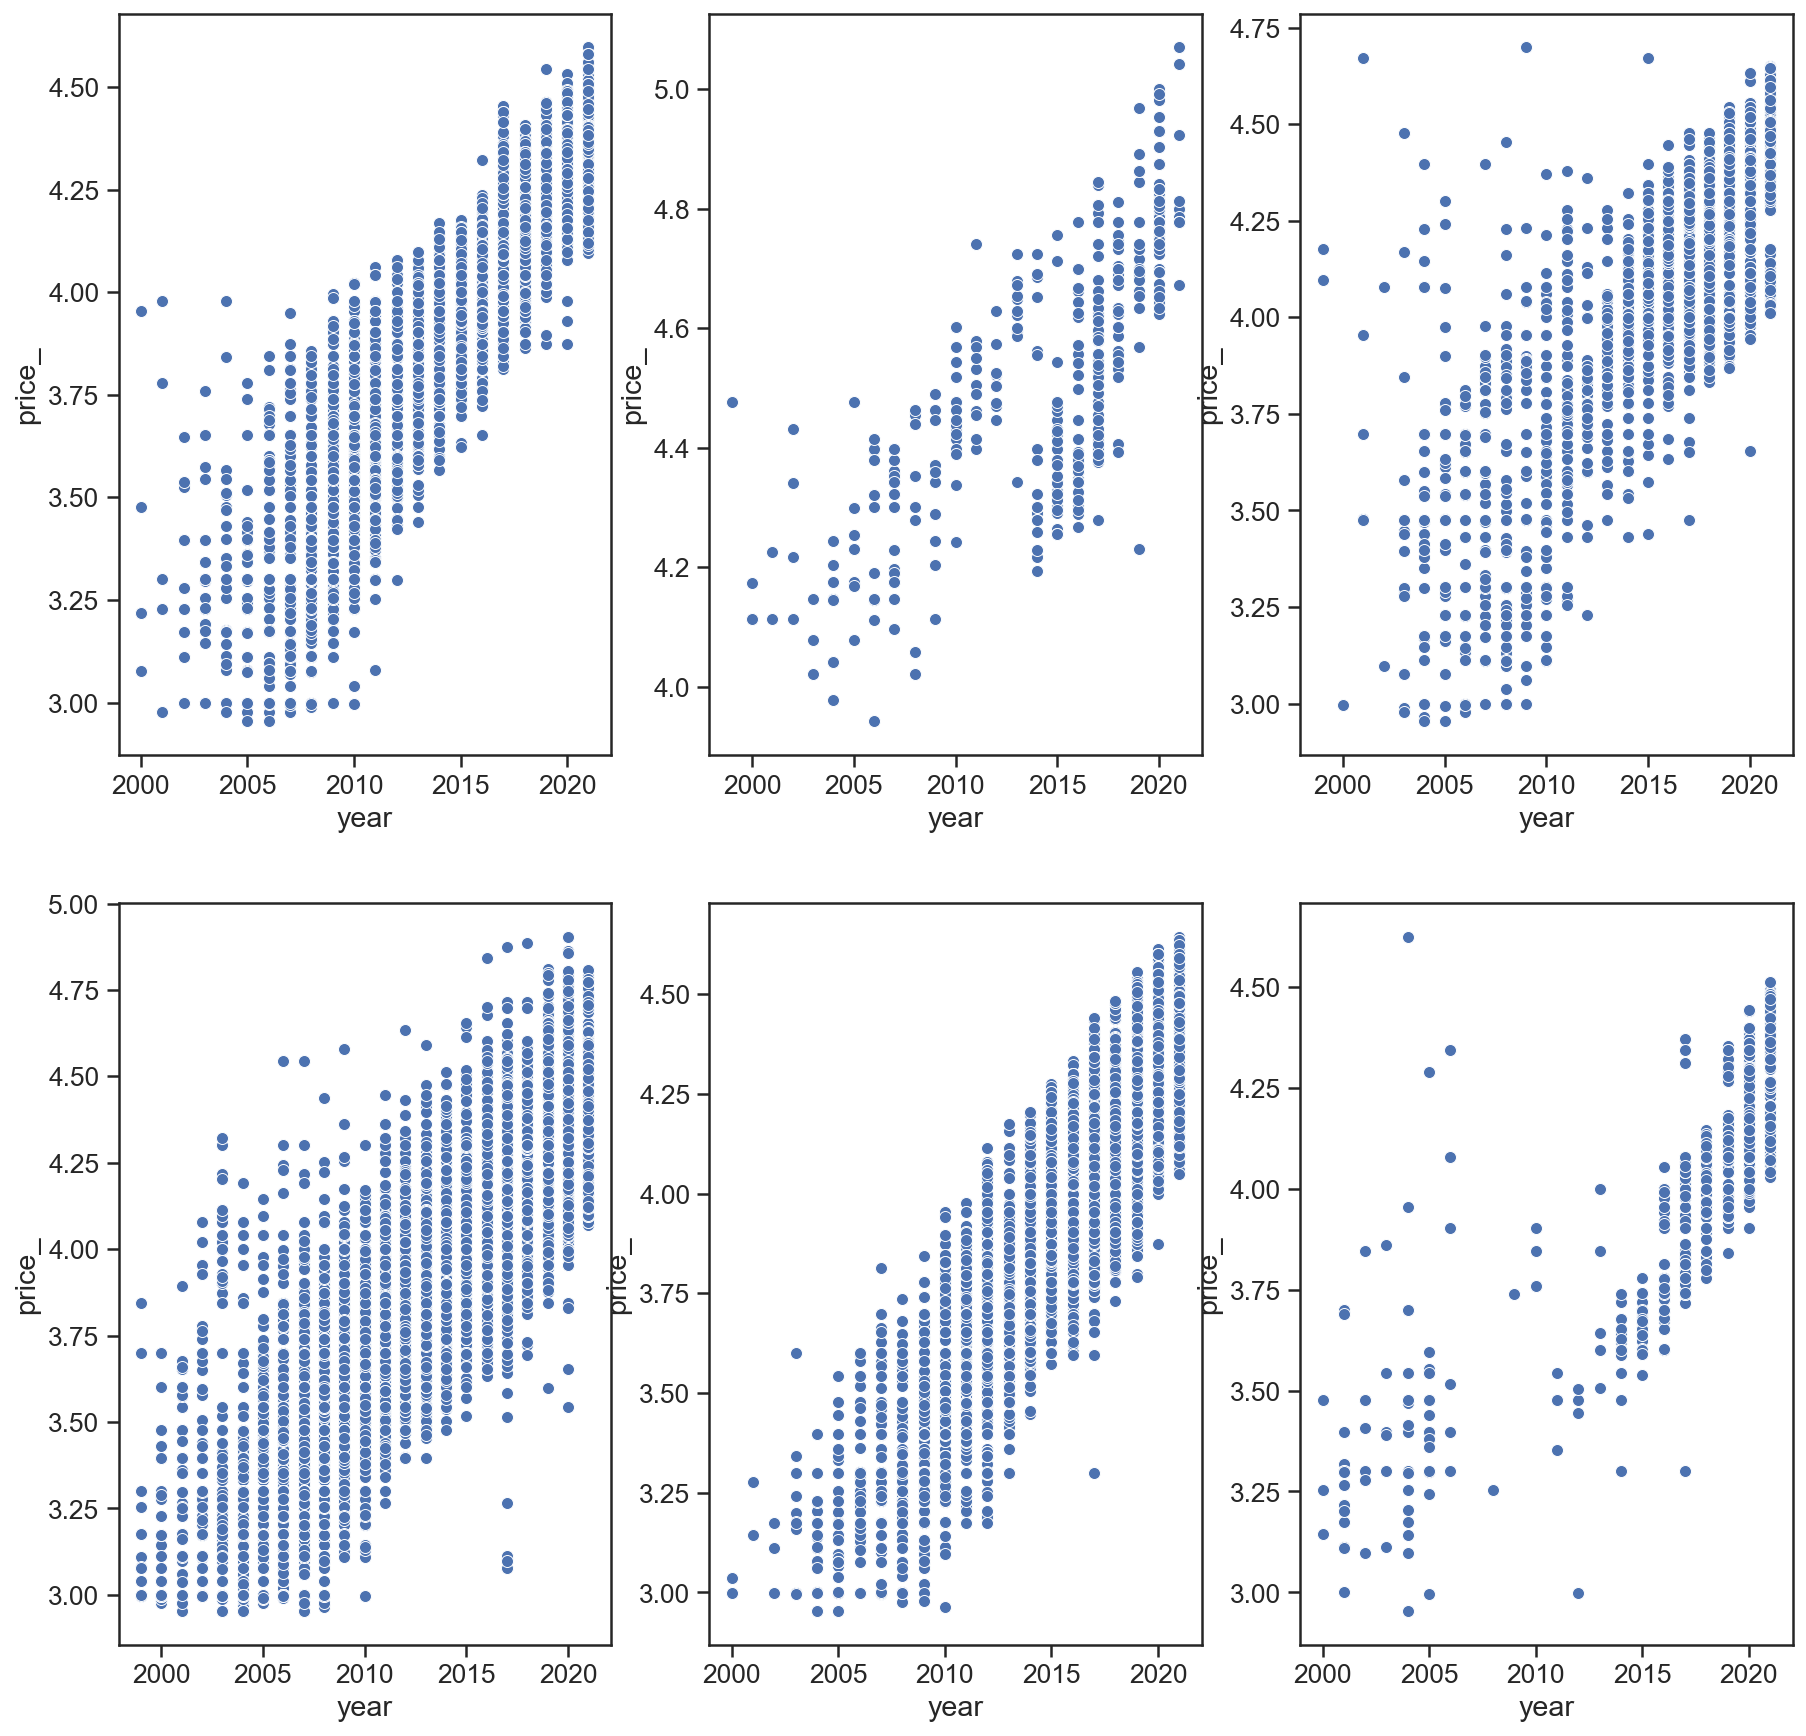

In [148]:
fig, axs = plt.subplots(2,3, figsize=(15,15))

for makes, axs in zip(sample.index, axs.ravel()):
    sns.scatterplot(x='year', y='price_', data=cars_vis.loc[cars_vis['make'] == makes], ax=axs);

### Effect of New and Used on Price

In [149]:
new = cars_vis.loc[cars_vis['condition'] == 'NEW']
used = cars_vis.loc[cars_vis['condition'] == 'USED']

In [150]:
cars.groupby('condition')['price'].mean()

condition
NEW    34584.73084
USED   16022.34577
Name: price, dtype: float64

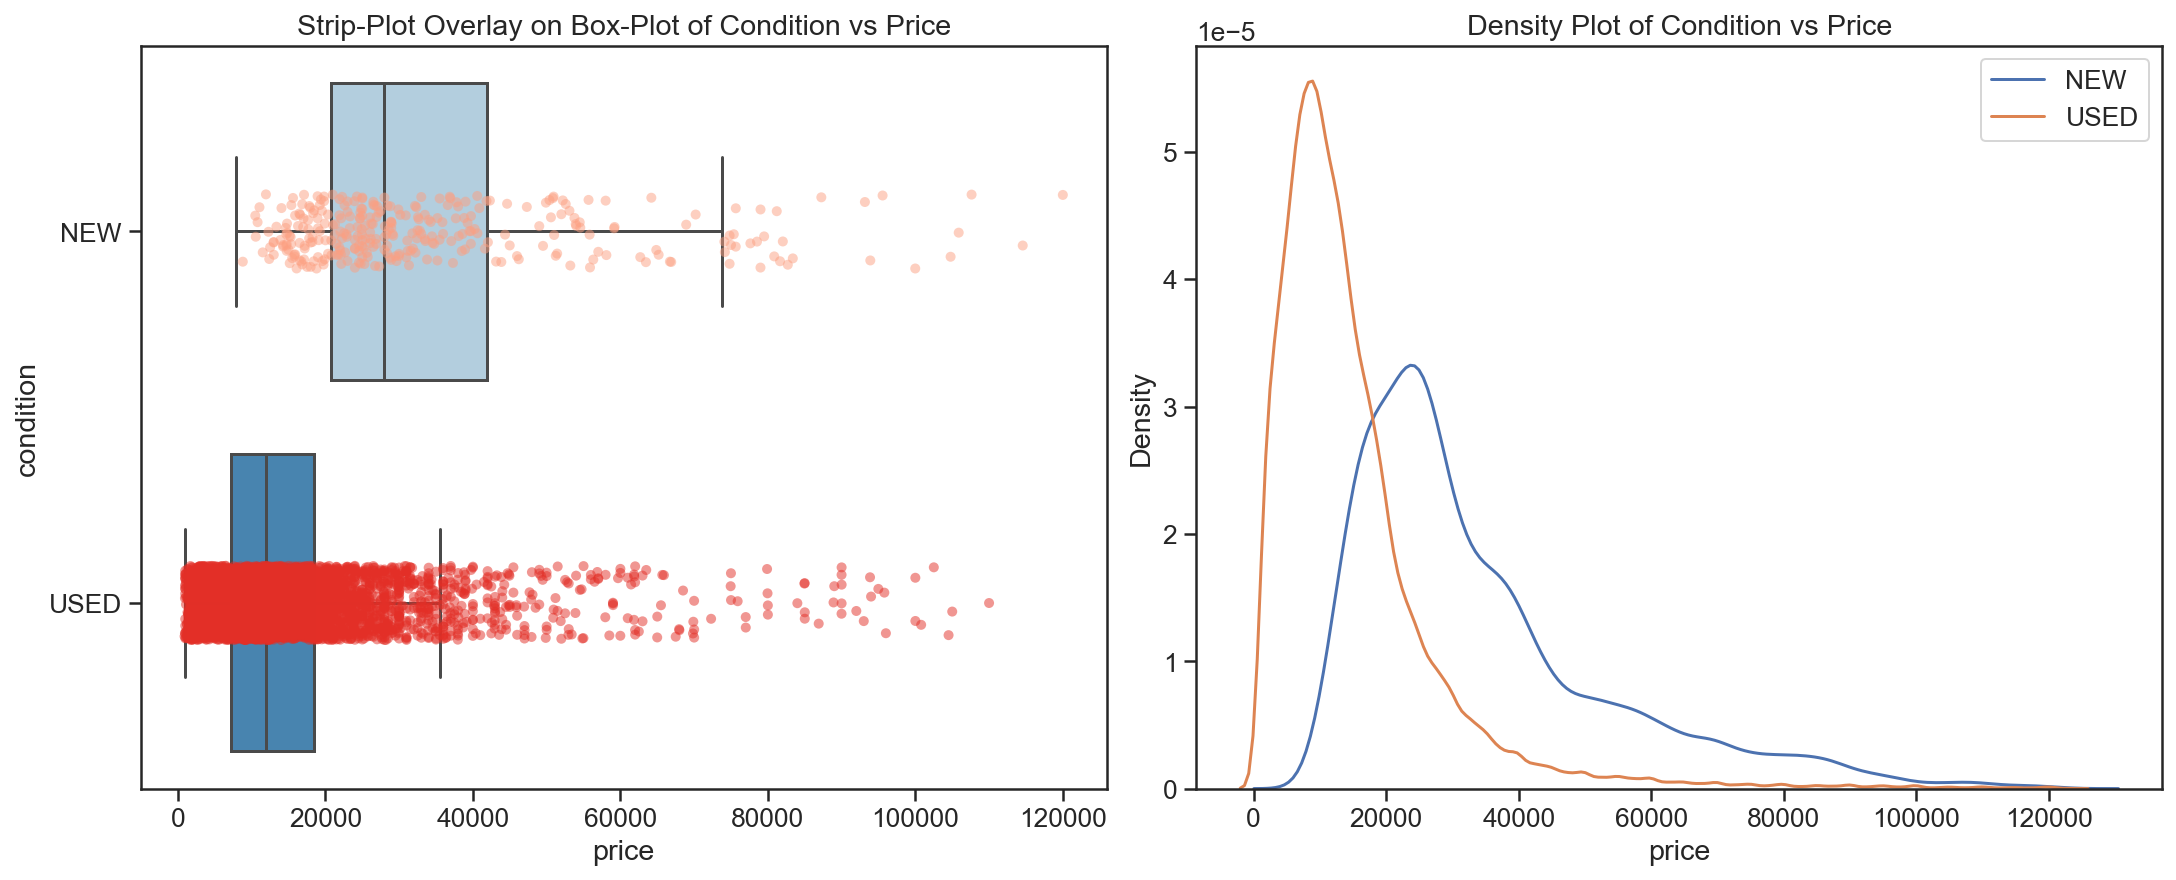

In [151]:
# Create figure for subplots
fig, axs = plt.subplots(1,2, figsize=(15,6), constrained_layout=True);

# Create boxplot and overlay stripplot of condition vs price
sns.boxplot(x='price', y='condition', data=cars_vis, palette='Blues', ax=axs[0], showfliers=False);
sns.stripplot(x='price', y='condition', order=['NEW', 'USED'], data=cars_vis.sample(5000, random_state=0), alpha=0.5, palette='Reds', ax=axs[0]);
axs[0].set_title('Strip-Plot Overlay on Box-Plot of Condition vs Price')

# Create density plots of price by condition
sns.kdeplot(x='price', data=new, ax=axs[1]);
sns.kdeplot(x='price', data=used, ax=axs[1]);
axs[1].legend(['NEW','USED']);
axs[1].set_title('Density Plot of Condition vs Price');

In [152]:
cars_ = cars_vis.loc[cars['car_van'] == False]
vans = cars_vis.loc[cars['car_van'] == True]

### Group Differences in Colour

The group difference in colour appear minimal, but may still prove valuable to models that are built

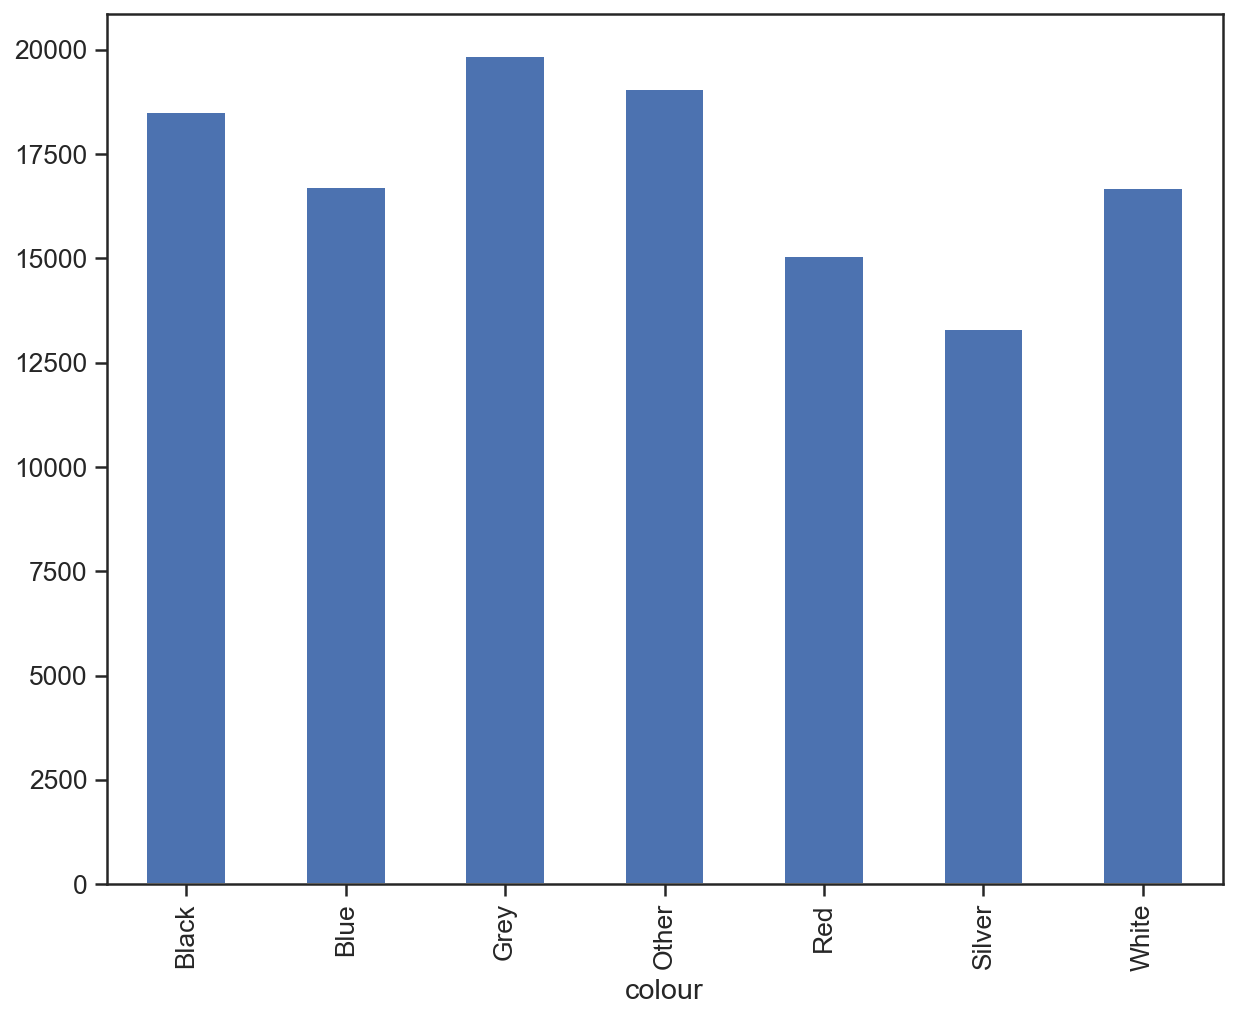

In [153]:
# Plot group differences in colour
colour = cars.groupby('colour')['price'].mean().plot(kind='bar');

#### Analysis of Year and Mileage Bins (Categorical-Categorical)

In [154]:
# Create groupby function of mean price for year and mileage bins
year_mileage = cars.loc[cars['outlier'] == False].groupby(['year_bins', 'mileage_bins'])['price'].mean().unstack('mileage_bins')
year_mileage

mileage_bins    Very Low         Low      Medium        High   Very High
year_bins                                                               
Very Old     24553.54067 19863.97275 11758.44527  7848.45611  5412.50014
Old          21044.68448 15208.45720 13566.74556 12740.10686 10871.22431
Neutral Age  18771.64337 15574.56166 16039.89544 15766.54535 13454.03598
New          23618.74579 19789.55553 17968.88318 16739.41534 13863.34513
Very New     31834.75074 27531.82399 23636.03333  9983.03125  8499.89744

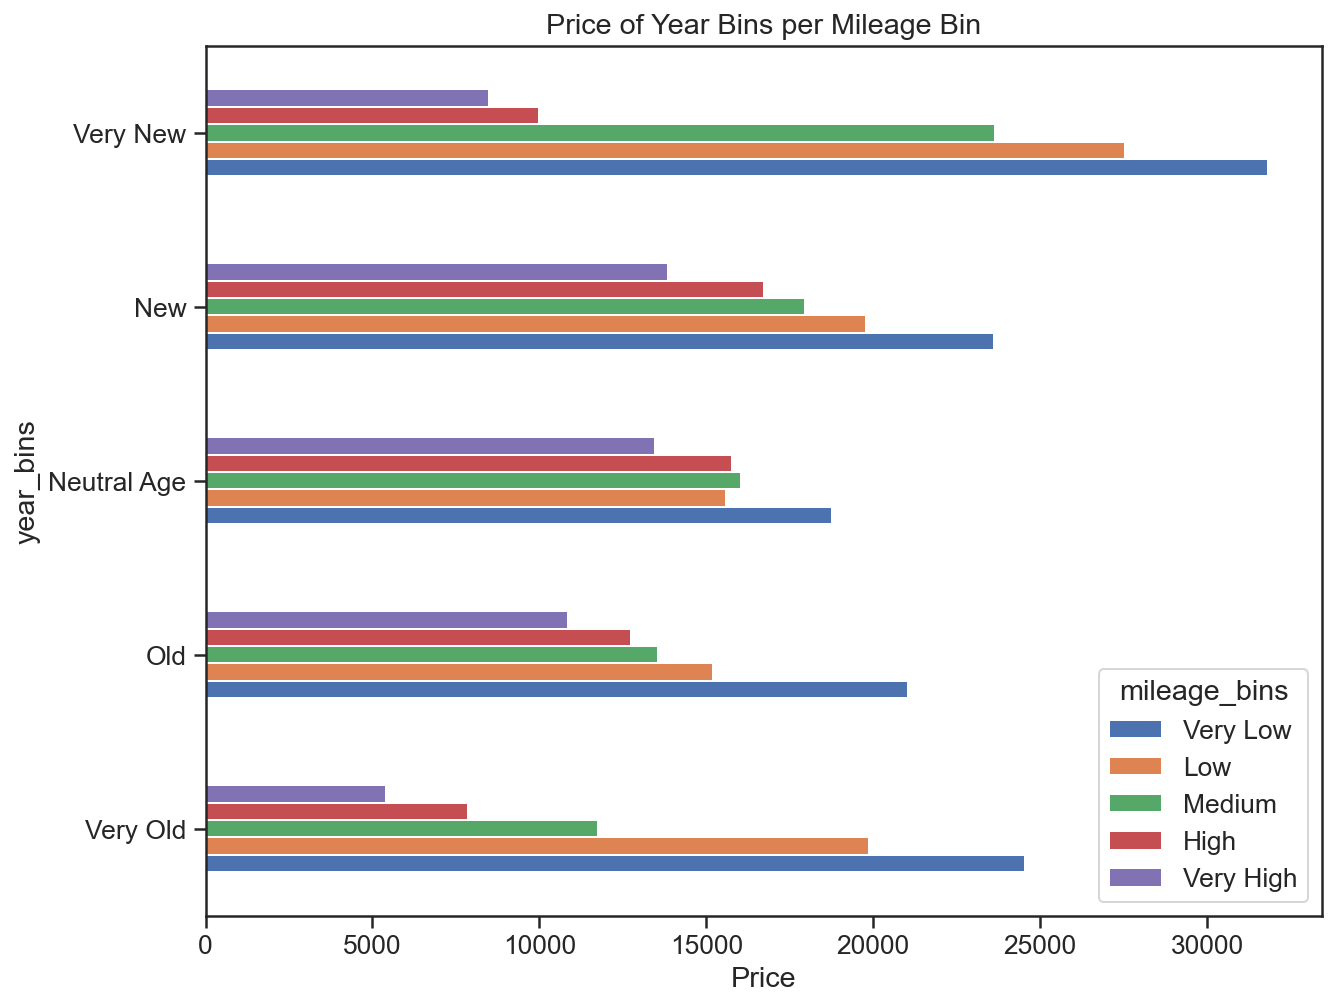

In [155]:
# Plot the groupby function of year and mileage bins
year_mileage.plot(kind='barh');
plt.xlabel('Price');
plt.title('Price of Year Bins per Mileage Bin');

In [156]:
# Create groupby function of year_bins and mileage_bins by price
year_mileage = cars_vis.groupby(['year_bins', 'mileage_bins'])[['price']].agg(['median']).unstack('mileage_bins')
year_mileage

price                                                
                  median                                                
mileage_bins    Very Low         Low      Medium        High   Very High
year_bins                                                               
Very Old      9995.00000  6995.00000  6489.00000  5698.50000  4200.00000
Old          10699.00000 10799.00000 11098.00000 10990.00000  9550.00000
Neutral Age  12752.00000 12999.00000 13995.00000 14000.00000 12500.00000
New          19995.00000 16995.00000 15300.00000 14750.00000 12311.50000
Very New     26770.00000 24950.00000 14999.50000  7947.00000  7495.00000

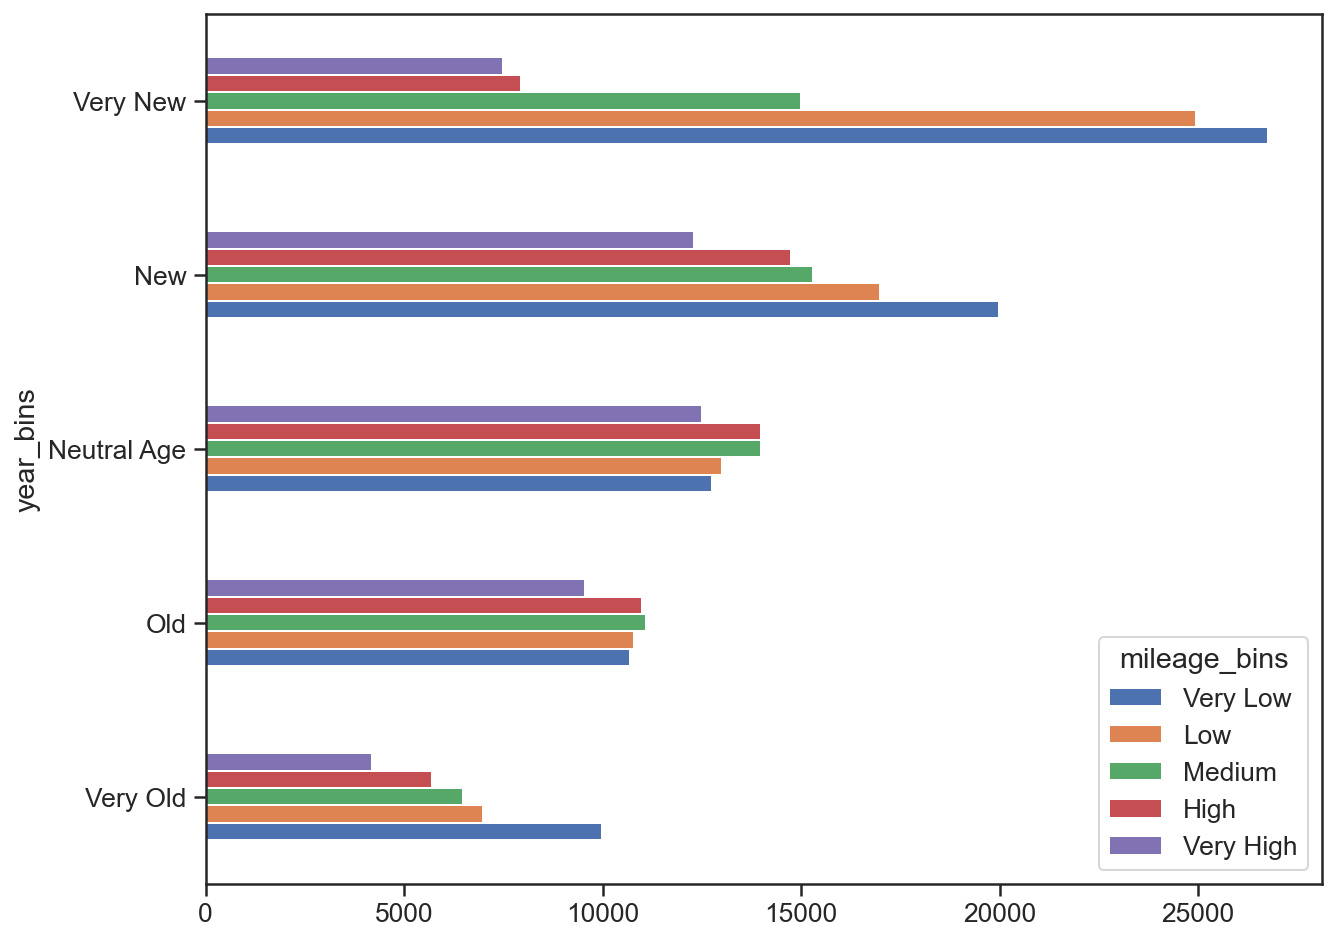

In [157]:
year_mileage['price']['median'].plot(kind='barh');

#### Make - Year

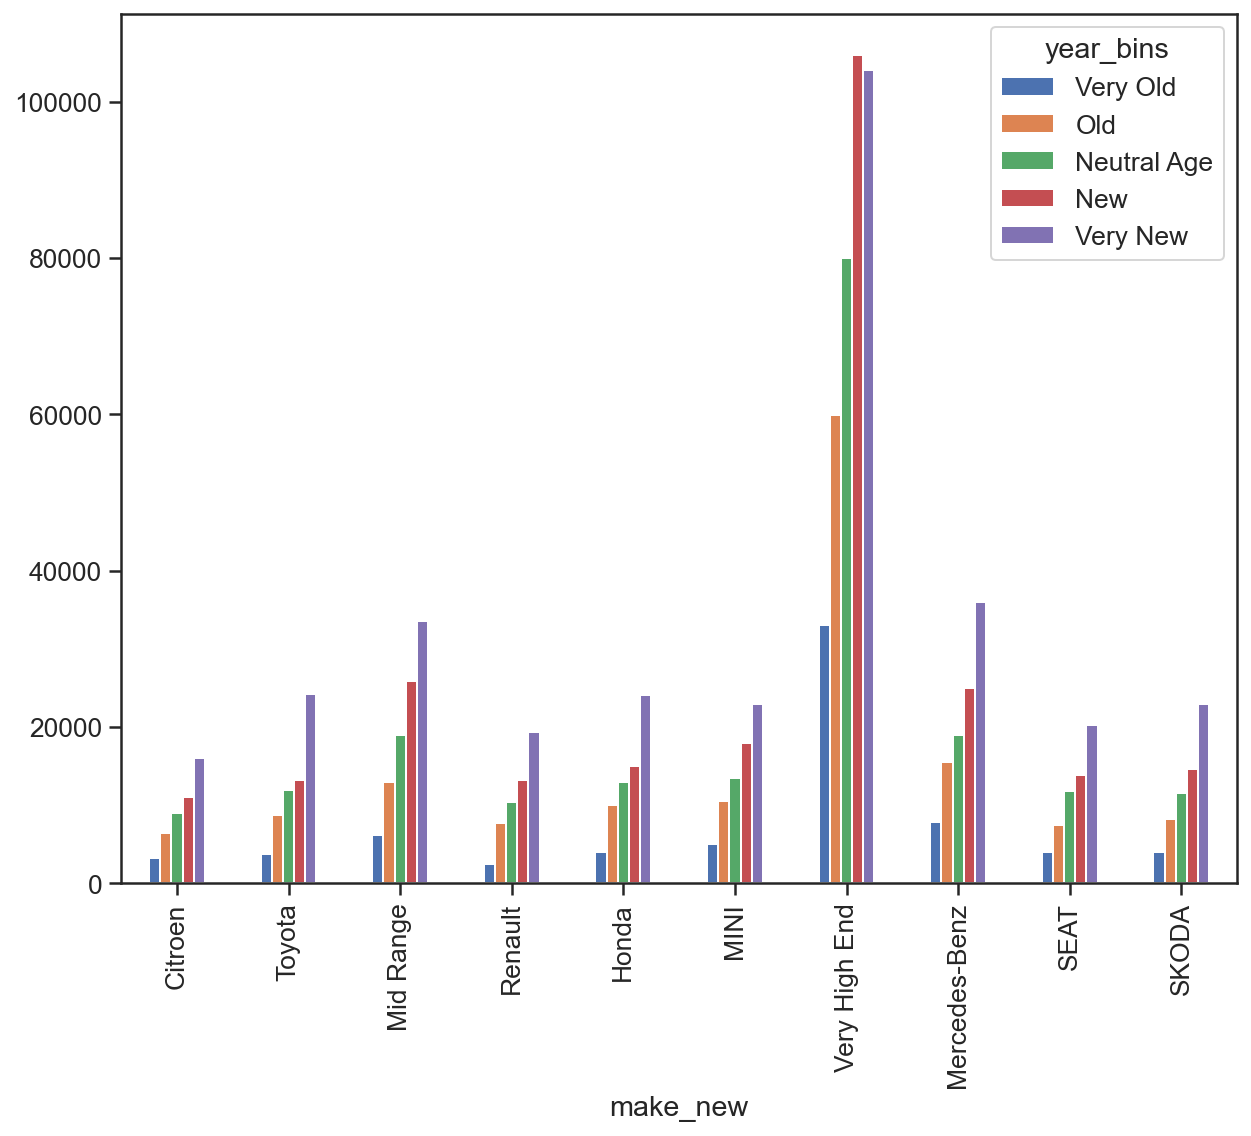

In [158]:
# Groupby make/make groups and year bins to plot
cars.groupby(['make_new', 'year_bins'])['price'].median().unstack('year_bins').dropna().sample(10, random_state=0).plot(kind='bar');

### Subset makes to visualise year and price

In [159]:
# Create subset of vauxhall data
vauxhall = cars.loc[(cars['make'] == 'Vauxhall') & (cars['outlier'] == False)]

# Create subset of Mercedes data
mercedes = cars.loc[(cars['make'] == 'Mercedes-Benz') & (cars['outlier'] == False)]

# Combine the two for later plots
makes = mercedes.append(vauxhall)

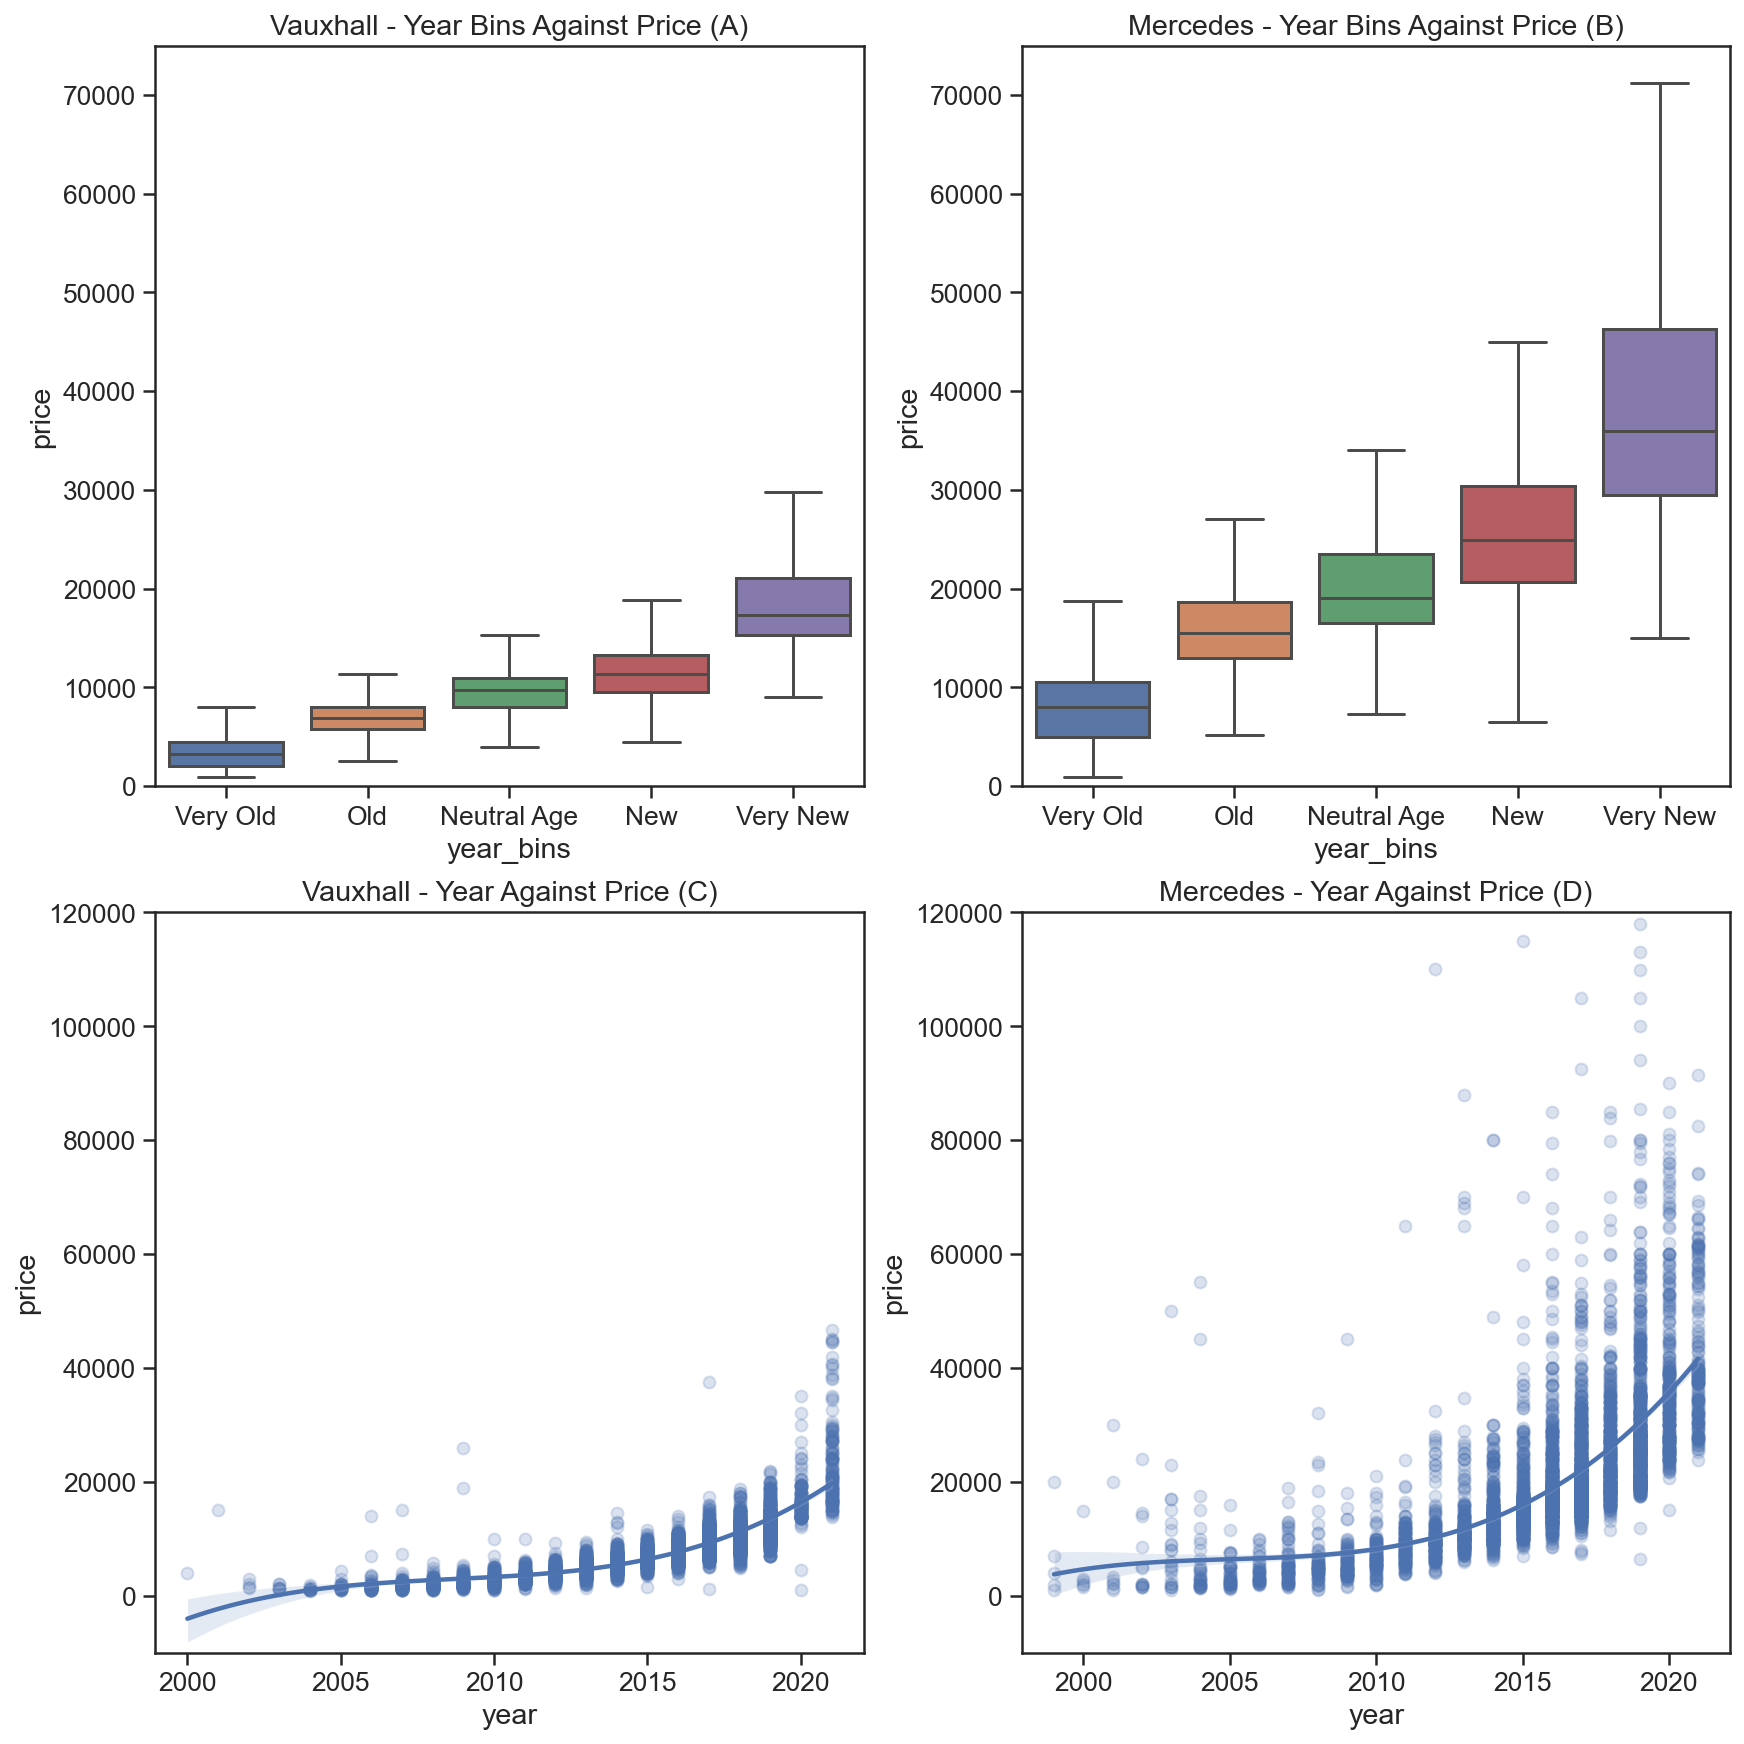

In [160]:
# Create figure for subplots
fig, axs = plt.subplots(2,2, figsize=(12,12), constrained_layout=True)

# Creat boxplot for vauxhall data
sns.boxplot(x='year_bins', y='price', data=vauxhall, showfliers=False, ax=axs[0,0]);
axs[0,0].set_title('Vauxhall - Year Bins Against Price (A)');
axs[0,0].set_ylim(0, 75000);

# Create boxplot for mercedes data
sns.boxplot(x='year_bins', y='price', data=mercedes, showfliers=False, ax=axs[0,1]);
axs[0,1].set_title('Mercedes - Year Bins Against Price (B)');
axs[0,1].set_ylim(0, 75000);

# Creat regression plot for vauxhall data
sns.regplot(x='year', y='price', data=vauxhall.sample(5000, random_state=0), ax=axs[1,0], scatter_kws={'alpha': 0.2}, order=3);
axs[1,0].set_title('Vauxhall - Year Against Price (C)');
axs[1,0].set_ylim(-10000,120000);


# Create regression plot for mercedes data
sns.regplot(x='year', y='price', data=mercedes.sample(5000, random_state=0), ax=axs[1,1], scatter_kws={'alpha': 0.2}, order=3);
axs[1,1].set_title('Mercedes - Year Against Price (D)');
axs[1,1].set_ylim(-10000, 120000);

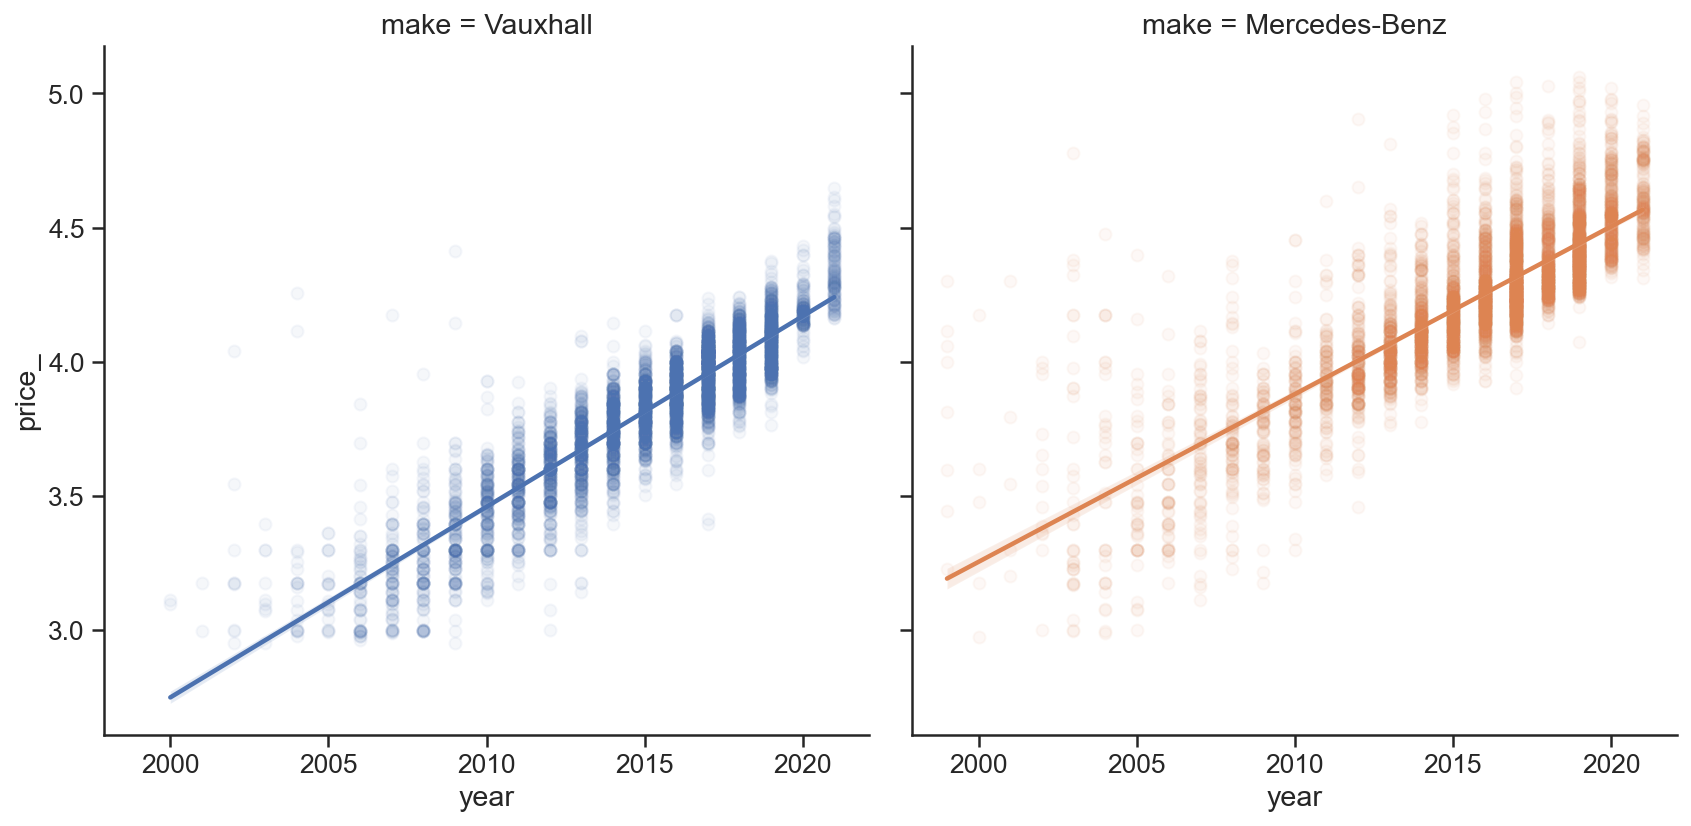

In [161]:
# Create regression plot split by makes on log transformed price
g = sns.lmplot(x='year', y='price_', col='make', hue='make', 
           data=makes.sample(10000, random_state=0), scatter_kws={'alpha': 0.05}, 
           order=1, height=6);

#### Fuel Type and Year

In [162]:
fuel_type = (cars.value_counts(['fuel', 'year_bins'])/cars.value_counts('fuel')).unstack()
fuel_type

year_bins              Very Old     Old  Neutral Age     New  Very New
fuel                                                                  
Bi Fuel                 0.13415     NaN      0.01829 0.00610   0.84146
Diesel                  0.25776 0.32873      0.18974 0.14260   0.08116
Diesel Hybrid           0.03085 0.14146      0.02859 0.20090   0.59819
Diesel Plug-in Hybrid       NaN 0.08696      0.16848 0.39130   0.35326
Electric                0.01598 0.12879      0.12486 0.23350   0.49687
Petrol                  0.26270 0.19173      0.17393 0.22978   0.14187
Petrol Hybrid           0.09527 0.16033      0.19203 0.28574   0.26664
Petrol Plug-in Hybrid   0.00734 0.17139      0.18453 0.22516   0.41157

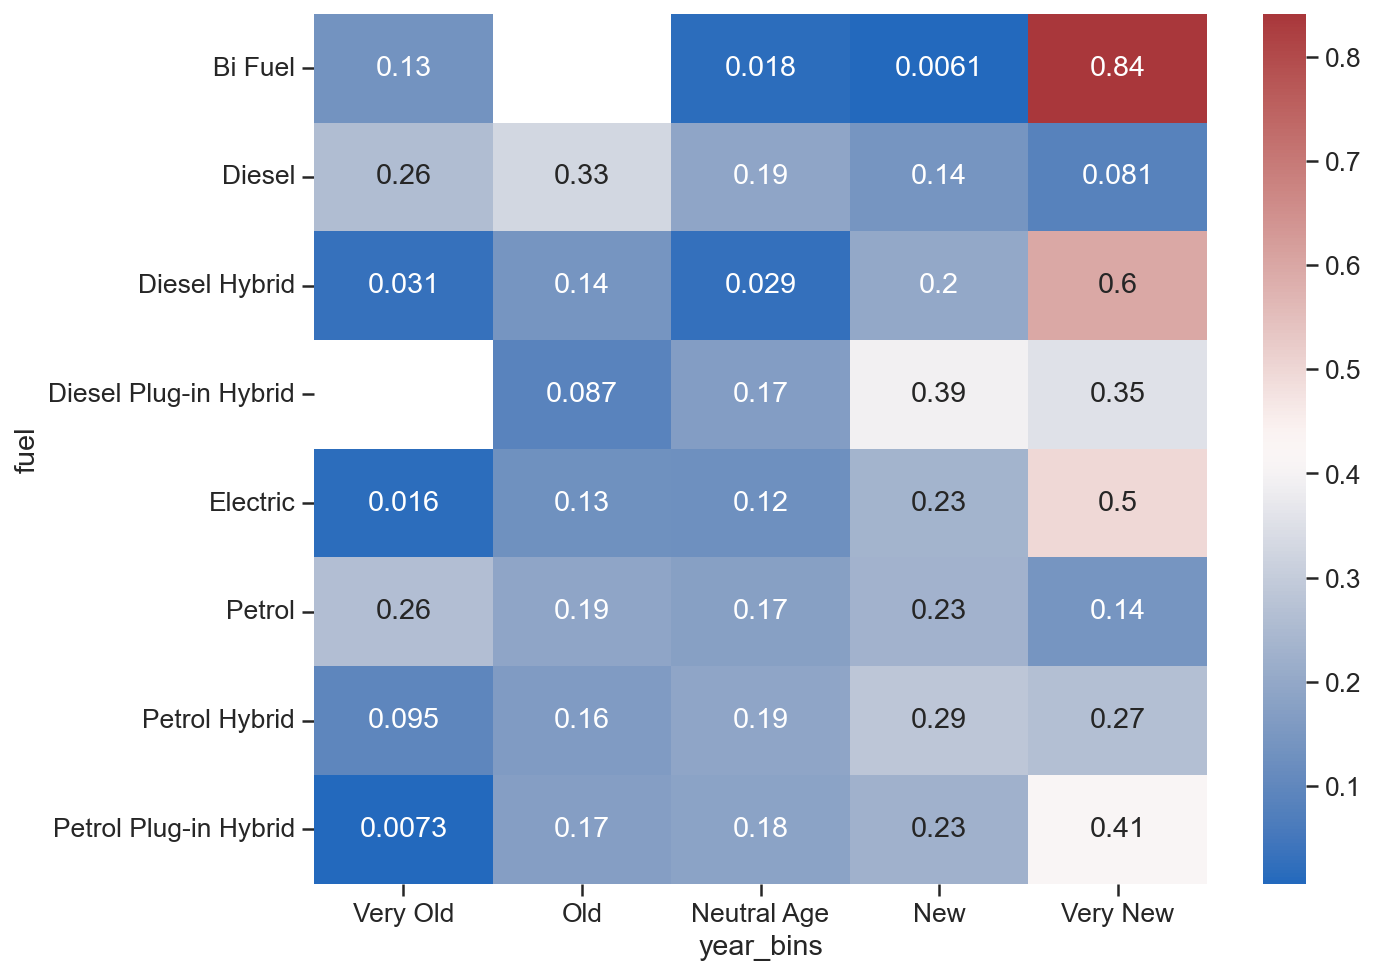

In [163]:
sns.heatmap(fuel_type, cmap='vlag', annot=True);

In [164]:
# Look at data from 2011 onwards
years = cars.loc[cars['year'] >= 2011]

# Groupby fuel, year and normalize to proportion
fuel_type = (years.value_counts(['fuel', 'year'])/years.value_counts('year')).unstack()
fuel_type

year                   2011.00000  2012.00000  2013.00000  2014.00000  \
fuel                                                                    
Bi Fuel                   0.00016     0.00026     0.00005         NaN   
Diesel                    0.48884     0.51869     0.53944     0.54532   
Diesel Hybrid                 NaN     0.00098     0.00136     0.00114   
Diesel Plug-in Hybrid         NaN         NaN         NaN     0.00013   
Electric                  0.00056     0.00144     0.00199     0.00520   
Petrol                    0.49408     0.46111     0.44170     0.42138   
Petrol Hybrid             0.01636     0.01627     0.01419     0.02289   
Petrol Plug-in Hybrid         NaN     0.00124     0.00126     0.00394   

year                   2015.00000  2016.00000  2017.00000  2018.00000  \
fuel                                                                    
Bi Fuel                       NaN         NaN     0.00004         NaN   
Diesel                    0.53847     0.53379     0.42133     0.27282   
Diesel Hybrid             0.00290     0.00177     0.00054     0.00008   
Diesel Plug-in Hybrid     0.00010     0.00023     0.00044     0.00005   
Electric                  0.00849     0.00431     0.00762     0.01132   
Petrol                    0.41794     0.42329     0.51840     0.64654   
Petrol Hybrid             0.02267     0.02191     0.03637     0.05168   
Petrol Plug-in Hybrid     0.00942     0.01470     0.01527     0.01751   

year                   2019.00000  2020.00000  2021.00000  
fuel                                                       
Bi Fuel                   0.00003     0.00176     0.00368  
Diesel                    0.30606     0.26489     0.22534  
Diesel Hybrid             0.00675     0.01394     0.01691  
Diesel Plug-in Hybrid     0.00179     0.00205     0.00037  
Electric                  0.01470     0.03682     0.04651  
Petrol                    0.60673     0.57420     0.58145  
Petrol Hybrid             0.04736     0.06507     0.07335  
Petrol Plug-in Hybrid     0.01659     0.04128     0.05240

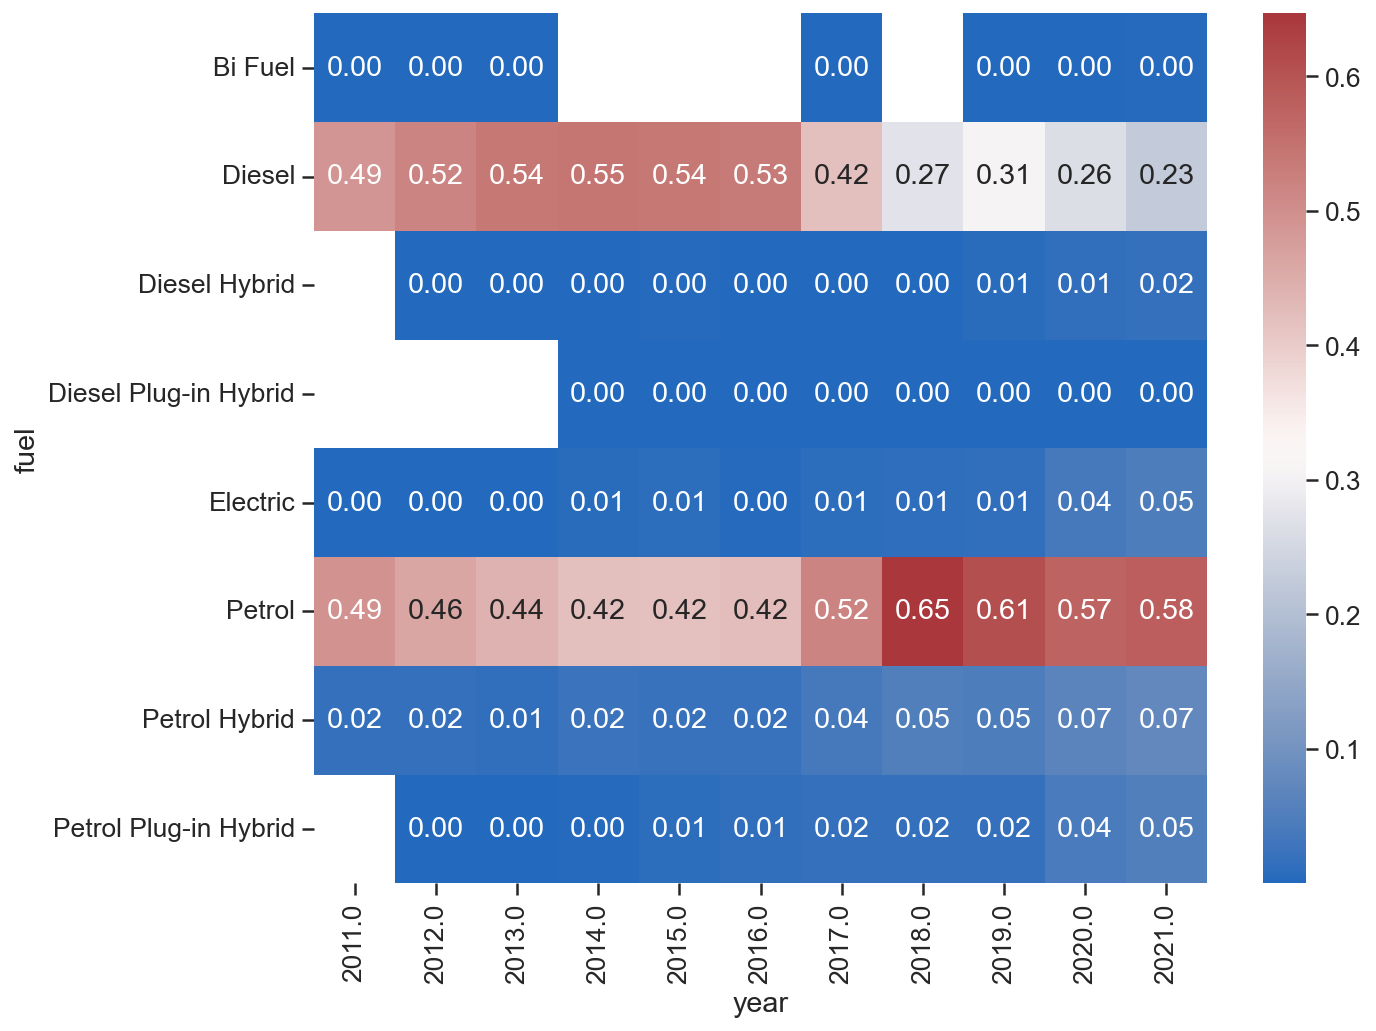

In [165]:
# Plot heatmap of proportional values
sns.heatmap(fuel_type, cmap='vlag', annot=True, fmt='.2f');

In [166]:
# Mean price per fuel type groupings
cars.groupby('fuel')['price'].mean().sort_values(ascending=False)

fuel
Diesel Hybrid           39601.98345
Petrol Plug-in Hybrid   35517.33015
Diesel Plug-in Hybrid   35464.17391
Electric                32671.74172
Petrol Hybrid           20146.84684
Petrol                  16592.79505
Diesel                  16392.13537
Bi Fuel                 14820.73171
Name: price, dtype: float64

#### Do Diesel Cars Depreciate Quicker Than Petrol?

In [167]:
# Get groupby function for fuel and condition
fuel_con = cars_vis.groupby(['fuel','condition'])['price'].mean().unstack()
fuel_con

condition                     NEW        USED
fuel                                         
Bi Fuel               13557.28889 16793.73611
Diesel                45686.81183 15439.24766
Diesel Hybrid         55464.42512 32554.92857
Diesel Plug-in Hybrid 56511.11111 34381.76000
Electric              41398.27129 28552.77111
Petrol                28247.71519 13531.95579
Petrol Hybrid         29840.65682 18155.21941
Petrol Plug-in Hybrid 47993.64770 29395.87728

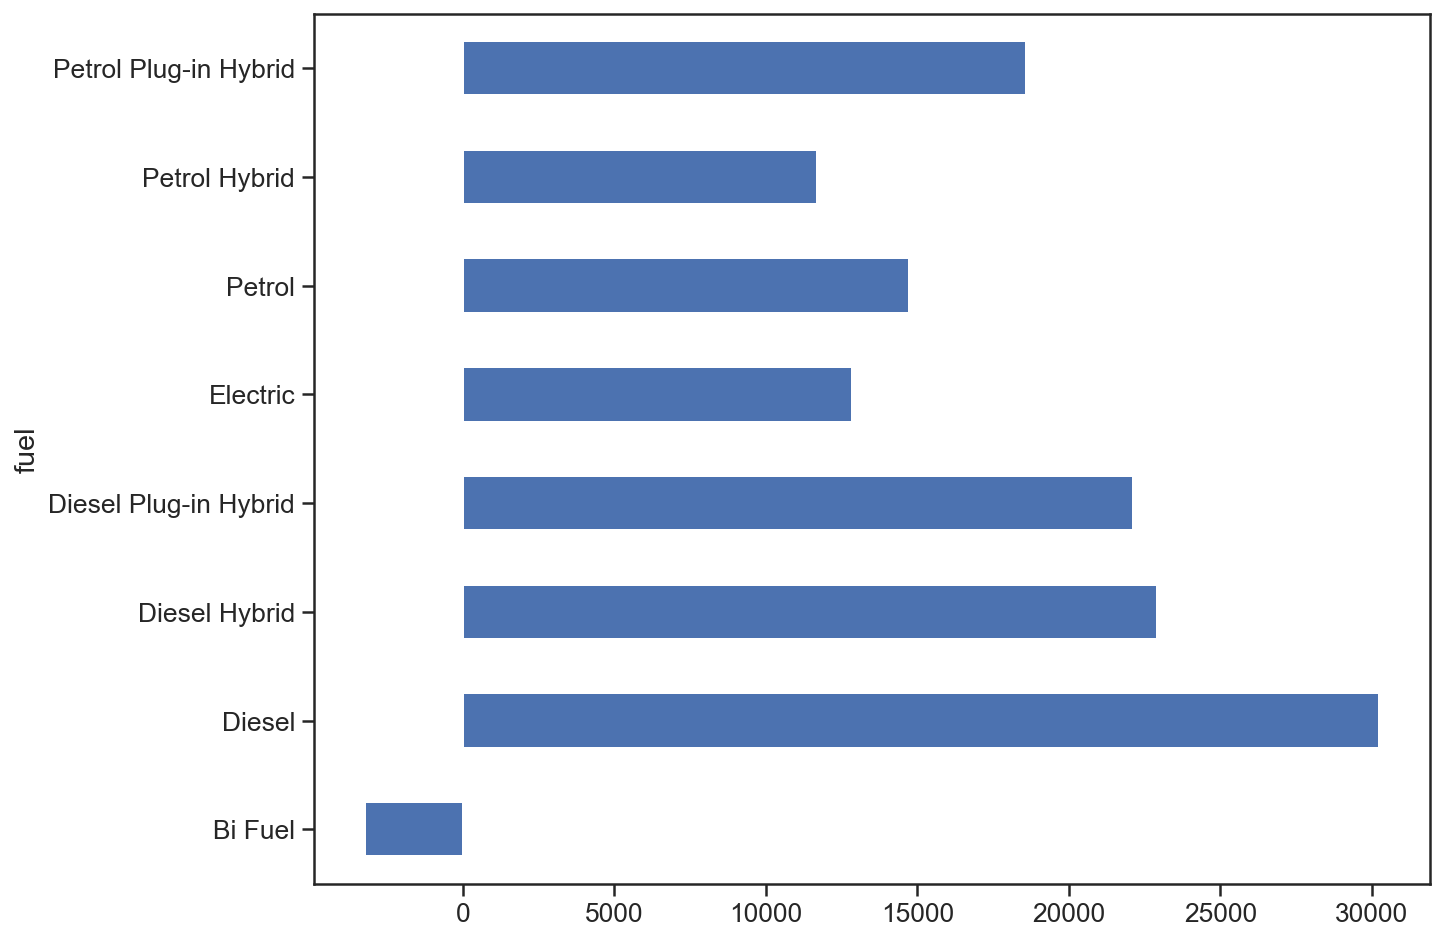

In [168]:
# Get difference in mean prices
fuel_con['difference'] = fuel_con['NEW'] - fuel_con['USED']

# Create barplot of results
fuel_con['difference'].plot(kind='barh');

In [169]:
# Create new dataframe of petrol and diesel vehicles
pet_dies = cars_vis[cars_vis['fuel'].isin(['Petrol','Diesel'])]

In [170]:
# Groupby fuel and year for mean price
pet_diesel = pet_dies.groupby(['fuel','year'])['price'].mean().unstack('fuel')
pet_diesel

fuel            Diesel      Petrol
year                              
1999.00000  7946.81818 12368.11304
2000.00000  8452.37931  9353.00306
2001.00000  7761.22449  8676.80585
2002.00000  4433.01124  7528.92597
2003.00000  3536.88832  7388.09098
2004.00000  3159.04444  5844.15547
2005.00000  3040.18642  6233.50625
2006.00000  3425.10461  5843.72905
2007.00000  3956.97394  5655.96993
2008.00000  4372.85443  5875.82209
2009.00000  5164.86238  5544.52486
2010.00000  5819.07485  6476.07536
2011.00000  6953.78458  7269.15685
2012.00000  8071.16405  7824.38157
2013.00000  9637.33346  8673.62232
2014.00000 11361.64971 10417.74586
2015.00000 13292.89173 11780.72537
2016.00000 15368.43721 12973.34725
2017.00000 17642.28196 13954.15882
2018.00000 21999.65702 15984.61607
2019.00000 27205.72235 19787.50319
2020.00000 34417.43740 25478.78323
2021.00000 45686.81183 28247.71519

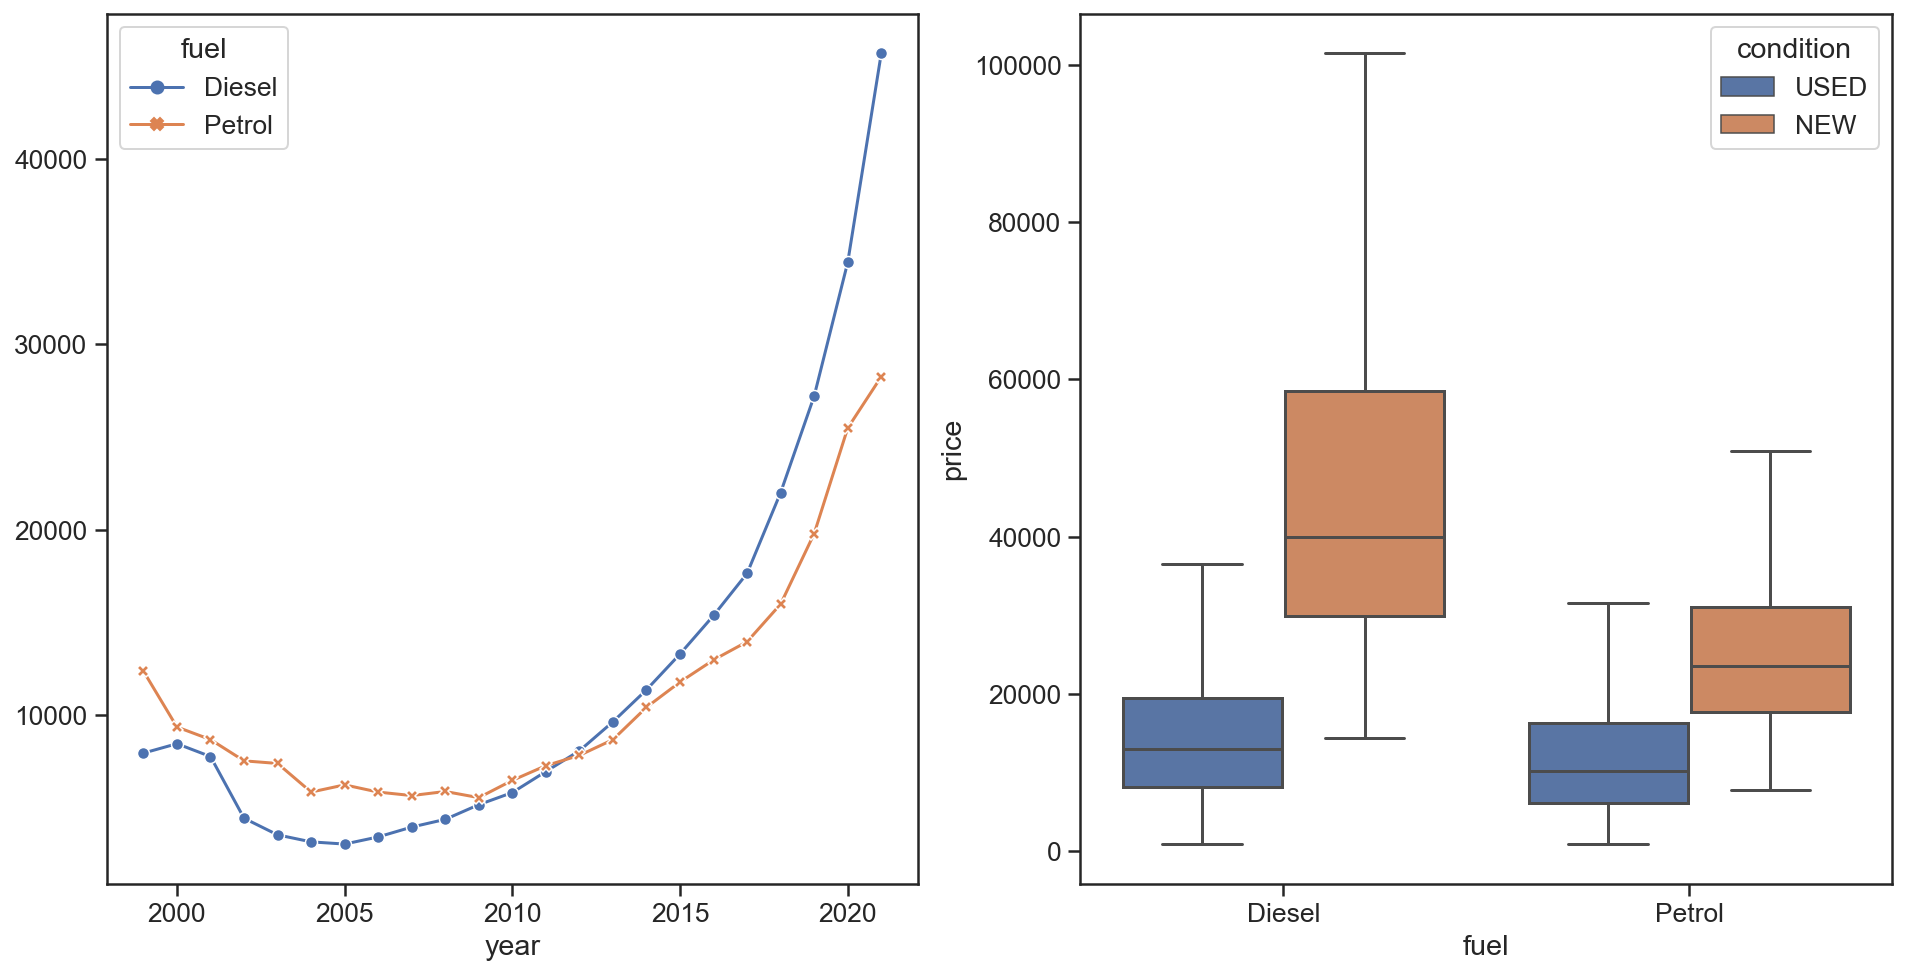

In [171]:
# Create figure for subplots
fig, axs = plt.subplots(1,2, figsize=(16, 8))

# Plot visual for fuel and condition
sns.boxplot(x='fuel', y='price', data=pet_dies, hue='condition', showfliers=False, ax=axs[1]);
sns.lineplot(data=pet_diesel,markers=True, dashes=False, ax=axs[0]);